<a id="4"></a>
<h1 style="background-color:#16DCC9;font-family:Baloo Da;font-size:200%;text-align:left">Briefing</h1>

We are an agency helping our customers purchase XoX (a made-up product) from various makers. Price is one of the most important things we care about. We need to estimate the price of a XoX before we recommend it to our customers. However, the estimations vary significantly with our employees' experience.

We would like you to build a machine learning model to accurately predict the price for a future purchase and provide insights to help us explain the predicted price to our customers. Please note that neither our customers nor us have any knowledge about machine learning. A sample of our sales record is available in ../data/sales.csv.

Preprocess, clean, analyze and visualized the provided data. A few sentences or plots describing your approach will suffice. Any thing you would like us to know about the price?
Build a machine learning model to help us determine the price for a purchase. Discuss why you choose the approaches, what alternatives you consider, and any concerns you have. How is the performance of your model?
Help us understand how the price is predicted (again, a few sentences will suffice).

<h1 style="background-color:#16DCC9;font-family:Calibri;font-size:200%;text-align:left">Proposed Solution</h1>

I will follow these steps to build a classification model with the provided dataset:

1. Data examination
    - Feature columns; missing values; target label
2. EDA
    - Univariate analysis on numerical columns and categrical columns
    - Multivariate analysis
    - Feature selection using statistical method and algorithm based method (RFECV)
3. Modelling
    - Pipeline
    - XGBoost Regression
4. Assignment question answers

<a id="4"></a>
<h1 style="background-color:#16DCC9;font-family:Calibri;font-size:200%;text-align:left">Data Quality</h1>

<a id='Load_Libraries'></a>
<h2 style="color:blue">Load Libraries</h2>

In [195]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
plt.style.use('ggplot')

# to visualize all the columns 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")

In [196]:
# load the training dataset
df = pd.read_csv('Train_Beneficiarydata.csv')
df_in=pd.read_csv('Train_Inpatientdata.csv')
df_out=pd.read_csv('Train_Outpatientdata.csv')
df_test_in=pd.read_csv('Test_Inpatientdata.csv')
df_test_out=pd.read_csv('Test_outpatientdata.csv')
df_train_y=pd.read_csv('Train.csv')


In [197]:
df_train_y.shape

(5410, 2)

In [198]:
df_in.shape

(40474, 30)

In [199]:
df_out.shape

(517737, 27)

In [200]:
df.shape

(138556, 25)

In [201]:
com_col=set(df_in.columns)&set(df_out.columns)
com_col=list(com_col)

In [202]:
df_in_out=pd.merge(df_in,df_out, left_on=com_col, right_on=com_col, how='outer')
df_in_out.shape

(558211, 30)

In [203]:
com_col=set(df_in_out.columns)&set(df.columns)
com_col=list(com_col)

In [204]:
df_in_out_be=pd.merge(df_in_out,df, left_on=com_col, right_on=com_col, how='outer')
df_in_out_be.shape

(558211, 54)

In [205]:
len(df_train_y['Provider'].unique())

5410

In [206]:
pip install matplotlib-venn

Note: you may need to restart the kernel to use updated packages.


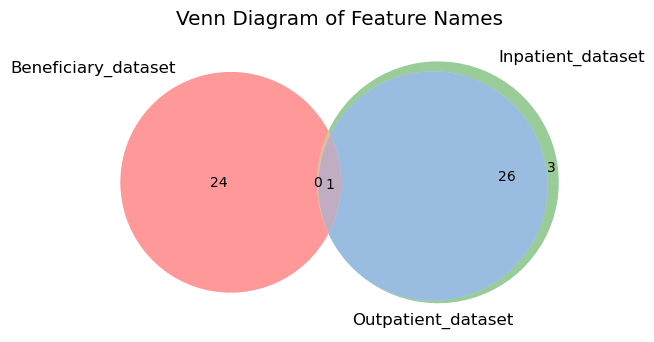

In [207]:

import matplotlib.pyplot as plt
from matplotlib_venn import venn3

Beneficiary_dataset = {'BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
                       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
                       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
                       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
                       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
                       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
                       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
                       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
                       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
                       'OPAnnualDeductibleAmt'}

Inpatient_dataset = {'BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
                     'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
                     'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
                     'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
                     'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
                     'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
                     'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
                     'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
                     'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
                     'ClmProcedureCode_6'}

Outpatient_dataset = {'BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
                      'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
                      'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
                      'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
                      'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
                      'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
                      'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
                      'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
                      'ClmAdmitDiagnosisCode'}

# Create sets from the column names
set_data1_columns = set(Beneficiary_dataset)
set_data2_columns = set(Inpatient_dataset)
set_data3_columns = set(Outpatient_dataset)

# Create the Venn diagram
venn = venn3([set_data1_columns, set_data2_columns, set_data3_columns],
             set_labels=('Beneficiary_dataset', 'Inpatient_dataset', 'Outpatient_dataset'))




# Display the Venn diagram
plt.title('Venn Diagram of Feature Names')
plt.show()











In [208]:
df_test_in.head()

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11014  CLM67387   2009-09-09  2009-09-16  PRV57070   
1  BENE11017  CLM31237   2008-12-25  2009-01-08  PRV54750   
2  BENE11026  CLM78930   2009-12-09  2009-12-13  PRV53758   
3  BENE11031  CLM56810   2009-06-23  2009-07-06  PRV55825   
4  BENE11085  CLM34625   2009-01-20  2009-01-31  PRV52338   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                    9000          PHY317786          PHY427017   
1                   14000          PHY314656          PHY426644   
2                    2000          PHY349495                NaN   
3                   16000          PHY429538          PHY371893   
4                   19000          PHY397161                NaN   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-09-09                  5789             1068.0   
1            NaN  2008-12-25                  5939             1068.0   
2            NaN  2009-12-09                  4019             1068.0   
3            NaN  2009-06-23                  8208             1068.0   
4            NaN  2009-01-20                  4279             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-09-16                332               5780               5533   
1  2009-01-08                661               1889              41071   
2  2009-12-13                241               4010              78791   
3  2009-07-06                564               8208               4168   
4  2009-01-31                880              29654               V142   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0                496               V420              40390               2851   
1               5990               5601               4588               5845   
2              60000              41401              V1254               4372   
3                920               5990              40391               2859   
4              78702              30503               V140              V4582   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               5990                570              41071   
1               4549              29570              34831   
2              78650               7813               4254   
3               4254              41400               5849   
4              V6109               7242                NaN   

  ClmDiagnosisCode_10  ClmProcedureCode_1  ClmProcedureCode_2  \
0                4280              4443.0              5849.0   
1                 NaN              5551.0                 NaN   
2                 NaN                 NaN                 NaN   
3               41401              8152.0              3320.0   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_6  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN

In [209]:
df_test_out.head()

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM392397   2009-06-02  2009-06-02  PRV55962   
1  BENE11001  CLM430760   2009-06-23  2009-06-23  PRV56112   
2  BENE11007  CLM233081   2009-03-07  2009-03-07  PRV56979   
3  BENE11007  CLM496381   2009-07-29  2009-07-29  PRV56573   
4  BENE11007  CLM521391   2009-08-12  2009-08-12  PRV56573   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY347633                NaN   
1                      30          PHY381777                NaN   
2                     200          PHY425311                NaN   
3                      10          PHY393253          PHY347995   
4                      10          PHY417685                NaN   

  OtherPhysician ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmDiagnosisCode_3  \
0      PHY347633              V5832              V5861               2724   
1      PHY381777               9594              E9174               4019   
2      PHY425311               7248                NaN                NaN   
3            NaN              58889               2449                NaN   
4      PHY382041               V666                NaN                NaN   

  ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6 ClmDiagnosisCode_7  \
0               3182              V5869              42731                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  ClmDiagnosisCode_8 ClmDiagnosisCode_9 ClmDiagnosisCode_10  \
0                NaN                NaN                 NaN   
1                NaN                NaN                 NaN   
2                NaN                NaN                 NaN   
3                NaN                NaN                 NaN   
4                NaN                NaN                 NaN   

   ClmProcedureCode_1  ClmProcedureCode_2  ClmProcedureCode_3  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_4  ClmProcedureCode_5  ClmProcedureCode_6  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   DeductibleAmtPaid ClmAdmitDiagnosisCode  
0                  0                   NaN  
1                  0                   NaN  
2                  0                   NaN  
3                  0                  5939  
4                  0                   NaN

In [210]:
# shape of the dataset
df.shape

(138556, 25)

In [211]:
df_in.shape

(40474, 30)

In [212]:
df_out.shape

(517737, 27)

In [213]:
df.head()

BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   
2  BENE11003  1936-08-01  NaN       1     1                     0     52   
3  BENE11004  1922-07-01  NaN       1     1                     0     39   
4  BENE11005  1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0     230                   12                   12                      1   
1     280                   12                   12                      2   
2     590                   12                   12                      1   
3     270                   12                   12                      1   
4     680                   12                   12                      2   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         2                          1                   2   
1                         2                          2                   2   
2                         2                          2                   2   
3                         1                          2                   2   
4                         2                          2                   2   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                           2                       1                     1   
1                           2                       2                     2   
2                           2                       2                     2   
3                           2                       2                     1   
4                           1                       2                     1   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         2   
1                          2                         2   
2                          1                         2   
3                          1                         1   
4                          2                         2   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                2                   2   
2                                2                   2   
3                                1                   2   
4                                2                   2   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                        30   
2                         0                      0                        90   
3                         0                      0                      1810   
4                         0                      0                      1790   

   OPAnnualDeductibleAmt  
0                     70  
1                     50  
2                     40  
3                    760  
4                   1200

In [214]:
df_in.head()

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN  2009-08-31                  6186             1068.0   
2      PHY324689  2009-09-17                 29590             1068.0   
3      PHY349768  2009-02-14                   431             1068.0   
4            NaN  2009-08-13                 78321             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1  2009-09-02                750               6186               2948   
2  2009-09-20                883              29623              30390   
3  2009-02-22                067              43491               2762   
4  2009-08-30                975                042               3051   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0               5853               7843               2768              71590   
1              56400                NaN                NaN                NaN   
2              71690              34590              V1581              32723   
3               7843              32723              V1041               4254   
4              34400               5856              42732                486   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               2724              19889               5849   
1                NaN                NaN                NaN   
2                NaN                NaN                NaN   
3              25062              40390               4019   
4               5119              29620              20300   

  ClmDiagnosisCode_10  ClmProcedureCode_1  ClmProcedureCode_2  \
0                 NaN                 NaN                 NaN   
1                 NaN              7092.0                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN               331.0                 NaN   
4                 NaN              3893.0                 NaN   

   ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_6  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN

In [215]:
df_out.head()

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1  BENE11003  CLM189947   2009-02-12  2009-02-12  PRV57610   
2  BENE11003  CLM438021   2009-06-27  2009-06-27  PRV57595   
3  BENE11004  CLM121801   2009-01-06  2009-01-06  PRV56011   
4  BENE11004  CLM150998   2009-01-22  2009-01-22  PRV56011   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      80          PHY362868                NaN   
2                      10          PHY328821                NaN   
3                      40          PHY334319                NaN   
4                     200          PHY403831                NaN   

  OtherPhysician ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmDiagnosisCode_3  \
0            NaN              78943              V5866              V1272   
1            NaN               6115                NaN                NaN   
2            NaN               2723                NaN                NaN   
3            NaN              71988                NaN                NaN   
4            NaN              82382              30000              72887   

  ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6 ClmDiagnosisCode_7  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4               4280               7197              V4577                NaN   

  ClmDiagnosisCode_8 ClmDiagnosisCode_9 ClmDiagnosisCode_10  \
0                NaN                NaN                 NaN   
1                NaN                NaN                 NaN   
2                NaN                NaN                 NaN   
3                NaN                NaN                 NaN   
4                NaN                NaN                 NaN   

   ClmProcedureCode_1  ClmProcedureCode_2  ClmProcedureCode_3  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_4  ClmProcedureCode_5  ClmProcedureCode_6  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   DeductibleAmtPaid ClmAdmitDiagnosisCode  
0                  0                 56409  
1                  0                 79380  
2                  0                   NaN  
3                  0                   NaN  
4                  0                 71947

In [216]:
# Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [217]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [218]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [219]:
print('shape of train_beneficial:', df.shape)
print('shape of train_in:', df_in.shape)
print('shape of train_out:', df_out.shape)
print('shape of train_y:', df_train_y.shape)

shape of train_beneficial: (138556, 25)
shape of train_in: (40474, 30)
shape of train_out: (517737, 27)
shape of train_y: (5410, 2)


In [220]:
in_pro=np.unique(df_in['Provider'])
print('the number of unique provider in inpatient file:', len(in_pro))

out_pro=np.unique(df_out['Provider'])
print('the number of unique provider in outpatient file:', len(out_pro))

com_pro=set(in_pro).intersection(set(out_pro))
print('the number of unique provider in both inpatient and outpatient file:', len(com_pro))

total_pro=len(in_pro)+len(out_pro)-len(com_pro)
print('the total number of provider in both inpatient and outpatient file together:', total_pro)

y_pro=np.unique(df_train_y['Provider'])
print('the total number of provider in train_y:', len(y_pro))

the number of unique provider in inpatient file: 2092
the number of unique provider in outpatient file: 5012
the number of unique provider in both inpatient and outpatient file: 1694
the total number of provider in both inpatient and outpatient file together: 5410
the total number of provider in train_y: 5410


### looking at different columns present in each dataset

In [221]:
print('the columns in inpatient dataset:', df_in.columns)
print('='*100)
print('the columns in outpatient dataset:', df_out.columns)
print('='*100)
print('the columns in beneficary dataset:', df.columns)

the columns in inpatient dataset: Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')
the columns in outpatient dataset: Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosis

In [222]:
df_in["Admitted?"] = 1
df_out["Admitted?"] = 0

### check the common columns in both inpatient and outpatient dataset 

In [223]:
c_o=[]
for o in df_out.columns:
    if o in df_in.columns:
        c_o.append(o)
        
c_i=[]
for o in df_in.columns:
    if o in df_out.columns:
        c_i.append(o)
com_col=set(df_in.columns)&set(df_out.columns)
com_col=list(com_col)
print(len(com_col),com_col)

28 ['DeductibleAmtPaid', 'Provider', 'OtherPhysician', 'ClmProcedureCode_3', 'ClmDiagnosisCode_1', 'ClaimEndDt', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_10', 'InscClaimAmtReimbursed', 'ClmDiagnosisCode_3', 'ClmProcedureCode_6', 'ClmProcedureCode_1', 'ClmDiagnosisCode_2', 'AttendingPhysician', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_9', 'ClmProcedureCode_2', 'ClaimStartDt', 'BeneID', 'ClmDiagnosisCode_8', 'OperatingPhysician', 'ClaimID', 'ClmDiagnosisCode_6', 'ClmProcedureCode_4', 'ClmDiagnosisCode_5', 'ClmAdmitDiagnosisCode', 'Admitted?', 'ClmProcedureCode_5']


### merge the inpatient and outpatient dataset 

In [224]:
train_in_out_df=pd.merge(df_in,df_out, left_on=com_col, right_on=com_col, how='outer')
train_in_out_df.shape

(558211, 31)

### merge the resulted dataset with beneficary data

In [225]:
train_in_out_ben=pd.merge(train_in_out_df,df, left_on='BeneID', right_on='BeneID', how='outer')
train_in_out_ben.shape

(558211, 55)

In [226]:
print('the total columns in the final dataset are:', train_in_out_ben.columns)

the total columns in the final dataset are: Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Admitted?', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_Obst

### Merge the y values to the final dataset

In [227]:
train_final=pd.merge(train_in_out_ben, df_train_y, left_on='Provider',right_on='Provider', how='outer')

In [228]:
train_final.head()

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001   CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE16973  CLM565430   2009-09-06  2009-09-06  PRV55912   
2  BENE17521   CLM34721   2009-01-20  2009-02-01  PRV55912   
3  BENE21718   CLM72336   2009-10-17  2009-11-04  PRV55912   
4  BENE22934   CLM73394   2009-10-25  2009-10-29  PRV55912   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                      50          PHY365867          PHY327147   
2                   19000          PHY349293          PHY370861   
3                   17000          PHY334706          PHY334706   
4                   13000          PHY390614          PHY323689   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN         NaN                   NaN                0.0   
2      PHY363291  2009-01-20                 45340             1068.0   
3            NaN  2009-10-17                 V5789             1068.0   
4      PHY363291  2009-10-25                 71946             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1         NaN                NaN              V7183              53081   
2  2009-02-01                987               4240               2639   
3  2009-11-04                941              V5789               4168   
4  2009-10-29                506              71535              71960   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0               5853               7843               2768              71590   
1              78959               4280              E8788              78079   
2               2948              40390              45821              28489   
3              73313               7812               7993              78830   
4               4019              V1202               4240               2449   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               2724              19889               5849   
1              79902              25002              71848   
2               5854               2753              E9305   
3              72273              43812               4019   
4               2768                NaN                NaN   

  ClmDiagnosisCode_10  ClmProcedureCode_1  ClmProcedureCode_2  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN              7769.0              5849.0   
3                 NaN              9338.0                 NaN   
4                 NaN              8154.0                 NaN   

   ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_6  Admitted?         DOB  DOD  Gender  Race  \
0                 NaN          1  1943-01-01  NaN       1     1   
1                 NaN          0  1932-05-01  NaN       1     1   
2                 NaN          1  1913-12-01  NaN       2     1   
3                 NaN          1  1922-10-01  NaN       1     1   
4                 NaN          1  1930-07-01  NaN       2     1   

  RenalDiseaseIndicator  State  County  NoOfMonths_PartACov  \
0                     0     39     230                   12   
1                     0     39     310                   12   
2                     0     39     230                   12   
3                     0     39     600           

In [229]:
train_final.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Admitted?', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression'

### check the data type of all columns

In [230]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 56 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   AdmissionDt                      40474 non-null   object 
 10  ClmAdmitDiagnosisCode            145899 non-null  object 
 11  DeductibleAmtPaid                557312 non-null  float64
 12  Di

In [231]:
train_final.isna().sum()  

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
AdmissionDt                        517737
ClmAdmitDiagnosisCode              412312
DeductibleAmtPaid                     899
DischargeDt                        517737
DiagnosisGroupCode                 517737
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10               

In [232]:
df = train_final.drop(['ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
                                        'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
                                        'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
                                        'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
                                        'ClmProcedureCode_5', 'ClmProcedureCode_6'], axis=1)


In [233]:
df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'Admitted?', 'DOB', 'DOD',
       'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'PotentialFraud'],
      dtype='object')

## EDA

In [234]:
check = df[df['Provider'] == 'PRV56011']
print(check.shape[0])
check =check[check['PotentialFraud']=='Yes']
print(check.shape[0])


2833
2833


### Gender

In [235]:
df['Gender'] = df['Gender'].apply(lambda val: 0 if val == 2 else 1)

In [236]:
df.head()

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001   CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE16973  CLM565430   2009-09-06  2009-09-06  PRV55912   
2  BENE17521   CLM34721   2009-01-20  2009-02-01  PRV55912   
3  BENE21718   CLM72336   2009-10-17  2009-11-04  PRV55912   
4  BENE22934   CLM73394   2009-10-25  2009-10-29  PRV55912   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                      50          PHY365867          PHY327147   
2                   19000          PHY349293          PHY370861   
3                   17000          PHY334706          PHY334706   
4                   13000          PHY390614          PHY323689   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN         NaN                   NaN                0.0   
2      PHY363291  2009-01-20                 45340             1068.0   
3            NaN  2009-10-17                 V5789             1068.0   
4      PHY363291  2009-10-25                 71946             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1         NaN                NaN              V7183              53081   
2  2009-02-01                987               4240               2639   
3  2009-11-04                941              V5789               4168   
4  2009-10-29                506              71535              71960   

   Admitted?         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0          1  1943-01-01  NaN       1     1                     0     39   
1          0  1932-05-01  NaN       1     1                     0     39   
2          1  1913-12-01  NaN       0     1                     0     39   
3          1  1922-10-01  NaN       1     1                     0     39   
4          1  1930-07-01  NaN       0     1                     0     39   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0     230                   12                   12                      1   
1     310                   12                   12                      1   
2     230                   12                   12                      1   
3     600                   12                   12                      2   
4     280                   12                   12                      2   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         2                          1                   2   
1                         1                          1                   2   
2                         1                          1                   2   
3                         2                          2                   2   
4                         1                          2                   2   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                           2                       1                     1   
1                           2                       2                     2   
2                           1                       2                     2   
3                           2                       2                     2   
4                           1                       2                     1   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         2   
1                          1                         2   
2                          1                         2   
3                          1                         1   
4                          1                         1   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1          

([<matplotlib.axis.XTick at 0x7fc76f778580>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

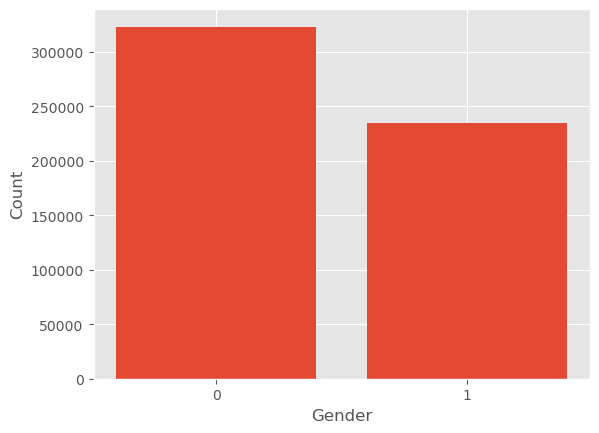

In [237]:
# Count the occurrences of each category
gender_counts = df['Gender'].value_counts()

# Create a bar plot
plt.bar(gender_counts.index, gender_counts.values)

# Set the labels for the x-axis and y-axis
plt.xlabel('Gender')
plt.ylabel('Count')

# Set the tick labels for the x-axis
plt.xticks(gender_counts.index, ['0', '1'])


### DOB

In [238]:
df['DOB'] = pd.to_datetime(df['DOB'], format="%Y-%m-%d")

In [239]:
df['Age_Year'] = df['DOB'].dt.year
df['Age_Month'] = df['DOB'].dt.month

In [240]:
df.head()

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001   CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE16973  CLM565430   2009-09-06  2009-09-06  PRV55912   
2  BENE17521   CLM34721   2009-01-20  2009-02-01  PRV55912   
3  BENE21718   CLM72336   2009-10-17  2009-11-04  PRV55912   
4  BENE22934   CLM73394   2009-10-25  2009-10-29  PRV55912   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                      50          PHY365867          PHY327147   
2                   19000          PHY349293          PHY370861   
3                   17000          PHY334706          PHY334706   
4                   13000          PHY390614          PHY323689   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN         NaN                   NaN                0.0   
2      PHY363291  2009-01-20                 45340             1068.0   
3            NaN  2009-10-17                 V5789             1068.0   
4      PHY363291  2009-10-25                 71946             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1         NaN                NaN              V7183              53081   
2  2009-02-01                987               4240               2639   
3  2009-11-04                941              V5789               4168   
4  2009-10-29                506              71535              71960   

   Admitted?        DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0          1 1943-01-01  NaN       1     1                     0     39   
1          0 1932-05-01  NaN       1     1                     0     39   
2          1 1913-12-01  NaN       0     1                     0     39   
3          1 1922-10-01  NaN       1     1                     0     39   
4          1 1930-07-01  NaN       0     1                     0     39   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0     230                   12                   12                      1   
1     310                   12                   12                      1   
2     230                   12                   12                      1   
3     600                   12                   12                      2   
4     280                   12                   12                      2   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         2                          1                   2   
1                         1                          1                   2   
2                         1                          1                   2   
3                         2                          2                   2   
4                         1                          2                   2   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                           2                       1                     1   
1                           2                       2                     2   
2                           1                       2                     2   
3                           2                       2                     2   
4                           1                       2                     1   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         2   
1                          1                         2   
2                          1                         2   
3                          1                         1   
4                          1                         1   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                

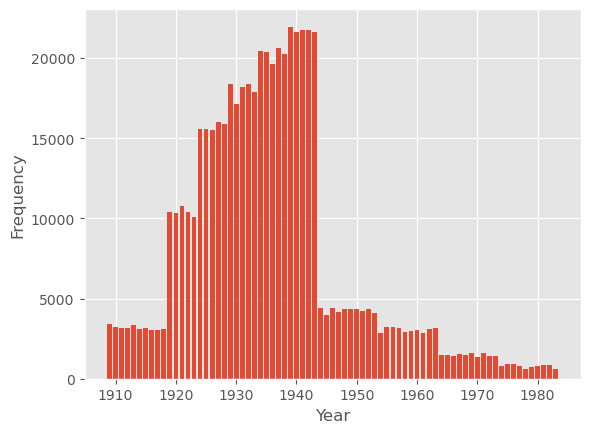

In [241]:
year_counts = df['Age_Year'].value_counts().sort_index()

# Create a bar plot
plt.bar(year_counts.index, year_counts.values)

# Set the labels for the x-axis and y-axis
plt.xlabel('Year')
plt.ylabel('Frequency')

# Show the plot
plt.show()




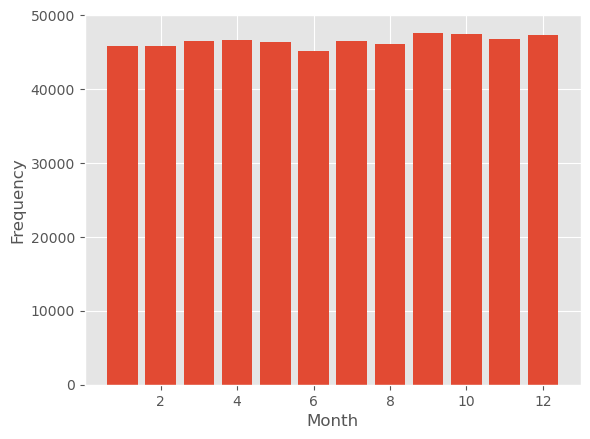

In [242]:
month_counts = df['Age_Month'].value_counts().sort_index()

# Create a bar plot
plt.bar(month_counts.index, month_counts.values)

# Set the labels for the x-axis and y-axis
plt.xlabel('Month')
plt.ylabel('Frequency')

# Show the plot
plt.show()



### dead or alive 

In [243]:
df['Dead_or_Alive'] = df['DOD'].apply(lambda val: 0 if val != val else 1)

In [244]:
df['Dead_or_Alive'].value_counts()

0    554080
1      4131
Name: Dead_or_Alive, dtype: int64

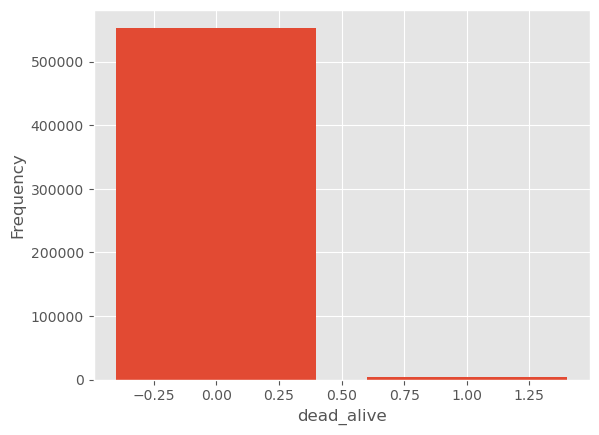

In [245]:
dead_alive = df['Dead_or_Alive'].value_counts().sort_index()

# Create a bar plot
plt.bar(dead_alive.index, dead_alive.values)

# Set the labels for the x-axis and y-axis
plt.xlabel('dead_alive')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### Age 

In [246]:
max_DOD = max(df['DOD'].unique()[1:])
max_DOD

'2009-12-01'

In [247]:
df['DOD'].fillna(value=max_DOD, inplace=True)

In [248]:
df['DOD'] = pd.to_datetime(df['DOD'])
df['DOB'] = pd.to_datetime(df['DOB'])
df['AGE'] =((df['DOD']- df['DOB']).dt.days/365.0).round(1)

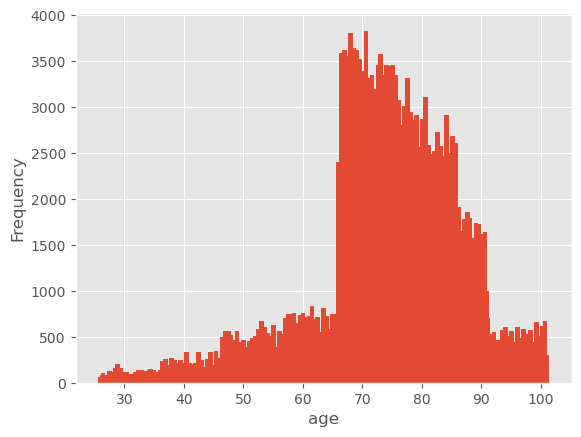

In [249]:
age = df['AGE'].value_counts().sort_index()

# Create a bar plot
plt.bar(age.index, age.values)

# Set the labels for the x-axis and y-axis
plt.xlabel('age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [250]:
df['Provider'].nunique()

5410

In [251]:
prvs_claims_df = pd.DataFrame(df.groupby(['Provider'])['ClaimID'].count()).reset_index()
prvs_claims_tgt_df = pd.merge(left=prvs_claims_df, right=df_train_y, on='Provider', how='inner')
prvs_claims_tgt_df

Provider  ClaimID PotentialFraud
0     PRV51001       25             No
1     PRV51003      132            Yes
2     PRV51004      149             No
3     PRV51005     1165            Yes
4     PRV51007       72             No
5     PRV51008       43             No
6     PRV51011       58             No
7     PRV51012       48             No
8     PRV51013       46             No
9     PRV51014       30             No
10    PRV51015        8             No
11    PRV51016        6             No
12    PRV51017      515             No
13    PRV51021      257            Yes
14    PRV51023       36             No
15    PRV51024       39             No
16    PRV51025       87             No
17    PRV51026       76             No
18    PRV51027       53             No
19    PRV51029       93             No
20    PRV51030      171             No
21    PRV51031      185             No
22    PRV51032       23             No
23    PRV51035       30             No
24    PRV51036      278             No
25    PRV51037      454            Yes
26    PRV51038      141             No
27    PRV51040       86             No
28    PRV51041       34             No
29    PRV51042      142             No
30    PRV51043       23             No
31    PRV51044       59             No
32    PRV51045       31             No
33    PRV51046       38             No
34    PRV51047       11             No
35    PRV51048       38             No
36    PRV51049       71             No
37    PRV51052       46            Yes
38    PRV51053        1             No
39    PRV51054       57             No
40    PRV51055       22             No
41    PRV51056       22             No
42    PRV51057        5             No
43    PRV51058       83             No
44    PRV51059       96            Yes
45    PRV51060       42             No
46    PRV51061      145             No
47    PRV51062      397             No
48    PRV51063      149             No
49    PRV51064      303            Yes
50    PRV51065       28             No
51    PRV51066       24             No
52    PRV51067       58            Yes
53    PRV51068      261             No
54    PRV51070       99             No
55    PRV51071       24             No
56    PRV51072      212             No
57    PRV51074       39             No
58    PRV51075       17             No
59    PRV51076       29             No
60    PRV51077       33            Yes
61    PRV51078       23             No
62    PRV51081      200             No
63    PRV51082       34             No
64    PRV51083       90             No
65    PRV51084      110            Yes
66    PRV51086      139             No
67    PRV51089      228             No
68    PRV51090        7             No
69    PRV51091       44             No
70    PRV51093        9             No
71    PRV51096        5             No
72    PRV51097      125             No
73    PRV51098        4             No
74    PRV51100        5             No
75    PRV51101        3             No
76    PRV51102       12             No
77    PRV51103        6            Yes
78    PRV51104       12             No
79    PRV51105       12             No
80    PRV51108       19             No
81    PRV51109        3             No
82    PRV51110        5             No
83    PRV51111      132             No
84    PRV51112      304             No
85    PRV51113      132             No
86    PRV51114      262             No
87    PRV51115        7             No
88    PRV51117       12             No
89    PRV51118       16             No
90    PRV51119       95            Yes
91    PRV51120        7             No
92    PRV51121        7             No
93    PRV51122        7             No
94    PRV51123       31             No
95    PRV51125       48             No
96    PRV51126       20            Yes
97    PRV51128       50             No
98    PRV51129       96             No
99    PRV51130        7             No
100   PRV51131        8             No
101   PRV51132        8     

     PotentialFraud
No           345415
Yes          212796 



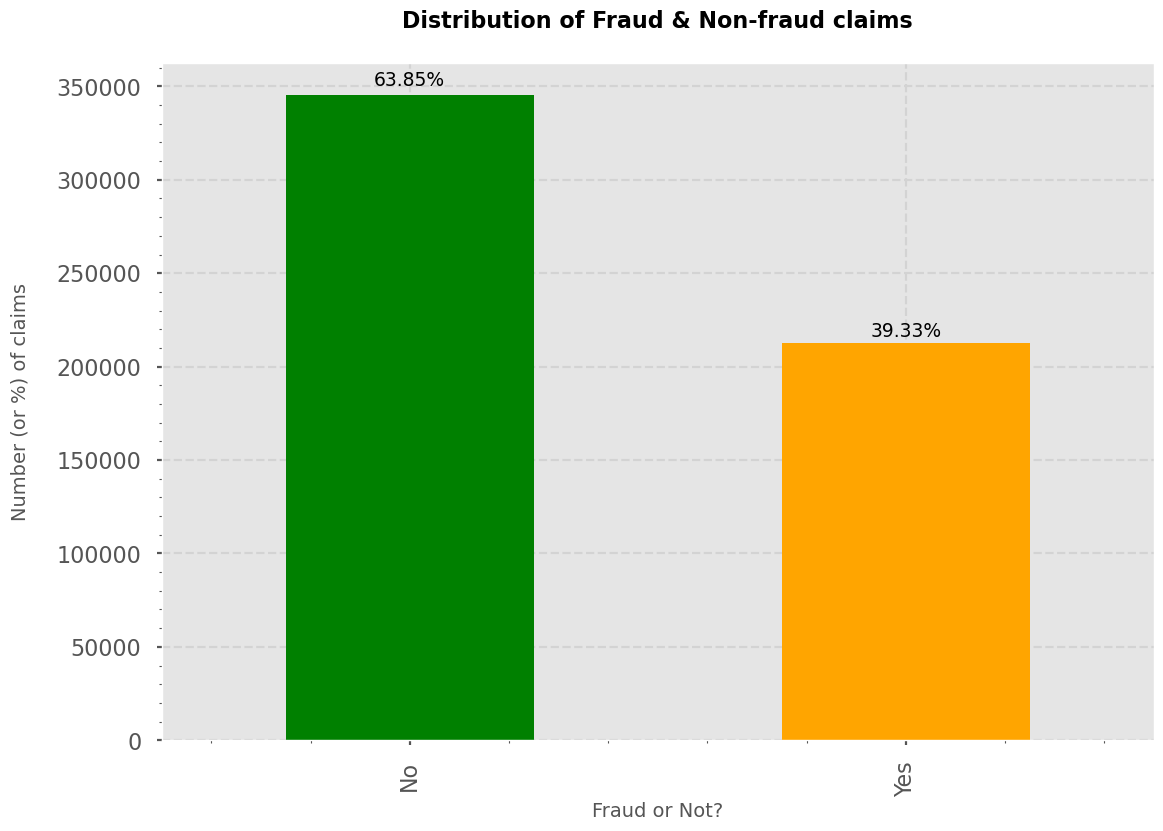

In [252]:
    import pandas as pd
    import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'prvs_claims_tgt_df' with a column 'PotentialFraud'

# Define the label_font_dict
    label_font_dict = {'fontsize': 14}
    title_font_dict = {'fontsize': 16, 'fontweight': 'bold'}
    
    print(pd.DataFrame(df['PotentialFraud'].value_counts()), "\n")

    with plt.style.context('seaborn-poster'):
         fig = df['PotentialFraud'].value_counts().plot(kind='bar', color=['green','orange'])
    
    
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height)/prvs_claims_tgt_df.shape[0],2))+"%"}', (x + width/2, y + height*1.015), ha='center', fontsize=13.5)
    # Providing the labels and title to the graph
    plt.xlabel("Fraud or Not?", fontdict=label_font_dict)
    plt.ylabel("Number (or %) of claims\n", fontdict=label_font_dict)
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Distribution of Fraud & Non-fraud claims\n", fontdict=title_font_dict)
    plt.plot();

In [253]:
df.head()

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001   CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE16973  CLM565430   2009-09-06  2009-09-06  PRV55912   
2  BENE17521   CLM34721   2009-01-20  2009-02-01  PRV55912   
3  BENE21718   CLM72336   2009-10-17  2009-11-04  PRV55912   
4  BENE22934   CLM73394   2009-10-25  2009-10-29  PRV55912   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                      50          PHY365867          PHY327147   
2                   19000          PHY349293          PHY370861   
3                   17000          PHY334706          PHY334706   
4                   13000          PHY390614          PHY323689   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN         NaN                   NaN                0.0   
2      PHY363291  2009-01-20                 45340             1068.0   
3            NaN  2009-10-17                 V5789             1068.0   
4      PHY363291  2009-10-25                 71946             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1         NaN                NaN              V7183              53081   
2  2009-02-01                987               4240               2639   
3  2009-11-04                941              V5789               4168   
4  2009-10-29                506              71535              71960   

   Admitted?        DOB        DOD  Gender  Race RenalDiseaseIndicator  State  \
0          1 1943-01-01 2009-12-01       1     1                     0     39   
1          0 1932-05-01 2009-12-01       1     1                     0     39   
2          1 1913-12-01 2009-12-01       0     1                     0     39   
3          1 1922-10-01 2009-12-01       1     1                     0     39   
4          1 1930-07-01 2009-12-01       0     1                     0     39   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0     230                   12                   12                      1   
1     310                   12                   12                      1   
2     230                   12                   12                      1   
3     600                   12                   12                      2   
4     280                   12                   12                      2   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         2                          1                   2   
1                         1                          1                   2   
2                         1                          1                   2   
3                         2                          2                   2   
4                         1                          2                   2   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                           2                       1                     1   
1                           2                       2                     2   
2                           1                       2                     2   
3                           2                       2                     2   
4                           1                       2                     1   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         2   
1                          1                         2   
2                          1                         2   
3                          1                         1   
4                          1                         1   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1     

In [254]:
df['Dead_or_Alive'].value_counts() #0 alive and 1 dead

0    554080
1      4131
Name: Dead_or_Alive, dtype: int64

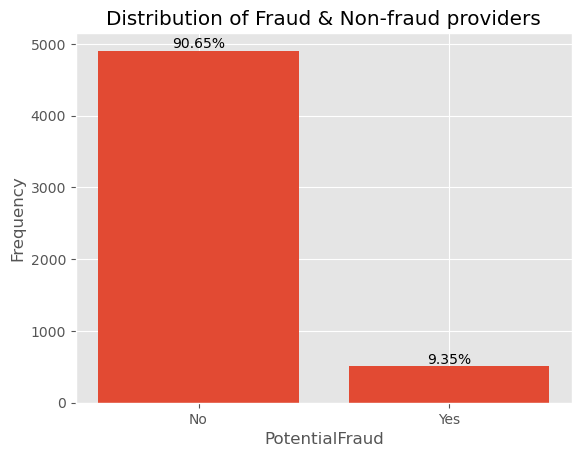

In [255]:
PotentialFraud= df_train_y['PotentialFraud'].value_counts().sort_index()

# Create a bar plot
plt.bar(PotentialFraud.index, PotentialFraud.values)

# Set the labels for the x-axis and y-axis
plt.xlabel('PotentialFraud')
plt.ylabel('Frequency')
plt.title('Distribution of Fraud & Non-fraud providers')
percentages = (PotentialFraud / PotentialFraud.sum()) * 100

# Add annotations above each bar
for i, value in enumerate(PotentialFraud.values):
    percentage = round(percentages[i], 2)
    plt.text(i, value, f'{percentage}%', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

In [256]:
df["Provider"].nunique()

5410

In [257]:
df["ClaimID"].nunique()

558211

## Feature engineering and impact analysis

### Adding New Feature :: Is_Alive?

In [258]:
df['Dead_or_Alive'].value_counts() #0 alive and 1 dead

0    554080
1      4131
Name: Dead_or_Alive, dtype: int64

### Adding New Feature :: Claim_Duration

In [259]:
df['ClaimStartDt'] = pd.to_datetime(df['ClaimStartDt'], format="%Y-%m-%d")
df['ClaimEndDt'] = pd.to_datetime(df['ClaimEndDt'], format="%Y-%m-%d")

df['Claim_Duration'] = (df['ClaimEndDt'] - df['ClaimStartDt']).dt.days

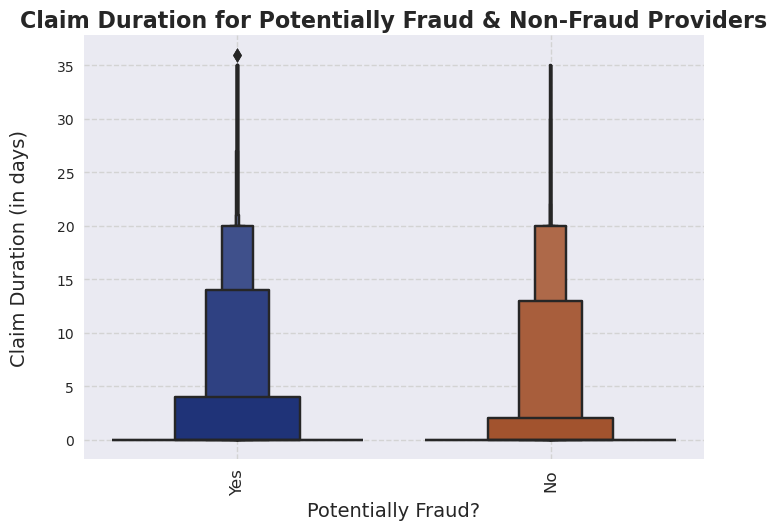

In [260]:
    with plt.style.context('seaborn'):
         fig = sns.boxenplot(data=df, x='PotentialFraud',y='Claim_Duration', palette='dark')
    # Providing the labels and title to the graph
    plt.xlabel("Potentially Fraud?", fontdict=label_font_dict)
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Claim Duration (in days)\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Claim Duration for Potentially Fraud & Non-Fraud Providers", fontdict=title_font_dict)
    plt.plot();

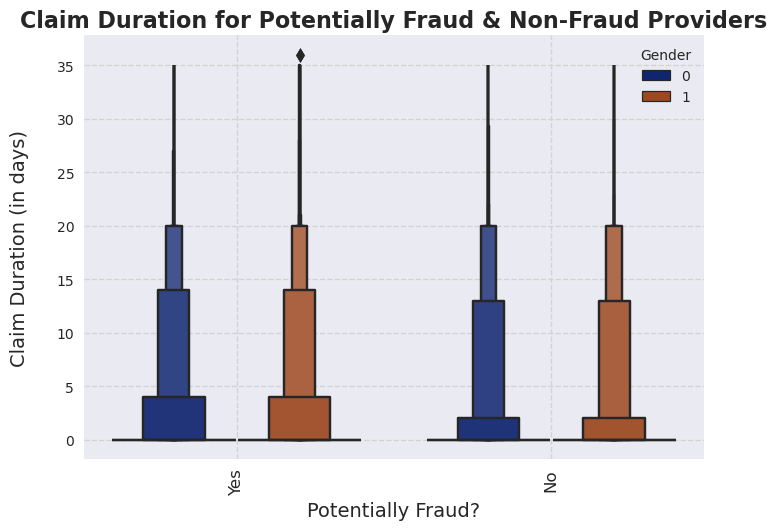

In [261]:
    with plt.style.context('seaborn'):
         fig = sns.boxenplot(data=df, x='PotentialFraud',y='Claim_Duration',hue='Gender', palette='dark')
    # Providing the labels and title to the graph
    plt.xlabel("Potentially Fraud?", fontdict=label_font_dict)
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Claim Duration (in days)\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Claim Duration for Potentially Fraud & Non-Fraud Providers", fontdict=title_font_dict)
    plt.plot();

*Observations

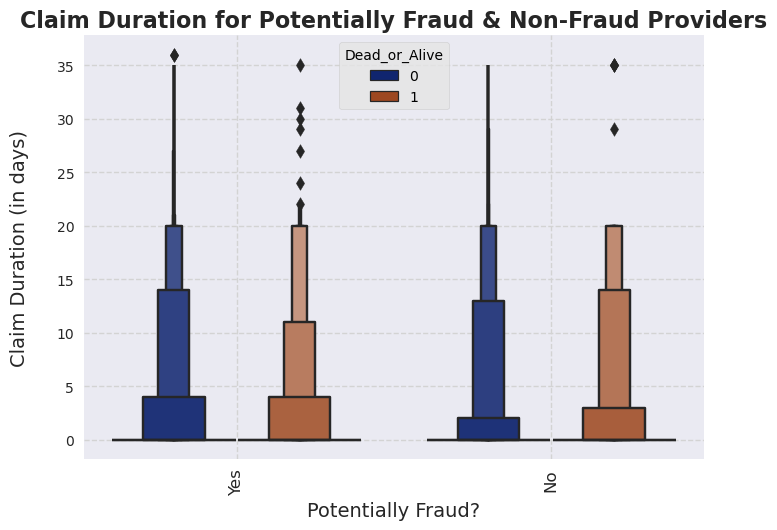

In [262]:
    with plt.style.context('seaborn'):
         fig = sns.boxenplot(data=df, x='PotentialFraud',y='Claim_Duration',hue='Dead_or_Alive', palette='dark')
    # Providing the labels and title to the graph
    plt.xlabel("Potentially Fraud?", fontdict=label_font_dict)
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Claim Duration (in days)\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Claim Duration for Potentially Fraud & Non-Fraud Providers", fontdict=title_font_dict)
    plt.plot();
    plt.legend(loc='upper center',title='Dead_or_Alive')

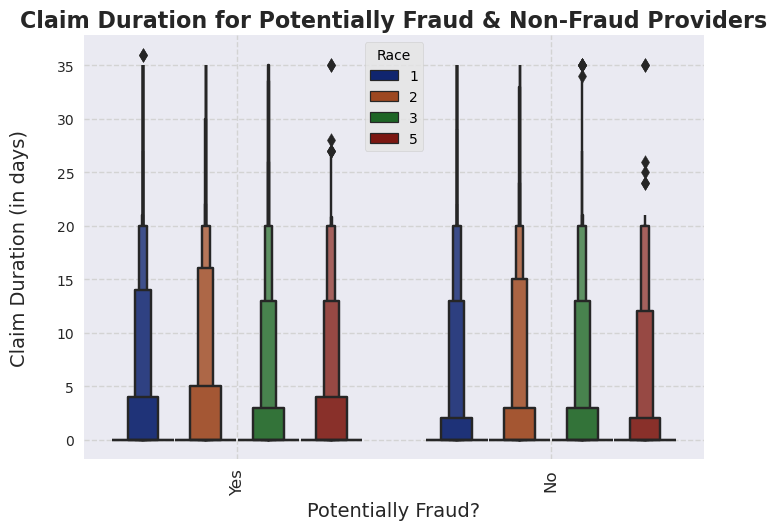

In [263]:
    with plt.style.context('seaborn'):
         fig = sns.boxenplot(data=df, x='PotentialFraud',y='Claim_Duration',hue='Race', palette='dark')
    # Providing the labels and title to the graph
    plt.xlabel("Potentially Fraud?", fontdict=label_font_dict)
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Claim Duration (in days)\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Claim Duration for Potentially Fraud & Non-Fraud Providers", fontdict=title_font_dict)
    plt.plot();
    plt.legend(loc='upper center',title='Race')

*observations

### adding admit days 

In [264]:
df['AdmissionDt'] = pd.to_datetime(df['AdmissionDt'], format="%Y-%m-%d")
df['DischargeDt'] = pd.to_datetime(df['DischargeDt'], format="%Y-%m-%d")

df['Admitted_Duration'] = (df['DischargeDt'] - df['AdmissionDt']).dt.days

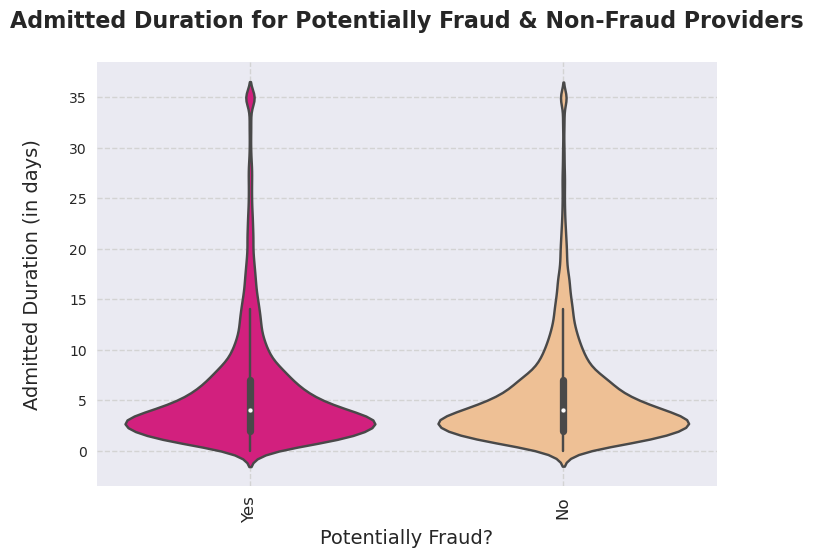

In [265]:
    with plt.style.context('seaborn'):
         fig = sns.violinplot(data=df, x='PotentialFraud',y='Admitted_Duration', palette='Accent_r')   
    # Providing the labels and title to the graph
    plt.xlabel("Potentially Fraud?", fontdict=label_font_dict)
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Admitted Duration (in days)\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Admitted Duration for Potentially Fraud & Non-Fraud Providers\n", fontdict=title_font_dict)
    plt.plot();

*observation

### adding the age 

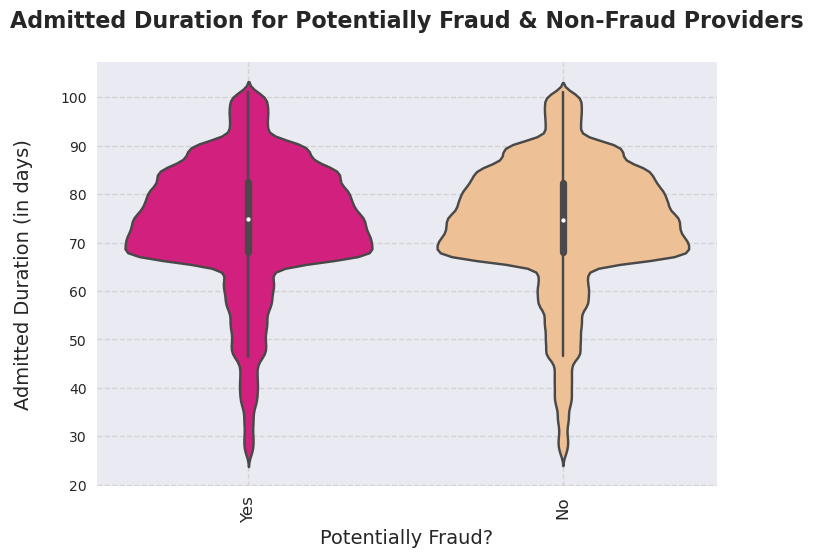

In [266]:
    with plt.style.context('seaborn'):
         fig = sns.violinplot(data=df, x='PotentialFraud',y='AGE', palette='Accent_r')   
    # Providing the labels and title to the graph
    plt.xlabel("Potentially Fraud?", fontdict=label_font_dict)
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Admitted Duration (in days)\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Admitted Duration for Potentially Fraud & Non-Fraud Providers\n", fontdict=title_font_dict)
    plt.plot();

*observation

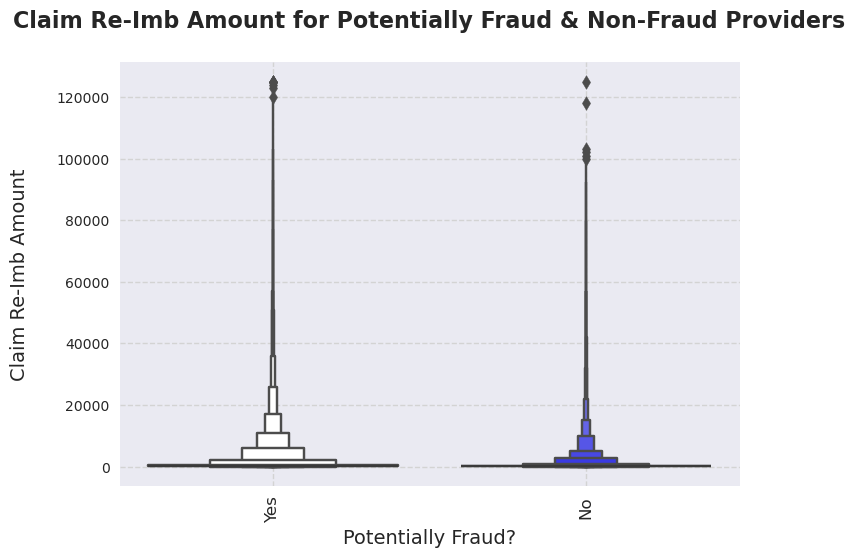

In [267]:
    with plt.style.context('seaborn'):
         fig = sns.boxenplot(data=df, x='PotentialFraud',y='InscClaimAmtReimbursed', palette='flag')   
    # Providing the labels and title to the graph
    plt.xlabel("Potentially Fraud?", fontdict=label_font_dict)
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Claim Re-Imb Amount\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Claim Re-Imb Amount for Potentially Fraud & Non-Fraud Providers\n", fontdict=title_font_dict)
    plt.plot();

*observations

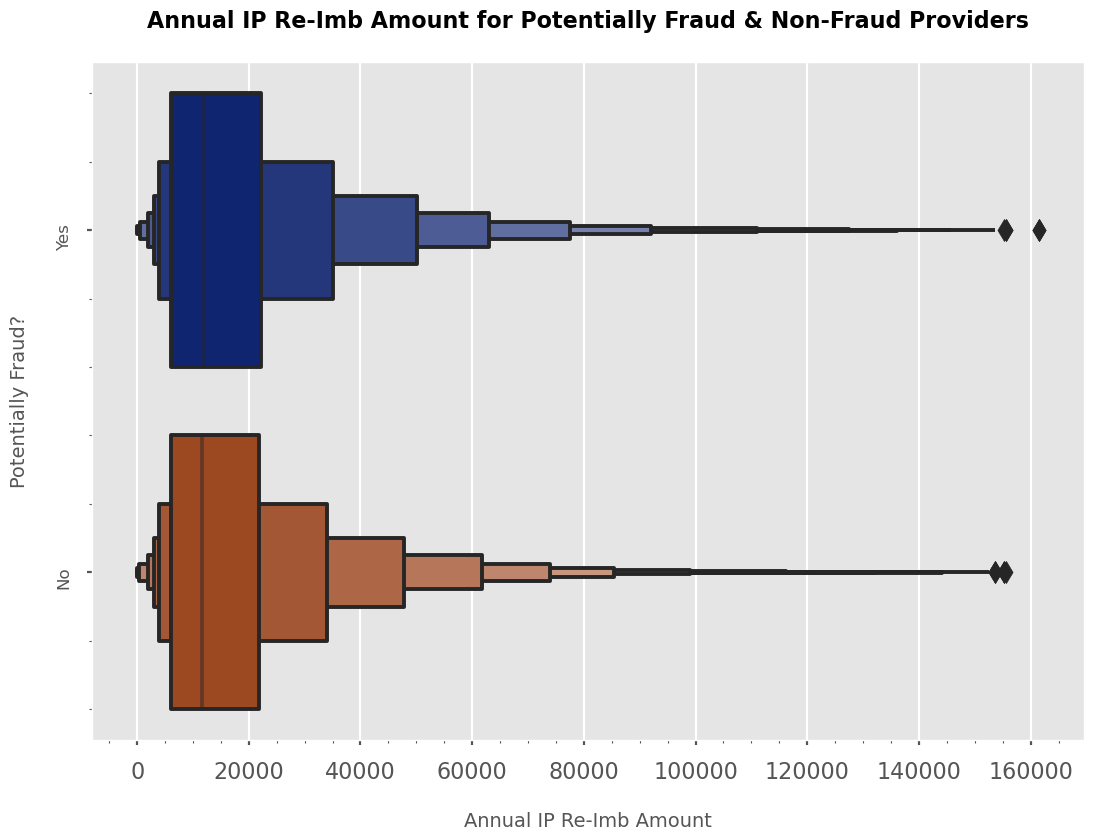

In [268]:
    with plt.style.context('seaborn-poster'):
         fig = sns.boxenplot(data=df[df['Admitted?'] == 1], y='PotentialFraud',x='IPAnnualReimbursementAmt', 
                         palette='dark', orient='h')   
    # Providing the labels and title to the graph
    plt.ylabel("Potentially Fraud?\n", fontdict=label_font_dict)
    plt.yticks(rotation=90, fontsize=12)
    plt.xlabel("\nAnnual IP Re-Imb Amount", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.title("Annual IP Re-Imb Amount for Potentially Fraud & Non-Fraud Providers\n", fontdict=title_font_dict)
    plt.plot();

*observation

In [269]:
print(pd.DataFrame(df[(df['IPAnnualReimbursementAmt'] == 0)]['Admitted?'].value_counts()))

   Admitted?
0     371263
1        413


In [270]:
print(pd.DataFrame(df[(df['IPAnnualReimbursementAmt'] == 0) & (df['Admitted?'] == 1)]['PotentialFraud'].value_counts()))

     PotentialFraud
Yes             249
No              164


*observation

sumary

Thus, we can say that if the IP Annual Amount is 0 and patient was admitted to the hospital then chances of being fraudulent are high.


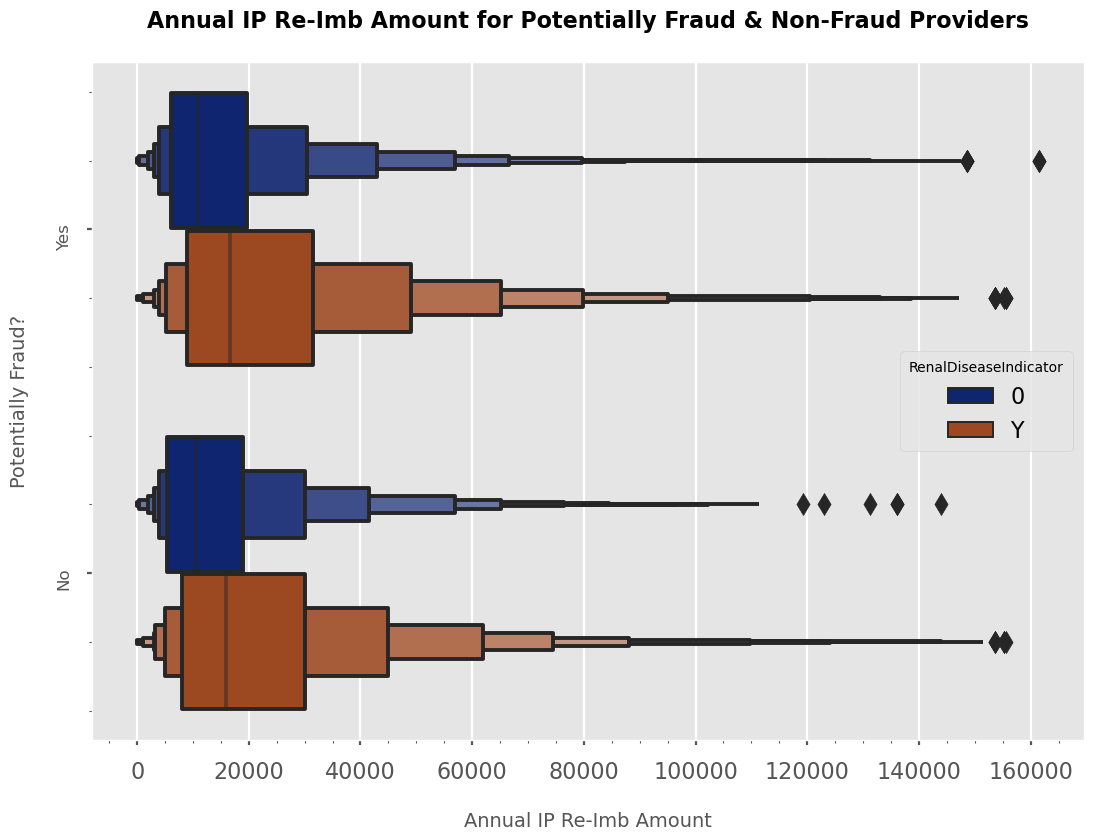

In [271]:
    with plt.style.context('seaborn-poster'):
         fig = sns.boxenplot(data=df[df['Admitted?'] == 1], y='PotentialFraud',x='IPAnnualReimbursementAmt',hue='RenalDiseaseIndicator',
                         palette='dark', orient='h')   
    # Providing the labels and title to the graph
    plt.ylabel("Potentially Fraud?\n", fontdict=label_font_dict)
    plt.yticks(rotation=90, fontsize=12)
    plt.xlabel("\nAnnual IP Re-Imb Amount", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.title("Annual IP Re-Imb Amount for Potentially Fraud & Non-Fraud Providers\n", fontdict=title_font_dict)
    plt.plot();

summary

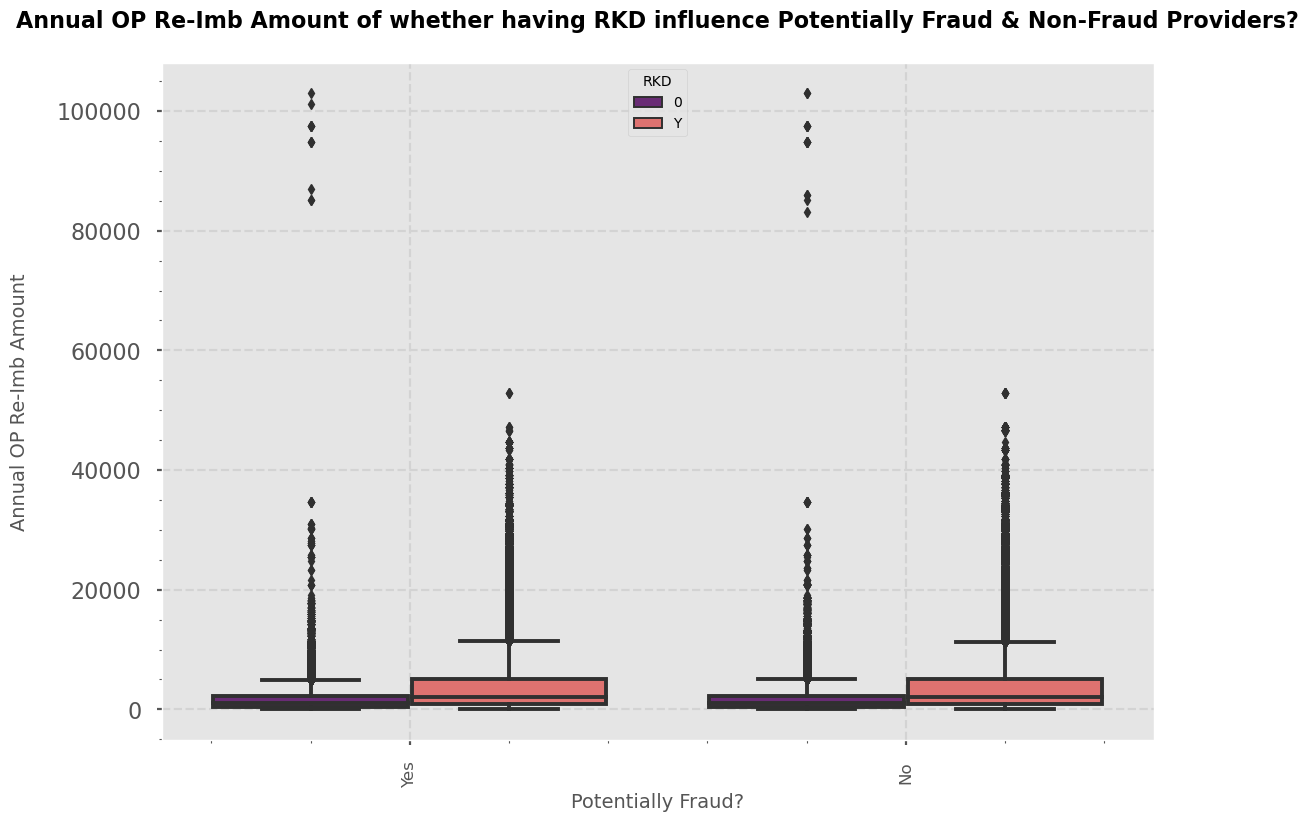

In [272]:
    with plt.style.context('seaborn-poster'):
         fig = sns.boxplot(data=df[df['Admitted?'] == 0], x='PotentialFraud',y='OPAnnualReimbursementAmt', 
                      hue='RenalDiseaseIndicator',palette='magma')   
    # Providing the labels and title to the graph
    plt.xlabel("Potentially Fraud?", fontdict=label_font_dict)
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Annual OP Re-Imb Amount\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Annual OP Re-Imb Amount of whether having RKD influence Potentially Fraud & Non-Fraud Providers?\n", fontdict=title_font_dict)
    plt.legend(loc='upper center', title='RKD');


In [273]:
df.shape

(558211, 48)

# feature engineer

In [274]:
# load the training dataset
df = pd.read_csv('Train_Beneficiarydata.csv')
df_in=pd.read_csv('Train_Inpatientdata.csv')
df_out=pd.read_csv('Train_Outpatientdata.csv')
df_test_in=pd.read_csv('Test_Inpatientdata.csv')
df_test_out=pd.read_csv('Test_outpatientdata.csv')
df_train_y=pd.read_csv('Train.csv')


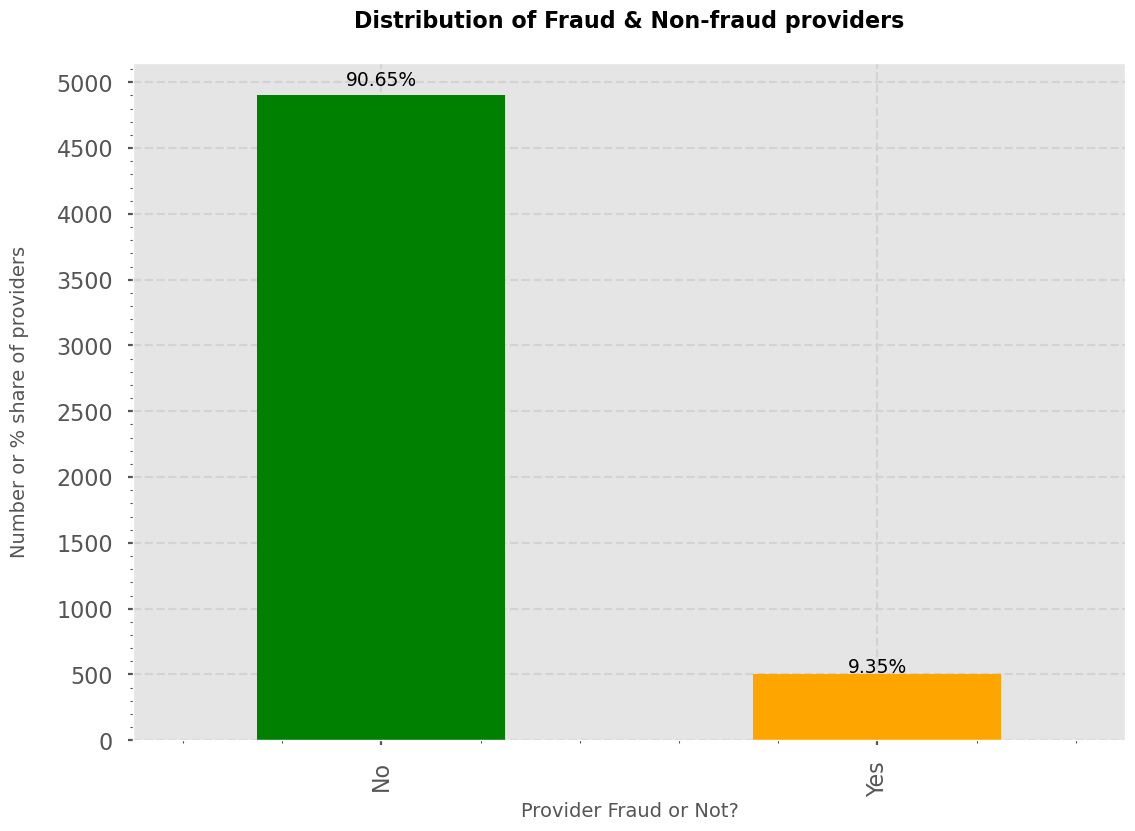

In [275]:
    with plt.style.context('seaborn-poster'):
         fig = df_train_y["PotentialFraud"].value_counts().plot(kind='bar', color=['green','orange'])
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/df_train_y.shape[0],2))+"%"}', (x + width/2, y + height*1.015), ha='center', fontsize=13.5)
    # Providing the labels and title to the graph
    plt.xlabel("Provider Fraud or Not?", fontdict=label_font_dict)
    plt.ylabel("Number or % share of providers\n", fontdict=label_font_dict)
    plt.yticks(np.arange(0,5100,500))
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Distribution of Fraud & Non-fraud providers\n", fontdict=title_font_dict)
    plt.plot();

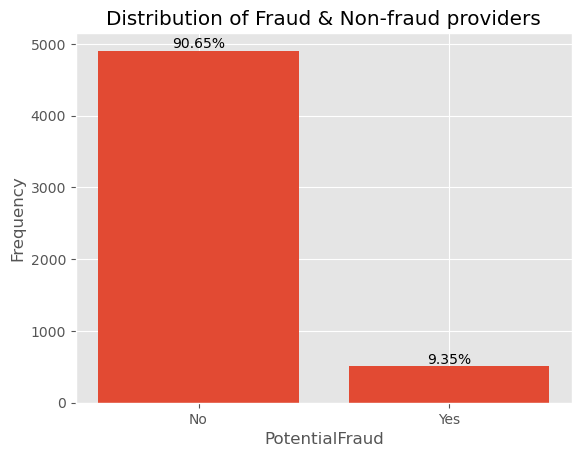

In [276]:
PotentialFraud= df_train_y['PotentialFraud'].value_counts().sort_index()

# Create a bar plot
plt.bar(PotentialFraud.index, PotentialFraud.values)

# Set the labels for the x-axis and y-axis
plt.xlabel('PotentialFraud')
plt.ylabel('Frequency')
plt.title('Distribution of Fraud & Non-fraud providers')
percentages = (PotentialFraud / PotentialFraud.sum()) * 100

# Add annotations above each bar
for i, value in enumerate(PotentialFraud.values):
    percentage = round(percentages[i], 2)
    plt.text(i, value, f'{percentage}%', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

observation

In [277]:
df_in['Admitted?']=1

In [278]:
df_out['Admitted?']=0

In [279]:
com_col=set(df_in.columns)&set(df_out.columns)
com_col=list(com_col)
print(len(com_col),com_col)

28 ['DeductibleAmtPaid', 'Provider', 'OtherPhysician', 'ClmProcedureCode_3', 'ClmDiagnosisCode_1', 'ClaimEndDt', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_10', 'InscClaimAmtReimbursed', 'ClmDiagnosisCode_3', 'ClmProcedureCode_6', 'ClmProcedureCode_1', 'ClmDiagnosisCode_2', 'AttendingPhysician', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_9', 'ClmProcedureCode_2', 'ClaimStartDt', 'BeneID', 'ClmDiagnosisCode_8', 'OperatingPhysician', 'ClaimID', 'ClmDiagnosisCode_6', 'ClmProcedureCode_4', 'ClmDiagnosisCode_5', 'ClmAdmitDiagnosisCode', 'Admitted?', 'ClmProcedureCode_5']


In [280]:
train_in_out=pd.merge(df_in, df_out, left_on=com_col, right_on=com_col, how='outer')

In [281]:
train_in_out.shape

(558211, 31)

In [282]:
df.head()

BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   
2  BENE11003  1936-08-01  NaN       1     1                     0     52   
3  BENE11004  1922-07-01  NaN       1     1                     0     39   
4  BENE11005  1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0     230                   12                   12                      1   
1     280                   12                   12                      2   
2     590                   12                   12                      1   
3     270                   12                   12                      1   
4     680                   12                   12                      2   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         2                          1                   2   
1                         2                          2                   2   
2                         2                          2                   2   
3                         1                          2                   2   
4                         2                          2                   2   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                           2                       1                     1   
1                           2                       2                     2   
2                           2                       2                     2   
3                           2                       2                     1   
4                           1                       2                     1   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         2   
1                          2                         2   
2                          1                         2   
3                          1                         1   
4                          2                         2   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                2                   2   
2                                2                   2   
3                                1                   2   
4                                2                   2   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                        30   
2                         0                      0                        90   
3                         0                      0                      1810   
4                         0                      0                      1790   

   OPAnnualDeductibleAmt  
0                     70  
1                     50  
2                     40  
3                    760  
4                   1200

In [283]:
train_in_out.head()

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN  2009-08-31                  6186             1068.0   
2      PHY324689  2009-09-17                 29590             1068.0   
3      PHY349768  2009-02-14                   431             1068.0   
4            NaN  2009-08-13                 78321             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1  2009-09-02                750               6186               2948   
2  2009-09-20                883              29623              30390   
3  2009-02-22                067              43491               2762   
4  2009-08-30                975                042               3051   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0               5853               7843               2768              71590   
1              56400                NaN                NaN                NaN   
2              71690              34590              V1581              32723   
3               7843              32723              V1041               4254   
4              34400               5856              42732                486   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               2724              19889               5849   
1                NaN                NaN                NaN   
2                NaN                NaN                NaN   
3              25062              40390               4019   
4               5119              29620              20300   

  ClmDiagnosisCode_10  ClmProcedureCode_1  ClmProcedureCode_2  \
0                 NaN                 NaN                 NaN   
1                 NaN              7092.0                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN               331.0                 NaN   
4                 NaN              3893.0                 NaN   

   ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_6  Admitted?  
0                 NaN          1  
1                 NaN          1  
2                 NaN          1  
3                 NaN          1  
4                 NaN          1

In [284]:
col=list(set(train_in_out)& set(df))
col

['BeneID']

In [285]:
train_in_out_ben=pd.merge(train_in_out, df, left_on='BeneID', right_on='BeneID', how='outer')

In [286]:
df_fin=pd.merge(train_in_out_ben, df_train_y, left_on='Provider', right_on='Provider', how='outer')

In [287]:
df_fin.shape

(558211, 56)

In [288]:
df=df_fin

In [289]:
df['Provider'].nunique()

5410

In [290]:
df['ClaimID'].nunique()

558211

In [291]:
df['BeneID'].nunique()

138556

In [292]:
df.head()

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001   CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE16973  CLM565430   2009-09-06  2009-09-06  PRV55912   
2  BENE17521   CLM34721   2009-01-20  2009-02-01  PRV55912   
3  BENE21718   CLM72336   2009-10-17  2009-11-04  PRV55912   
4  BENE22934   CLM73394   2009-10-25  2009-10-29  PRV55912   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                      50          PHY365867          PHY327147   
2                   19000          PHY349293          PHY370861   
3                   17000          PHY334706          PHY334706   
4                   13000          PHY390614          PHY323689   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN         NaN                   NaN                0.0   
2      PHY363291  2009-01-20                 45340             1068.0   
3            NaN  2009-10-17                 V5789             1068.0   
4      PHY363291  2009-10-25                 71946             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1         NaN                NaN              V7183              53081   
2  2009-02-01                987               4240               2639   
3  2009-11-04                941              V5789               4168   
4  2009-10-29                506              71535              71960   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0               5853               7843               2768              71590   
1              78959               4280              E8788              78079   
2               2948              40390              45821              28489   
3              73313               7812               7993              78830   
4               4019              V1202               4240               2449   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               2724              19889               5849   
1              79902              25002              71848   
2               5854               2753              E9305   
3              72273              43812               4019   
4               2768                NaN                NaN   

  ClmDiagnosisCode_10  ClmProcedureCode_1  ClmProcedureCode_2  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN              7769.0              5849.0   
3                 NaN              9338.0                 NaN   
4                 NaN              8154.0                 NaN   

   ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_6  Admitted?         DOB  DOD  Gender  Race  \
0                 NaN          1  1943-01-01  NaN       1     1   
1                 NaN          0  1932-05-01  NaN       1     1   
2                 NaN          1  1913-12-01  NaN       2     1   
3                 NaN          1  1922-10-01  NaN       1     1   
4                 NaN          1  1930-07-01  NaN       2     1   

  RenalDiseaseIndicator  State  County  NoOfMonths_PartACov  \
0                     0     39     230                   12   
1                     0     39     310                   12   
2                     0     39     230                   12   
3                     0     39     600           

[345415 212796]
558211


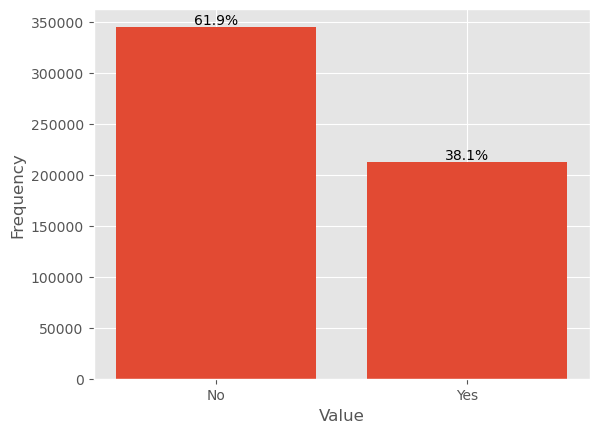

In [293]:
# Assuming 'df' is your DataFrame and 'column_name' is the name of the column containing 'Yes' and 'No' values
value_counts = df['PotentialFraud'].value_counts()

# Create a bar plot
plt.bar(value_counts.index, value_counts.values)

print(value_counts.values)
print(value_counts.sum())

# Add text annotations for percentage above each bar
total = value_counts.sum()
for i, v in enumerate(value_counts.values):
    percentage = v / total * 100
    plt.text(i, v,f'{percentage:.1f}%',ha='center',va='bottom')


# Set the labels for the x-axis and y-axis
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [294]:
df['DOB'] = pd.to_datetime(df['DOB'], format="%Y-%m-%d")
df['DOD'] = pd.to_datetime(df['DOD'], format="%Y-%m-%d")

In [295]:
df.head()

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001   CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE16973  CLM565430   2009-09-06  2009-09-06  PRV55912   
2  BENE17521   CLM34721   2009-01-20  2009-02-01  PRV55912   
3  BENE21718   CLM72336   2009-10-17  2009-11-04  PRV55912   
4  BENE22934   CLM73394   2009-10-25  2009-10-29  PRV55912   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                      50          PHY365867          PHY327147   
2                   19000          PHY349293          PHY370861   
3                   17000          PHY334706          PHY334706   
4                   13000          PHY390614          PHY323689   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN         NaN                   NaN                0.0   
2      PHY363291  2009-01-20                 45340             1068.0   
3            NaN  2009-10-17                 V5789             1068.0   
4      PHY363291  2009-10-25                 71946             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1         NaN                NaN              V7183              53081   
2  2009-02-01                987               4240               2639   
3  2009-11-04                941              V5789               4168   
4  2009-10-29                506              71535              71960   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0               5853               7843               2768              71590   
1              78959               4280              E8788              78079   
2               2948              40390              45821              28489   
3              73313               7812               7993              78830   
4               4019              V1202               4240               2449   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               2724              19889               5849   
1              79902              25002              71848   
2               5854               2753              E9305   
3              72273              43812               4019   
4               2768                NaN                NaN   

  ClmDiagnosisCode_10  ClmProcedureCode_1  ClmProcedureCode_2  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN              7769.0              5849.0   
3                 NaN              9338.0                 NaN   
4                 NaN              8154.0                 NaN   

   ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_6  Admitted?        DOB DOD  Gender  Race  \
0                 NaN          1 1943-01-01 NaT       1     1   
1                 NaN          0 1932-05-01 NaT       1     1   
2                 NaN          1 1913-12-01 NaT       2     1   
3                 NaN          1 1922-10-01 NaT       1     1   
4                 NaN          1 1930-07-01 NaT       2     1   

  RenalDiseaseIndicator  State  County  NoOfMonths_PartACov  \
0                     0     39     230                   12   
1                     0     39     310                   12   
2                     0     39     230                   12   
3                     0     39     600                   12  

New feature1: adding Is_Alive

In [296]:
df['Is_Alive?'] = df['DOD'].apply(lambda val: 'No' if val != val else 'Yes')

In [297]:
df['Is_Alive?'].value_counts()

No     554080
Yes      4131
Name: Is_Alive?, dtype: int64

New feature 2: Claim_Duration

In [298]:
df['ClaimStartDt'] = pd.to_datetime(df['ClaimStartDt'], format="%Y-%m-%d")
df['ClaimEndDt'] = pd.to_datetime(df['ClaimEndDt'], format="%Y-%m-%d")
df['Claim_Duration'] = (df['ClaimEndDt'] - df['ClaimStartDt']).dt.days

New Feature 3 : Admitted_Duration

In [299]:
df['AdmissionDt'] = pd.to_datetime(df['AdmissionDt'], format="%Y-%m-%d")
df['DischargeDt'] = pd.to_datetime(df['DischargeDt'], format="%Y-%m-%d")
df['Admitted_Duration'] = (df['ClaimEndDt'] - df['ClaimStartDt']).dt.days

Adding New Feature - 4 :: Bene_Age

In [300]:
df['DOD'].fillna(value=df['DOD'].max(), inplace=True)

In [301]:
df['Bene_Age'] = round(((df['DOD'] - df['DOB']).dt.days)/365,1)

Adding New Feature - 5:: Att_Opr_Oth_Phy_Tot_Claims

In [302]:
print("Unique number of Attending Physicians present in the dataset are --> {}".format(df['AttendingPhysician'].nunique()))

Unique number of Attending Physicians present in the dataset are --> 82063


In [303]:
df['Att_Phy_tot_claims'] = df.groupby(['AttendingPhysician'])['ClaimID'].transform('count')
df['Att_Phy_tot_claims'].describe()

count    556703.000000
mean        138.634829
std         293.669039
min           1.000000
25%           7.000000
50%          33.000000
75%         116.000000
max        2534.000000
Name: Att_Phy_tot_claims, dtype: float64

Opr_Phy_tot_claims :: Total Number of claims or cases seen by Opearting Physician

In [304]:
df['Opr_Phy_tot_claims'] = df.groupby(['OperatingPhysician'])['ClaimID'].transform('count')
df['Opr_Phy_tot_claims'].describe()

count    114447.000000
mean         27.204811
std          52.687759
min           1.000000
25%           2.000000
50%           8.000000
75%          25.000000
max         424.000000
Name: Opr_Phy_tot_claims, dtype: float64

Oth_Phy_tot_claims :: Total Number of claims or cases seen by Other Physician

In [305]:
df['Oth_Phy_tot_claims'] = df.groupby(['OtherPhysician'])['ClaimID'].transform('count')
df['Oth_Phy_tot_claims'].describe()

count    199736.000000
mean         90.207914
std         208.017235
min           1.000000
25%           3.000000
50%          15.000000
75%          60.000000
max        1247.000000
Name: Oth_Phy_tot_claims, dtype: float64

In [306]:
df['Att_Phy_tot_claims'].fillna(value=0, inplace=True)
df['Opr_Phy_tot_claims'].fillna(value=0, inplace=True)
df['Oth_Phy_tot_claims'].fillna(value=0, inplace=True)

In [307]:
df['Att_Opr_Oth_Phy_Tot_Claims'] = df['Att_Phy_tot_claims'] + df['Opr_Phy_tot_claims'] + df['Oth_Phy_tot_claims']

In [308]:
df.drop(['Att_Phy_tot_claims', 'Opr_Phy_tot_claims', 'Oth_Phy_tot_claims'], axis=1, inplace=True)

New Feature - 7 :: Prv_Tot_Att_Opr_Oth_Phys

In [309]:
df["Prv_Tot_Att_Phy"] = df.groupby(['Provider'])['AttendingPhysician'].transform('count')
df["Prv_Tot_Opr_Phy"] = df.groupby(['Provider'])['OperatingPhysician'].transform('count')
df["Prv_Tot_Oth_Phy"] = df.groupby(['Provider'])['OtherPhysician'].transform('count')

In [310]:
df.isna().sum().tail(3)

Prv_Tot_Att_Phy    0
Prv_Tot_Opr_Phy    0
Prv_Tot_Oth_Phy    0
dtype: int64

In [311]:
df['Prv_Tot_Att_Opr_Oth_Phys']=df["Prv_Tot_Att_Phy"]+df["Prv_Tot_Opr_Phy"] +df["Prv_Tot_Oth_Phy"]

In [312]:
df.drop(["Prv_Tot_Att_Phy","Prv_Tot_Opr_Phy","Prv_Tot_Oth_Phy"],axis=1, inplace=True)

Adding New Feature - 8 :: Total Unique Claim Admit Codes used by a PROVIDER

In [313]:
df['PRV_Tot_Admit_DCodes'] = df.groupby(['Provider'])['ClmAdmitDiagnosisCode'].transform('nunique')

Adding New Feature - 9 :: Total Unique Number of Diagnosis Group Codes used by a PROVIDER

In [314]:
df['PRV_Tot_DGrpCodes'] = df.groupby(['Provider'])['DiagnosisGroupCode'].transform('nunique')

New Feature - 10 :: Total unique Date of Birth years of beneficiaries provided by a Provider

In [315]:
df['DOB_Year'] = df['DOB'].dt.year

In [316]:
df['PRV_Tot_Unq_DOB_Years'] = df.groupby(['Provider'])['DOB_Year'].transform('nunique')

In [317]:
df.drop(['DOB_Year'],axis=1, inplace=True)

Adding New Feature - 11 :: Sum of patients age treated by a Provider

In [318]:
df['PRV_Bene_Age_Sum']=df.groupby(['Provider'])['Bene_Age'].transform('sum')

Adding New Feature - 12 :: Sum of Insc Claim Re-Imb Amount for a Provider

In [319]:
df['PRV_Insc_Clm_ReImb_Amt'] = df.groupby(['Provider'])['InscClaimAmtReimbursed'].transform('sum')

Adding New Feature - 13 :: Total number of RKD Patients seen by a Provider

In [320]:
df['RenalDiseaseIndicator'] = df['RenalDiseaseIndicator'].apply(lambda val: 1 if val == "Y" else 0)

In [321]:
df['PRV_Tot_RKD_Patients'] = df.groupby(['Provider'])['RenalDiseaseIndicator'].transform('sum')

In [322]:
df.drop(['NoOfMonths_PartACov', 'NoOfMonths_PartBCov'], axis=1, inplace=True)

In [323]:
df['Admitted_Duration'].fillna(value=0,inplace=True)

In [324]:
df.shape

(558211, 66)

# data aggreation

Adding Aggregated Features :: For every possible level
- Provider
- Beneficiary
- Attending Physician
- Operating Physician
- Other Physician and etc..

In [325]:
train_iobp_df=df

In [326]:
# PRV Aggregate features
train_iobp_df["PRV_CoPayment"] = train_iobp_df.groupby('Provider')['DeductibleAmtPaid'].transform('sum')
train_iobp_df["PRV_IP_Annual_ReImb_Amt"] = train_iobp_df.groupby('Provider')['IPAnnualReimbursementAmt'].transform('sum')
train_iobp_df["PRV_IP_Annual_Ded_Amt"] = train_iobp_df.groupby('Provider')['IPAnnualDeductibleAmt'].transform('sum')
train_iobp_df["PRV_OP_Annual_ReImb_Amt"] = train_iobp_df.groupby('Provider')['OPAnnualReimbursementAmt'].transform('sum')
train_iobp_df["PRV_OP_Annual_Ded_Amt"] = train_iobp_df.groupby('Provider')['OPAnnualDeductibleAmt'].transform('sum')
train_iobp_df["PRV_Admit_Duration"] = train_iobp_df.groupby('Provider')['Admitted_Duration'].transform('sum')
train_iobp_df["PRV_Claim_Duration"] = train_iobp_df.groupby('Provider')['Claim_Duration'].transform('sum')

In [327]:
def create_agg_feats(grp_col, feat_name, operation='sum'):
    """
    Description :: This function is created for adding the aggregated features in the dataset for every level like:
        - Beneficiary
        - Attending Physician
        - Operating Physician
        - Other Physician and etc..
        
    Input Parameters :: It accepts below inputs:
        - grp_col : `str`
            - It represents the feature or level at which you want to perform the aggregation.
        
        - feat_name : `str`
            - It represents the feature whose aggregated aspect you want to capture.
        
        - operation : `str`
            - It represents the aggregation operation you want to perform.(By default it is SUM)
    """
    feat_1 = feat_name + "_Insc_ReImb_Amt"
    train_iobp_df[feat_1] = train_iobp_df.groupby(grp_col)['InscClaimAmtReimbursed'].transform(operation)

    feat_2 = feat_name + "_CoPayment"
    train_iobp_df[feat_2] = train_iobp_df.groupby(grp_col)['DeductibleAmtPaid'].transform(operation)

    feat_3 = feat_name + "_IP_Annual_ReImb_Amt"
    train_iobp_df[feat_3] = train_iobp_df.groupby(grp_col)['IPAnnualReimbursementAmt'].transform(operation)

    feat_4 = feat_name + "_IP_Annual_Ded_Amt"
    train_iobp_df[feat_4] = train_iobp_df.groupby(grp_col)['IPAnnualDeductibleAmt'].transform(operation)

    feat_5 = feat_name + "_OP_Annual_ReImb_Amt"
    train_iobp_df[feat_5] = train_iobp_df.groupby(grp_col)['OPAnnualReimbursementAmt'].transform(operation)

    feat_6 = feat_name + "_OP_Annual_Ded_Amt"
    train_iobp_df[feat_6] = train_iobp_df.groupby(grp_col)['OPAnnualDeductibleAmt'].transform(operation)

    feat_7 = feat_name + "_Admit_Duration"
    train_iobp_df[feat_7] = train_iobp_df.groupby(grp_col)['Admitted_Duration'].transform(operation)

    feat_8 = feat_name + "_Claim_Duration"
    train_iobp_df[feat_8] = train_iobp_df.groupby(grp_col)['Claim_Duration'].transform(operation)

In [328]:
# BENE, PHYs, Diagnosis Admit and Group Codes columns
create_agg_feats(grp_col='BeneID', feat_name="BENE")
create_agg_feats(grp_col='AttendingPhysician', feat_name="ATT_PHY")
create_agg_feats(grp_col='OperatingPhysician', feat_name="OPT_PHY")
create_agg_feats(grp_col='OtherPhysician', feat_name="OTH_PHY")
create_agg_feats(grp_col='ClmAdmitDiagnosisCode', feat_name="Claim_Admit_Diag_Code")
create_agg_feats(grp_col='DiagnosisGroupCode', feat_name="Diag_GCode")

In [329]:
# Dropping these 3 columns as there 99% of values are same
train_iobp_df.drop(['ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6'], axis=1, inplace=True)

In [330]:
# Diagnosis Codes columns
create_agg_feats(grp_col='ClmDiagnosisCode_1', feat_name="Claim_DiagCode1")
create_agg_feats(grp_col='ClmDiagnosisCode_2', feat_name="Claim_DiagCode2")
create_agg_feats(grp_col='ClmDiagnosisCode_3', feat_name="Claim_DiagCode3")
create_agg_feats(grp_col='ClmDiagnosisCode_4', feat_name="Claim_DiagCode4")
create_agg_feats(grp_col='ClmDiagnosisCode_5', feat_name="Claim_DiagCode5")
create_agg_feats(grp_col='ClmDiagnosisCode_6', feat_name="Claim_DiagCode6")
create_agg_feats(grp_col='ClmDiagnosisCode_7', feat_name="Claim_DiagCode7")
create_agg_feats(grp_col='ClmDiagnosisCode_8', feat_name="Claim_DiagCode8")
create_agg_feats(grp_col='ClmDiagnosisCode_9', feat_name="Claim_DiagCode9")
create_agg_feats(grp_col='ClmDiagnosisCode_10', feat_name="Claim_DiagCode10")

In [331]:
# Medical Procedure Codes columns
create_agg_feats(grp_col='ClmProcedureCode_1', feat_name="Claim_ProcCode1")
create_agg_feats(grp_col='ClmProcedureCode_2', feat_name="Claim_ProcCode2")
create_agg_feats(grp_col='ClmProcedureCode_3', feat_name="Claim_ProcCode3")

Adding Aggregated Features :: Based on various combinations of different levels in order to introduce their interactions in the dataset.¶


In [332]:
# PROVIDER <--> other features :: To get claim counts
train_iobp_df["ClmCount_Provider"]=train_iobp_df.groupby(['Provider'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID"]=train_iobp_df.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_AttendingPhysician"]=train_iobp_df.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_OtherPhysician"]=train_iobp_df.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_OperatingPhysician"]=train_iobp_df.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmAdmitDiagnosisCode"]=train_iobp_df.groupby(['Provider','ClmAdmitDiagnosisCode'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmDiagnosisCode_1"]=train_iobp_df.groupby(['Provider','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmDiagnosisCode_2"]=train_iobp_df.groupby(['Provider','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmDiagnosisCode_3"]=train_iobp_df.groupby(['Provider','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmDiagnosisCode_4"]=train_iobp_df.groupby(['Provider','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmDiagnosisCode_5"]=train_iobp_df.groupby(['Provider','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmDiagnosisCode_6"]=train_iobp_df.groupby(['Provider','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmDiagnosisCode_7"]=train_iobp_df.groupby(['Provider','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmDiagnosisCode_8"]=train_iobp_df.groupby(['Provider','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmDiagnosisCode_9"]=train_iobp_df.groupby(['Provider','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_ClmDiagnosisCode_10"]=train_iobp_df.groupby(['Provider','ClmDiagnosisCode_10'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_DiagnosisGroupCode"]=train_iobp_df.groupby(['Provider','DiagnosisGroupCode'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> PHYSICIANS :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> ATTENDING PHYSICIAN <--> PROCEDURE CODES :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_3'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> OPERATING PHYSICIAN <--> PROCEDURE CODES :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmProcedureCode_3'])['ClaimID'].transform('count')

In [343]:
# PROVIDER <--> BENE <--> OTHER PHYSICIAN <--> PROCEDURE CODES :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmProcedureCode_3'])['ClaimID'].transform('count')
# PROVIDER <--> BENE <--> ATTENDING PHYSICIAN <--> DIAGNOSIS CODES :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_2"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_3"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_4"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_5"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_6"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_7"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_8"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_9"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_10"]=train_iobp_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_10'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> OPERATING PHYSICIAN <--> DIAGNOSIS CODES :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_1"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_2"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_3"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_4"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_5"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_6"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_7"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_8"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_9"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_10"]=train_iobp_df.groupby(['Provider','BeneID','OperatingPhysician','ClmDiagnosisCode_10'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> OTHER PHYSICIAN <--> DIAGNOSIS CODES :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_1"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_2"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_3"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_4"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_5"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_6"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_7"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_8"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_9"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_10"]=train_iobp_df.groupby(['Provider','BeneID','OtherPhysician','ClmDiagnosisCode_10'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> PROCEDURE CODES :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmProcedureCode_3'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> DIAGNOSIS CODES :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_4"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_5"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_6"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_7"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_8"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_9"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_10"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_10'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> DIAGNOSIS CODES <--> PROCEDURE CODES :: To get claim counts
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_2_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_2','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_2_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_2','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_2_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_2','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_3_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_3','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_3_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_3','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_3_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_3','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_4_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_4','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_4_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_4','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_4_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_4','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_5_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_5','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_5_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_5','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_5_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_5','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_6','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_6','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_6','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_7_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_7','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_7_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_7','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_7_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_7','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_8','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_8','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_8','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_9','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_9','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_9','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_1"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_10','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_2"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_10','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_iobp_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_3"]=train_iobp_df.groupby(['Provider','BeneID','ClmDiagnosisCode_10','ClmProcedureCode_3'])['ClaimID'].transform('count')


KeyError: 'BeneID'

In [334]:
train_iobp_df.shape

(558211, 327)

In [335]:
# Removing unwanted columns
remove_unwanted_columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician','OperatingPhysician', 'OtherPhysician',
                      'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DischargeDt', 'DiagnosisGroupCode',
                      'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 
                      'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                      'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'DOB', 'DOD', 'State', 'County']

train_iobp_df.drop(columns=remove_unwanted_columns, axis=1, inplace=True)

In [336]:
# Filling Nulls in Deductible Amt Paid by Patient
train_iobp_df['DeductibleAmtPaid'].fillna(value=0, inplace=True)

In [337]:
train_iobp_df.columns

Index(['Provider', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'Admitted?',
       'Gender', 'Race', 'RenalDiseaseIndicator', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       ...
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_7_ClmProcedureCode_3',
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_1',
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_2',
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_3',
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_1',
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_2',
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_3',
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_1',
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_2',
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_3'],
      dtype='object', length=299)

In [338]:
# Binary encoding the categorical features --> 0 means No and 1 means Yes
train_iobp_df['Gender'] = train_iobp_df['Gender'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['PotentialFraud'] = train_iobp_df['PotentialFraud'].apply(lambda val: 0 if val == "No" else 1)
train_iobp_df['Is_Alive?'] = train_iobp_df['Is_Alive?'].apply(lambda val: 0 if val == "No" else 1)

train_iobp_df['ChronicCond_Alzheimer'] = train_iobp_df['ChronicCond_Alzheimer'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Heartfailure'] = train_iobp_df['ChronicCond_Heartfailure'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_KidneyDisease'] = train_iobp_df['ChronicCond_KidneyDisease'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Cancer'] = train_iobp_df['ChronicCond_Cancer'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_ObstrPulmonary'] = train_iobp_df['ChronicCond_ObstrPulmonary'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Depression'] = train_iobp_df['ChronicCond_Depression'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Diabetes'] = train_iobp_df['ChronicCond_Diabetes'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_IschemicHeart'] = train_iobp_df['ChronicCond_IschemicHeart'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Osteoporasis'] = train_iobp_df['ChronicCond_Osteoporasis'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_rheumatoidarthritis'] = train_iobp_df['ChronicCond_rheumatoidarthritis'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_stroke'] = train_iobp_df['ChronicCond_stroke'].apply(lambda val: 0 if val == 2 else val)
# Encoding the Categorical features
train_iobp_df = pd.get_dummies(train_iobp_df,columns=['Gender', 'Race', 'Admitted?', 'Is_Alive?'], drop_first=True)
pd.set_option('display.max_rows',310)

In [339]:
train_iobp_df.columns

Index(['Provider', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'RenalDiseaseIndicator', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression',
       ...
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_3',
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_1',
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_2',
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_3',
       'Gender_1', 'Race_2', 'Race_3', 'Race_5', 'Admitted?_1', 'Is_Alive?_1'],
      dtype='object', length=301)

In [340]:
# Checking Nulls in the features
pd.DataFrame(train_iobp_df.isna().sum())

0
Provider                                                 0
InscClaimAmtReimbursed                                   0
DeductibleAmtPaid                                        0
RenalDiseaseIndicator                                    0
ChronicCond_Alzheimer                                    0
ChronicCond_Heartfailure                                 0
ChronicCond_KidneyDisease                                0
ChronicCond_Cancer                                       0
ChronicCond_ObstrPulmonary                               0
ChronicCond_Depression                                   0
ChronicCond_Diabetes                                     0
ChronicCond_IschemicHeart                                0
ChronicCond_Osteoporasis                                 0
ChronicCond_rheumatoidarthritis                          0
ChronicCond_stroke                                       0
IPAnnualReimbursementAmt                                 0
IPAnnualDeductibleAmt                                    0
OPAnnualReimbursementAmt                                 0
OPAnnualDeductibleAmt                                    0
PotentialFraud                                           0
Claim_Duration                                           0
Admitted_Duration                                        0
Bene_Age                                                 0
Att_Opr_Oth_Phy_Tot_Claims                               0
Prv_Tot_Att_Opr_Oth_Phys                                 0
PRV_Tot_Admit_DCodes                                     0
PRV_Tot_DGrpCodes                                        0
PRV_Tot_Unq_DOB_Years                                    0
PRV_Bene_Age_Sum                                         0
PRV_Insc_Clm_ReImb_Amt                                   0
PRV_Tot_RKD_Patients                                     0
PRV_CoPayment                                            0
PRV_IP_Annual_ReImb_Amt                                  0
PRV_IP_Annual_Ded_Amt                                    0
PRV_OP_Annual_ReImb_Amt                                  0
PRV_OP_Annual_Ded_Amt                                    0
PRV_Admit_Duration                                       0
PRV_Claim_Duration                                       0
BENE_Insc_ReImb_Amt                                      0
BENE_CoPayment                                           0
BENE_IP_Annual_ReImb_Amt                                 0
BENE_IP_Annual_Ded_Amt                                   0
BENE_OP_Annual_ReImb_Amt                                 0
BENE_OP_Annual_Ded_Amt                                   0
BENE_Admit_Duration                                      0
BENE_Claim_Duration                                      0
ATT_PHY_Insc_ReImb_Amt                                1508
ATT_PHY_CoPayment                                     1508
ATT_PHY_IP_Annual_ReImb_Amt                           1508
ATT_PHY_IP_Annual_Ded_Amt                             1508
ATT_PHY_OP_Annual_ReImb_Amt                           1508
ATT_PHY_OP_Annual_Ded_Amt                             1508
ATT_PHY_Admit_Duration                                1508
ATT_PHY_Claim_Duration                                1508
OPT_PHY_Insc_ReImb_Amt                              443764
OPT_PHY_CoPayment                                   443764
OPT_PHY_IP_Annual_ReImb_Amt                         443764
OPT_PHY_IP_Annual_Ded_Amt                           443764
OPT_PHY_OP_Annual_ReImb_Amt                         443764
OPT_PHY_OP_Annual_Ded_Amt                           443764
OPT_PHY_Admit_Duration                              443764
OPT_PHY_Claim_Duration                              443764
OTH_PHY_Insc_ReImb_Amt                              358475
OTH_PHY_CoPayment                                   358475
OTH_PHY_IP_Annual_ReImb_Amt                         358475
OTH_PHY_IP_Annual_Ded_Amt                           358475
OTH_PHY_OP_Annual_ReImb_Amt                         358475
OTH_PHY_OP_Annual_Ded_Amt                    

In [341]:
# Filling Nulls in the aggregated features
train_iobp_df.fillna(value=0, inplace=True)


In [342]:
pd.DataFrame(train_iobp_df.isna().sum())

0
Provider                                            0
InscClaimAmtReimbursed                              0
DeductibleAmtPaid                                   0
RenalDiseaseIndicator                               0
ChronicCond_Alzheimer                               0
ChronicCond_Heartfailure                            0
ChronicCond_KidneyDisease                           0
ChronicCond_Cancer                                  0
ChronicCond_ObstrPulmonary                          0
ChronicCond_Depression                              0
ChronicCond_Diabetes                                0
ChronicCond_IschemicHeart                           0
ChronicCond_Osteoporasis                            0
ChronicCond_rheumatoidarthritis                     0
ChronicCond_stroke                                  0
IPAnnualReimbursementAmt                            0
IPAnnualDeductibleAmt                               0
OPAnnualReimbursementAmt                            0
OPAnnualDeductibleAmt                               0
PotentialFraud                                      0
Claim_Duration                                      0
Admitted_Duration                                   0
Bene_Age                                            0
Att_Opr_Oth_Phy_Tot_Claims                          0
Prv_Tot_Att_Opr_Oth_Phys                            0
PRV_Tot_Admit_DCodes                                0
PRV_Tot_DGrpCodes                                   0
PRV_Tot_Unq_DOB_Years                               0
PRV_Bene_Age_Sum                                    0
PRV_Insc_Clm_ReImb_Amt                              0
PRV_Tot_RKD_Patients                                0
PRV_CoPayment                                       0
PRV_IP_Annual_ReImb_Amt                             0
PRV_IP_Annual_Ded_Amt                               0
PRV_OP_Annual_ReImb_Amt                             0
PRV_OP_Annual_Ded_Amt                               0
PRV_Admit_Duration                                  0
PRV_Claim_Duration                                  0
BENE_Insc_ReImb_Amt                                 0
BENE_CoPayment                                      0
BENE_IP_Annual_ReImb_Amt                            0
BENE_IP_Annual_Ded_Amt                              0
BENE_OP_Annual_ReImb_Amt                            0
BENE_OP_Annual_Ded_Amt                              0
BENE_Admit_Duration                                 0
BENE_Claim_Duration                                 0
ATT_PHY_Insc_ReImb_Amt                              0
ATT_PHY_CoPayment                                   0
ATT_PHY_IP_Annual_ReImb_Amt                         0
ATT_PHY_IP_Annual_Ded_Amt                           0
ATT_PHY_OP_Annual_ReImb_Amt                         0
ATT_PHY_OP_Annual_Ded_Amt                           0
ATT_PHY_Admit_Duration                              0
ATT_PHY_Claim_Duration                              0
OPT_PHY_Insc_ReImb_Amt                              0
OPT_PHY_CoPayment                                   0
OPT_PHY_IP_Annual_ReImb_Amt                         0
OPT_PHY_IP_Annual_Ded_Amt                           0
OPT_PHY_OP_Annual_ReImb_Amt                         0
OPT_PHY_OP_Annual_Ded_Amt                           0
OPT_PHY_Admit_Duration                              0
OPT_PHY_Claim_Duration                              0
OTH_PHY_Insc_ReImb_Amt                              0
OTH_PHY_CoPayment                                   0
OTH_PHY_IP_Annual_ReImb_Amt                         0
OTH_PHY_IP_Annual_Ded_Amt                           0
OTH_PHY_OP_Annual_ReImb_Amt                         0
OTH_PHY_OP_Annual_Ded_Amt                           0
OTH_PHY_Admit_Duration                              0
OTH_PHY_Claim_Duration                              0
Claim_Admit_Diag_Code_Insc_ReImb_Amt                0
Claim_Admit_Diag_Code_CoPayment                     0
Claim_Admit_Diag_Code_IP_Annual_ReImb_Amt           0
Claim_Admit_Diag_Code_IP_Annual_Ded_Amt             0
Cl

In [344]:
train_iobp_df.shape

(558211, 301)

Entire Data Aggregation :: At provider level

In [345]:
train_iobp_df_1 = train_iobp_df.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')

In [346]:
train_iobp_df_1.shape

(5410, 301)

In [174]:
train_iobp_df.head()

Provider  PotentialFraud  InscClaimAmtReimbursed  DeductibleAmtPaid  \
0  PRV51001               0                  104640             5340.0   
1  PRV51003               1                  605670            66286.0   
2  PRV51004               0                   52170              310.0   
3  PRV51005               1                  280910             3700.0   
4  PRV51007               0                   33710             3264.0   

   RenalDiseaseIndicator  ChronicCond_Alzheimer  ChronicCond_Heartfailure  \
0                      8                     15                        19   
1                     29                     56                        80   
2                     23                     64                        88   
3                    259                    426                       680   
4                     11                     26                        40   

   ChronicCond_KidneyDisease  ChronicCond_Cancer  ChronicCond_ObstrPulmonary  \
0                         17                   5                          10   
1                         64                  10                          41   
2                         50                  16                          41   
3                        507                 165                         295   
4                         22                  12                          16   

   ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                       9                    21                         23   
1                      54                   100                        112   
2                      63                   105                        108   
3                     485                   799                        895   
4                      29                    49                         51   

   ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
0                         6                                8   
1                        33                               38   
2                        49                               46   
3                       344                              331   
4                        21                               22   

   ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
0                   6                    440150                  22428   
1                  12                    999000                 122948   
2                  17                    648430                  64808   
3                 124                   4221950                 441724   
4                  12                    219600                  32040   

   OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  Claim_Duration  \
0                     65380                  11598              36   
1                    353520                  97300             485   
2                    327040                  92790             213   
3                   2457840                 741323            1268   
4                    124540                  33820              69   

   Admitted_Duration  Bene_Age  Att_Opr_Oth_Phy_Tot_Claims  \
0                 36    1970.1                       100.0   
1                485    9245.9                      3097.0   
2                213   10762.2                      1623.0   
3               1268   82143.6                    327477.0   
4                 69    4987.8                      2342.0   

   Prv_Tot_Att_Opr_Oth_Phys  PRV_Tot_Admit_DCodes  PRV_Tot_DGrpCodes  \
0                      1000                   275                125   
1                     26664                  7656               7656   
2                     35611                  3725                  0   
3                   2170395                184070                  0   
4                      7920                  1224                216   

   PRV_Tot_Unq_DOB_Years  PRV_Bene_Age_Sum  PRV_Insc_Clm_ReImb_Amt  \
0                 

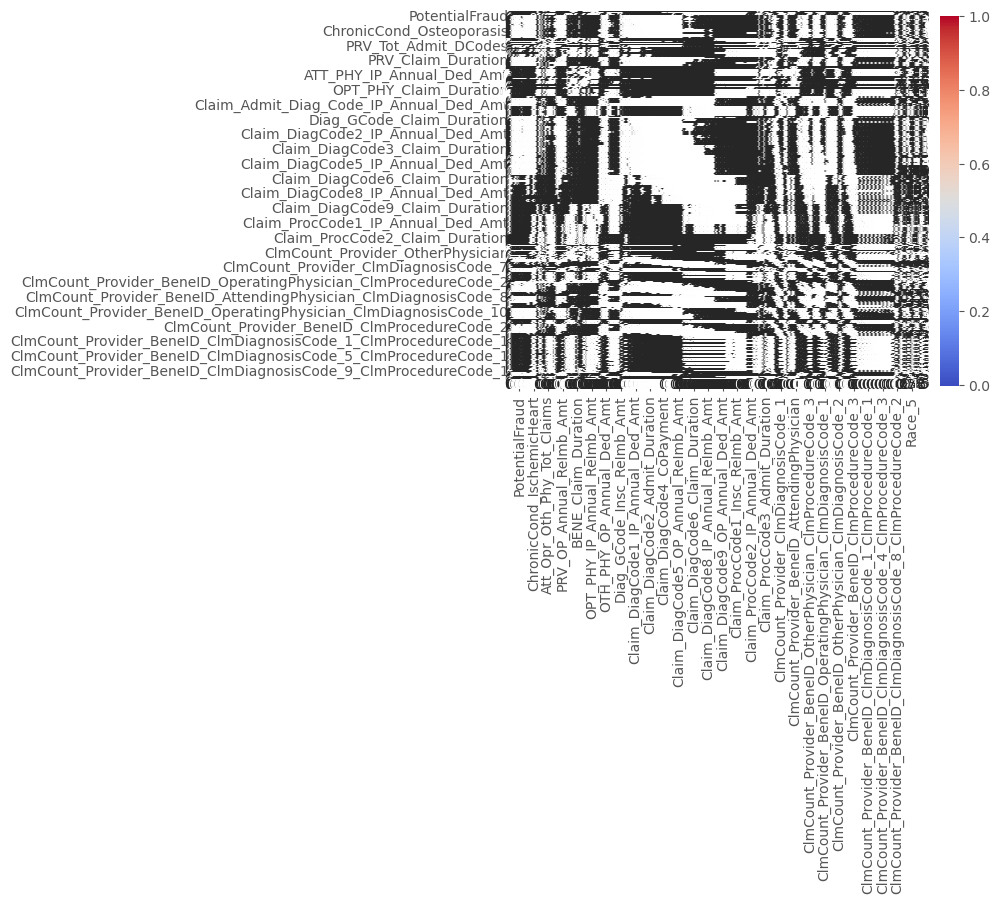

In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = train_iobp_df.corr()

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the plot
plt.show()

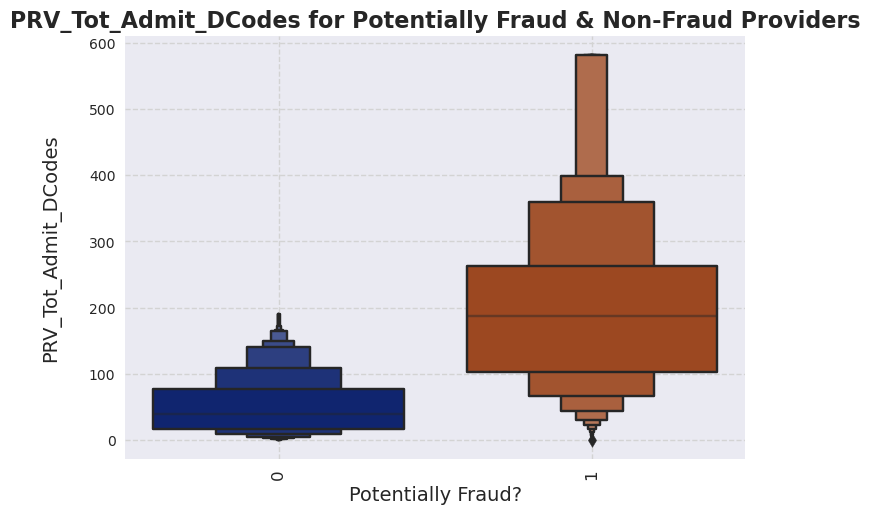

In [361]:
    with plt.style.context('seaborn'):
         fig = sns.boxenplot(data=train_iobp_df, x='PotentialFraud',y='PRV_Tot_Admit_DCodes', palette='dark')
    # Providing the labels and title to the graph
    plt.xlabel("Potentially Fraud?", fontdict=label_font_dict)
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("PRV_Tot_Admit_DCodes\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("PRV_Tot_Admit_DCodes for Potentially Fraud & Non-Fraud Providers", fontdict=title_font_dict)
    plt.plot();

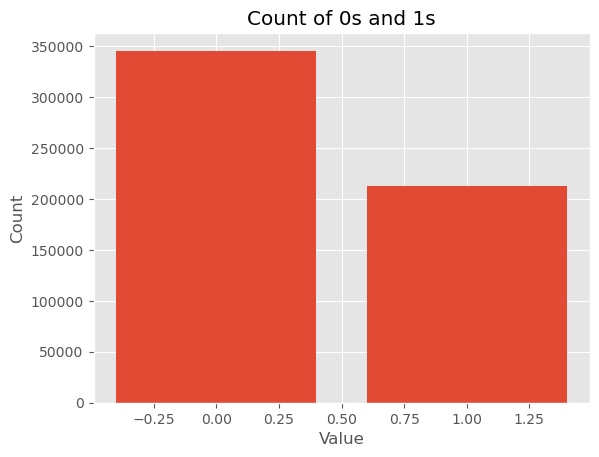

In [359]:
# Calculate value counts
value_counts = df['PotentialFraud'].value_counts()

# Create bar chart
plt.bar(value_counts.index, value_counts)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Count of 0s and 1s')

# Display the plot
plt.show()





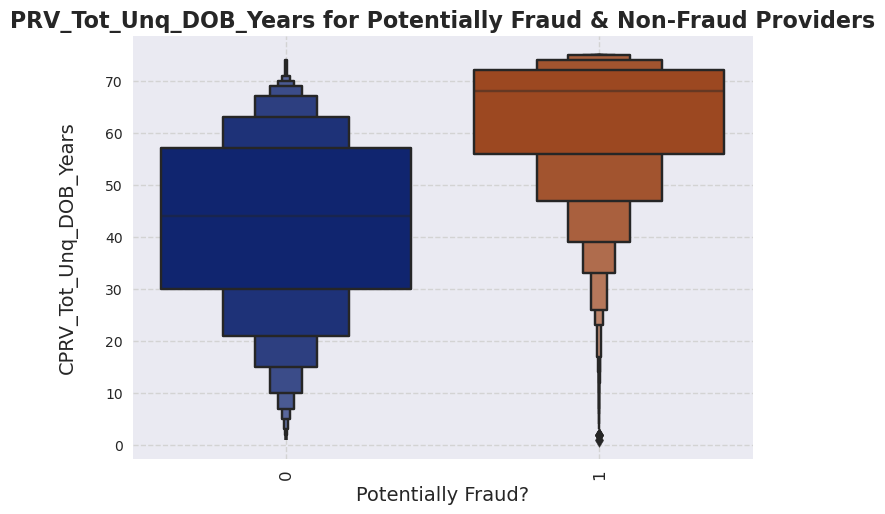

In [348]:
    with plt.style.context('seaborn'):
         fig = sns.boxenplot(data=train_iobp_df, x='PotentialFraud',y='PRV_Tot_Unq_DOB_Years', palette='dark')
    # Providing the labels and title to the graph
    plt.xlabel("Potentially Fraud?", fontdict=label_font_dict)
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("CPRV_Tot_Unq_DOB_Years\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("PRV_Tot_Unq_DOB_Years for Potentially Fraud & Non-Fraud Providers", fontdict=title_font_dict)
    plt.plot();

# data segeragation

In [177]:
X = train_iobp_df.drop(axis=1, columns=['Provider','PotentialFraud'])
y = train_iobp_df['PotentialFraud']

Train Test Split :: Creating TRAIN and VALIDATION sets.¶

In [178]:
from sklearn.model_selection import train_test_split as tts

In [179]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, stratify=y, random_state=39)

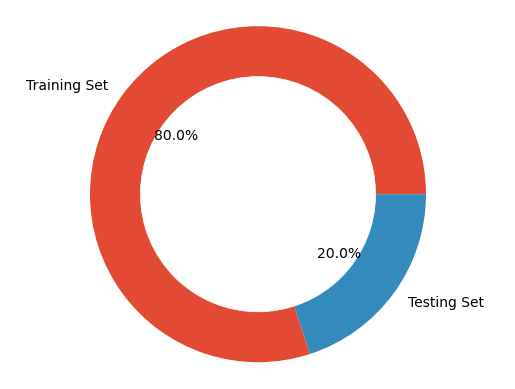

In [183]:


import matplotlib.pyplot as plt

# Example data
training_set_size = 800
testing_set_size = 200

# Data labels
labels = ['Training Set', 'Testing Set']

# Data sizes
sizes = [training_set_size, testing_set_size]

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

# Draw a white circle at the center to create a ring effect
centre_circle = plt.Circle((0, 0), 0.7, color='white')
ax.add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Display the plot
plt.show()

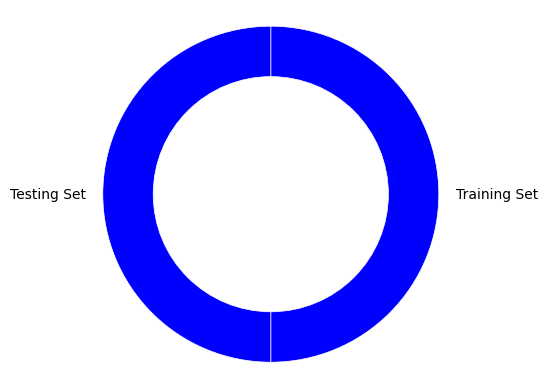

In [185]:
import matplotlib.pyplot as plt

# Example data
training_set_size = 800
testing_set_size = 200

# Data labeTota', 'Testing Set']

# Data sizes
sizes = [1, 1]  # Equal-sized sections

# Set a single color for all sections
colors = ['blue']

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, startangle=90, counterclock=False, wedgeprops={'edgecolor': 'white'})

# Draw a white circle at the center to create a ring effect
centre_circle = plt.Circle((0, 0), 0.7, color='white')
ax.add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Display the plot
plt.show()



In [180]:
# Checking shape of each set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4328, 299), (1082, 299), (4328,), (1082,))

In [635]:
y_train.value_counts()

0    3923
1     405
Name: PotentialFraud, dtype: int64

In [636]:
y_test.value_counts()

0    981
1    101
Name: PotentialFraud, dtype: int64

In [637]:
from sklearn.preprocessing import RobustScaler

In [638]:
# Standardize the data (train and test)
robust_scaler = RobustScaler()
robust_scaler.fit(X_train)
X_train_std = robust_scaler.transform(X_train)
X_test_std = robust_scaler.transform(X_test)

# modeling-set1


## baseline model training using Class Weighting Scheme-1. Logistic Regression

In [639]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV

In [640]:
# Training the model with all features and hyper-parameterized values
log_reg_1 = LogisticRegression(C=0.0316228, penalty='l1',
                               fit_intercept=True, solver='liblinear', tol=0.0001, max_iter=500, 
                               class_weight='balanced',
                               verbose=0, 
                               intercept_scaling=1.0,
                               multi_class='auto',
                               random_state=49)

log_reg_1.fit(X_train_std, y_train)

LogisticRegression(C=0.0316228, class_weight='balanced', intercept_scaling=1.0,
                   max_iter=500, penalty='l1', random_state=49,
                   solver='liblinear')

In [641]:
def pred_prob(clf, data): 
    """
    Description :: This function is created for storing the predicted probabability using the trained model.
    
    Input :: It accepts below input parameters :
      - clf : Trained model classifier
      - data : Dataset for which we want to generate the predictions
    """
    y_pred = clf.predict_proba(data)[:,1]
    return y_pred

def draw_roc(train_fpr, train_tpr, test_fpr, test_tpr):
    """
    Description :: This function is created for calculating the AUC score on train and test data. And, plotting the ROC curve.
    
    Input :: It accepts below input parameters :
      - train_fpr : Train False +ve rate
      - train_tpr : Train True +ve rate
      - test_fpr : Test False +ve rate
      - test_tpr : Test True +ve rate
    """
    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)
    with plt.style.context('seaborn-poster'):
      plt.plot(train_fpr, train_tpr, label="Train AUC ="+"{:.4f}".format(train_auc), color='blue')
      plt.plot(test_fpr, test_tpr, label="Test AUC ="+"{:.4f}".format(test_auc), color='red')
      plt.legend()
      plt.xlabel("False Positive Rate(FPR)", fontdict=label_font_dict)
      plt.ylabel("True Positive Rate(TPR)", fontdict=label_font_dict)
      plt.title("Area Under Curve", fontdict=title_font_dict)
      plt.grid(b=True, which='major', color='lightgrey', linestyle='--')
      plt.minorticks_on()
      plt.show()
    
def find_best_threshold(threshold, fpr, tpr):
    """
    Description :: This function is created for finding the best threshold value.
    """
    t = threshold[np.argmax(tpr * (1-fpr))]
    return t

def predict_with_best_t(proba, threshold):
    """
    Description :: This function is created for generating the predictions based on the best threshold value.
    """
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

def draw_confusion_matrix(best_t, x_train, x_test, y_train, y_test, y_train_pred, y_test_pred):
    """
    Description :: This function is created for plotting the confusion matrix of TRAIN and TEST sets.
    """
    fig, ax = plt.subplots(1,2, figsize=(20,6))

    train_prediction = predict_with_best_t(y_train_pred, best_t)
    cm = confusion_matrix(y_train, train_prediction)
    with plt.style.context('seaborn'):
        sns.heatmap(cm, annot=True, fmt='d', ax=ax[0], cmap='viridis')
        ax[0].set_title('Train Dataset Confusion Matrix', fontdict=title_font_dict)
        ax[0].set_xlabel("Predicted Label", fontdict=label_font_dict)
        ax[0].set_ylabel("Actual Label", fontdict=label_font_dict)

    test_prediction = predict_with_best_t(y_test_pred, best_t)
    cm = confusion_matrix(y_test, test_prediction)
    with plt.style.context('seaborn'):
        sns.heatmap(cm, annot=True, fmt='d', ax=ax[1], cmap='summer')
        ax[1].set_title('Test Dataset Confusion Matrix', fontdict=title_font_dict)
        ax[1].set_xlabel("Predicted Label", fontdict=label_font_dict)
        ax[1].set_ylabel("Actual Label", fontdict=label_font_dict)
    
    plt.show()
    
    return train_prediction, test_prediction

### Train AUC = 0.9460893810796097
### Test AUC = 0.953199907146678


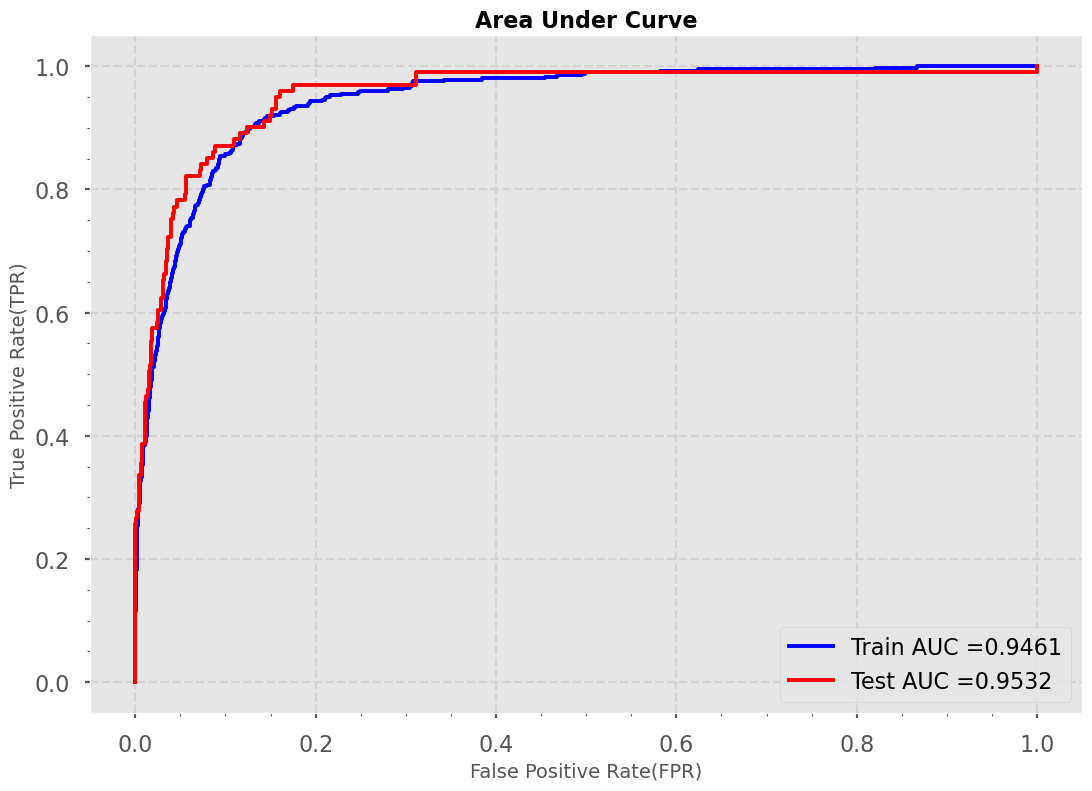

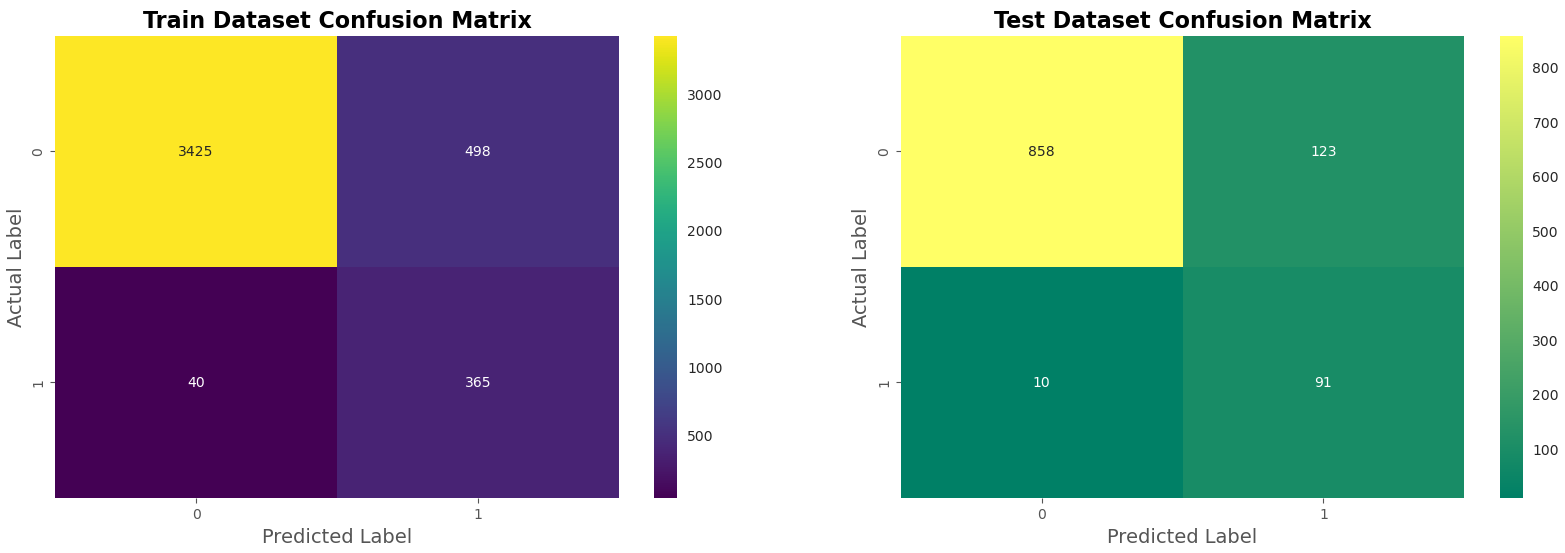



### Best Threshold = 0.3884
### Model AUC is : 0.9532
### Model Train F1 Score is : 0.5757
### Model Test F1 Score is : 0.5778


In [642]:
def validate_model(clf, x_train, x_test, y_train, y_test):
    """
    Description :: This function is created for performing the evaluation of the trained model.
    """
    # predict the probability of train data
    y_train_pred = pred_prob(clf, x_train)
    
    # predict the probability of test data
    y_test_pred = pred_prob(clf, x_test)
    
    # calculate tpr, fpr using roc_curve
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
    
    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    print("### Train AUC = {}".format(train_auc))
    test_auc = auc(test_fpr, test_tpr)
    print("### Test AUC = {}".format(test_auc))
    
    # plotting the ROC curve
    draw_roc(train_fpr, train_tpr, test_fpr, test_tpr)
    
    # Best threshold value
    best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
    
    # Plotting the confusion matrices
    train_prediction, test_prediction = draw_confusion_matrix(best_t, x_train, x_test, y_train, y_test, y_train_pred, y_test_pred)
    
    # Generating the F1-scores
    train_f1_score = f1_score(y_train, train_prediction)
    test_f1_score = f1_score(y_test, test_prediction)
    
    return test_auc, train_f1_score, test_f1_score, best_t
# Validate Logistic Regression model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(log_reg_1, X_train_std, X_test_std, y_train, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))


### Train AUC = 0.9460893810796097
### Test AUC = 0.953199907146678


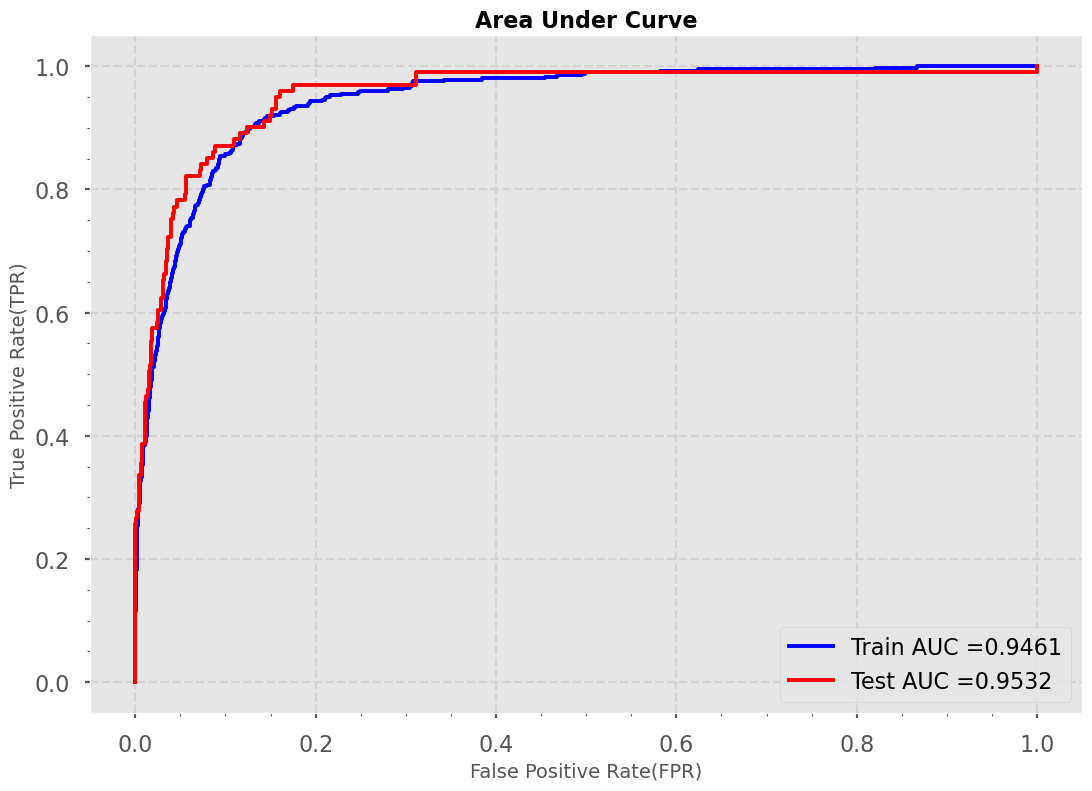

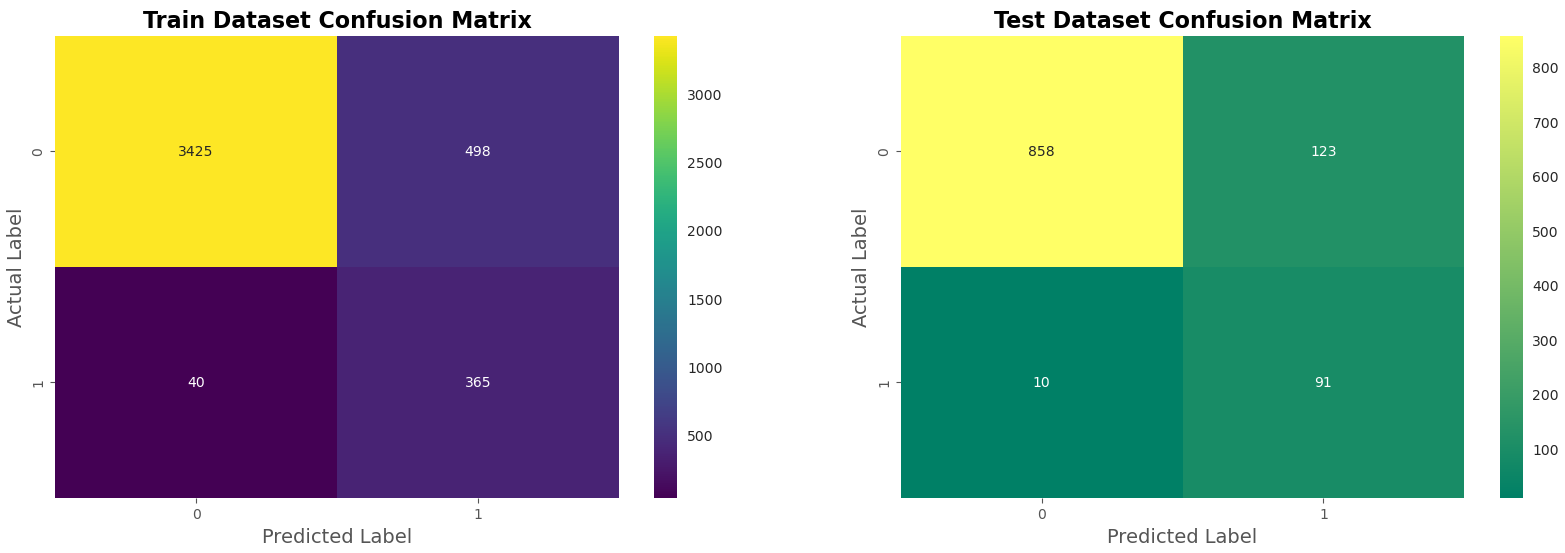



### Best Threshold = 0.3884
### Model AUC is : 0.9532
### Model Train F1 Score is : 0.5757
### Model Test F1 Score is : 0.5778
### Model Train Recall is : 0.9012
### Model Test Recall is : 0.9010
### Model Train Precision is : 0.4229
### Model Test Precision is : 0.4252
### Model Train Loss is : 0.3461
### Model Test Loss is : 0.3842


In [650]:
from sklearn.metrics import recall_score, log_loss, precision_score

def validate_model_1(clf, x_train, x_test, y_train, y_test):
    """
    Description :: This function is created for performing the evaluation of the trained model.
    """
    # predict the probability of train data
    y_train_pred = pred_prob(clf, x_train)
    
    # predict the probability of test data
    y_test_pred = pred_prob(clf, x_test)
    
    # calculate tpr, fpr using roc_curve
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
    
    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    print("### Train AUC = {}".format(train_auc))
    test_auc = auc(test_fpr, test_tpr)
    print("### Test AUC = {}".format(test_auc))
    
    # plotting the ROC curve
    draw_roc(train_fpr, train_tpr, test_fpr, test_tpr)
    
    # Best threshold value
    best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
    
    # Plotting the confusion matrices
    train_prediction, test_prediction = draw_confusion_matrix(best_t, x_train, x_test, y_train, y_test, y_train_pred, y_test_pred)
    
    # Generating the F1-scores
    train_f1_score = f1_score(y_train, train_prediction)
    test_f1_score = f1_score(y_test, test_prediction)
    
    # Calculating recall
    train_recall = recall_score(y_train, train_prediction)
    test_recall = recall_score(y_test, test_prediction)
    
    # Calculating precision
    train_precision = precision_score(y_train, train_prediction)
    test_precision = precision_score(y_test, test_prediction)
    
    # Calculating loss function
    train_loss = log_loss(y_train, y_train_pred)
    test_loss = log_loss(y_test, y_test_pred)
    
    return test_auc, train_f1_score, test_f1_score, train_recall, test_recall, train_precision, test_precision, train_loss, test_loss, best_t


# Validate Logistic Regression model
test_auc, train_f1_score, test_f1_score, train_recall, test_recall, train_precision, test_precision, train_loss, test_loss, best_t = validate_model_1(log_reg_1, X_train_std, X_test_std, y_train, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))
print("### Model Train Recall is : {:.4f}".format(train_recall))
print("### Model Test Recall is : {:.4f}".format(test_recall))
print("### Model Train Precision is : {:.4f}".format(train_precision))
print("### Model Test Precision is : {:.4f}".format(test_precision))
print("### Model Train Loss is : {:.4f}".format(train_loss))
print("### Model Test Loss is : {:.4f}".format(test_loss))






In [508]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': log_reg_1.coef_[0]})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head(10)

Features  Importance_Model_1
0   InscClaimAmtReimbursed            1.055361
1        PRV_Tot_DGrpCodes           -0.033989
2    PRV_Tot_Unq_DOB_Years           -0.359950
3         PRV_Bene_Age_Sum            0.065487
4            PRV_CoPayment            0.043753
5  PRV_IP_Annual_ReImb_Amt           -0.005250
6  PRV_OP_Annual_ReImb_Amt           -0.011574
7    PRV_OP_Annual_Ded_Amt           -0.010100
8       PRV_Admit_Duration           -0.009215
9       PRV_Claim_Duration           -0.009949

In [509]:
top_15_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:15]
top_15_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:15]

In [510]:
top_15_neg_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=True)['Features'].iloc[0:15]
top_15_neg_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=True)['Importance_Model_1'].iloc[0:15]

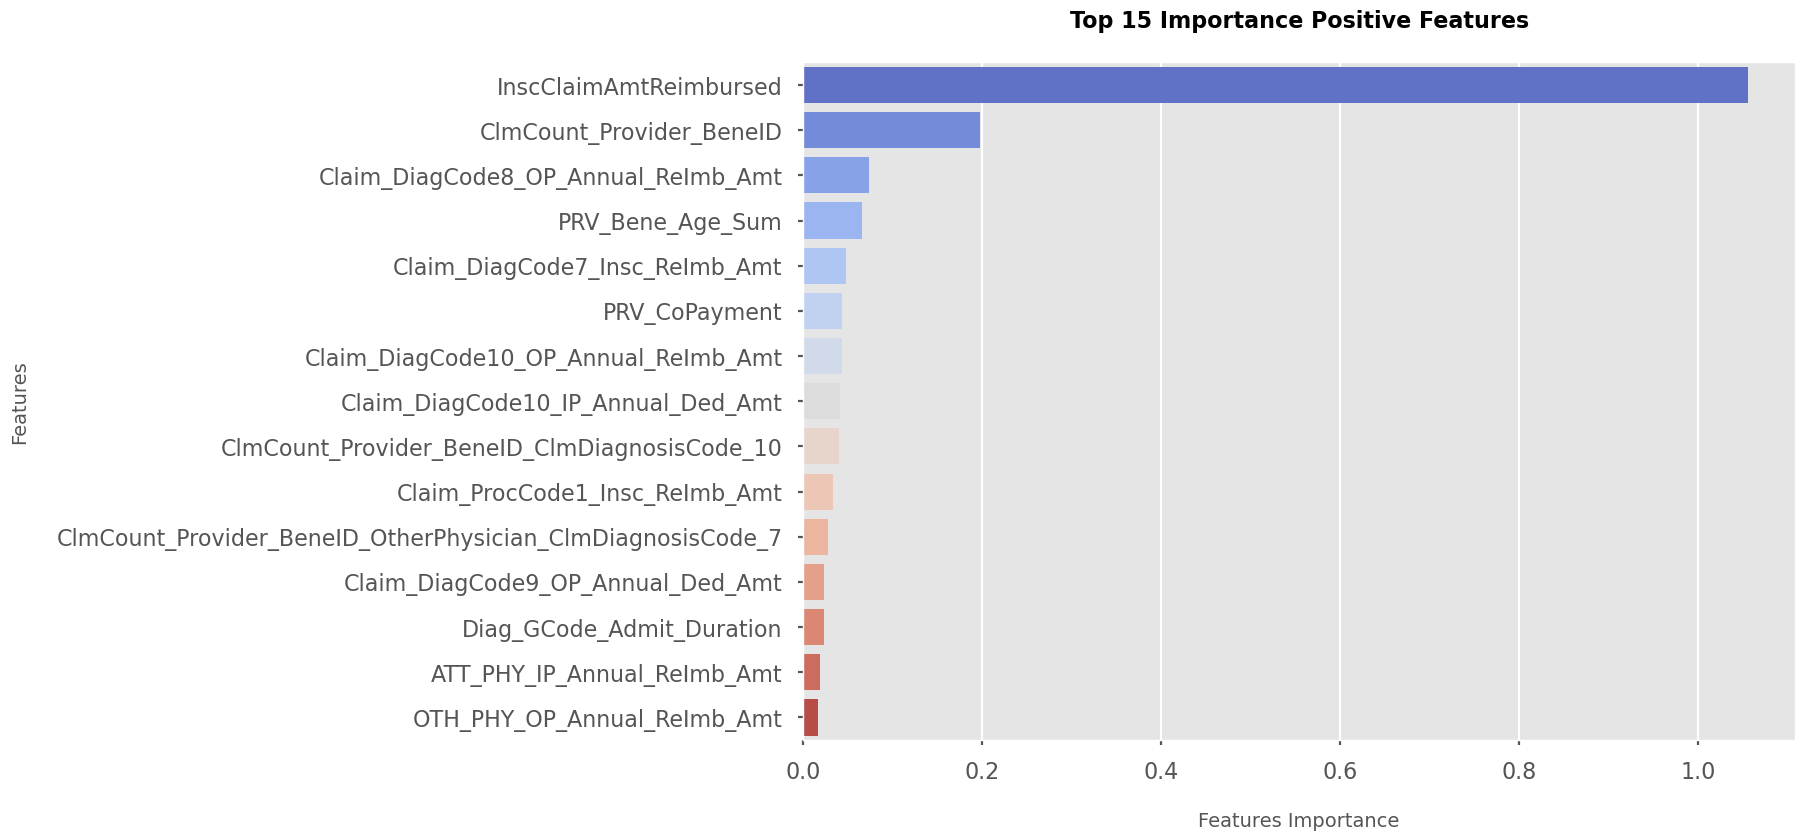

In [511]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_15_pos_feats, x=top_15_pos_feats_scores, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance", fontdict=label_font_dict)
    plt.ylabel("Features\n", fontdict=label_font_dict)
    plt.title("Top 15 Importance Positive Features\n", fontdict=title_font_dict)

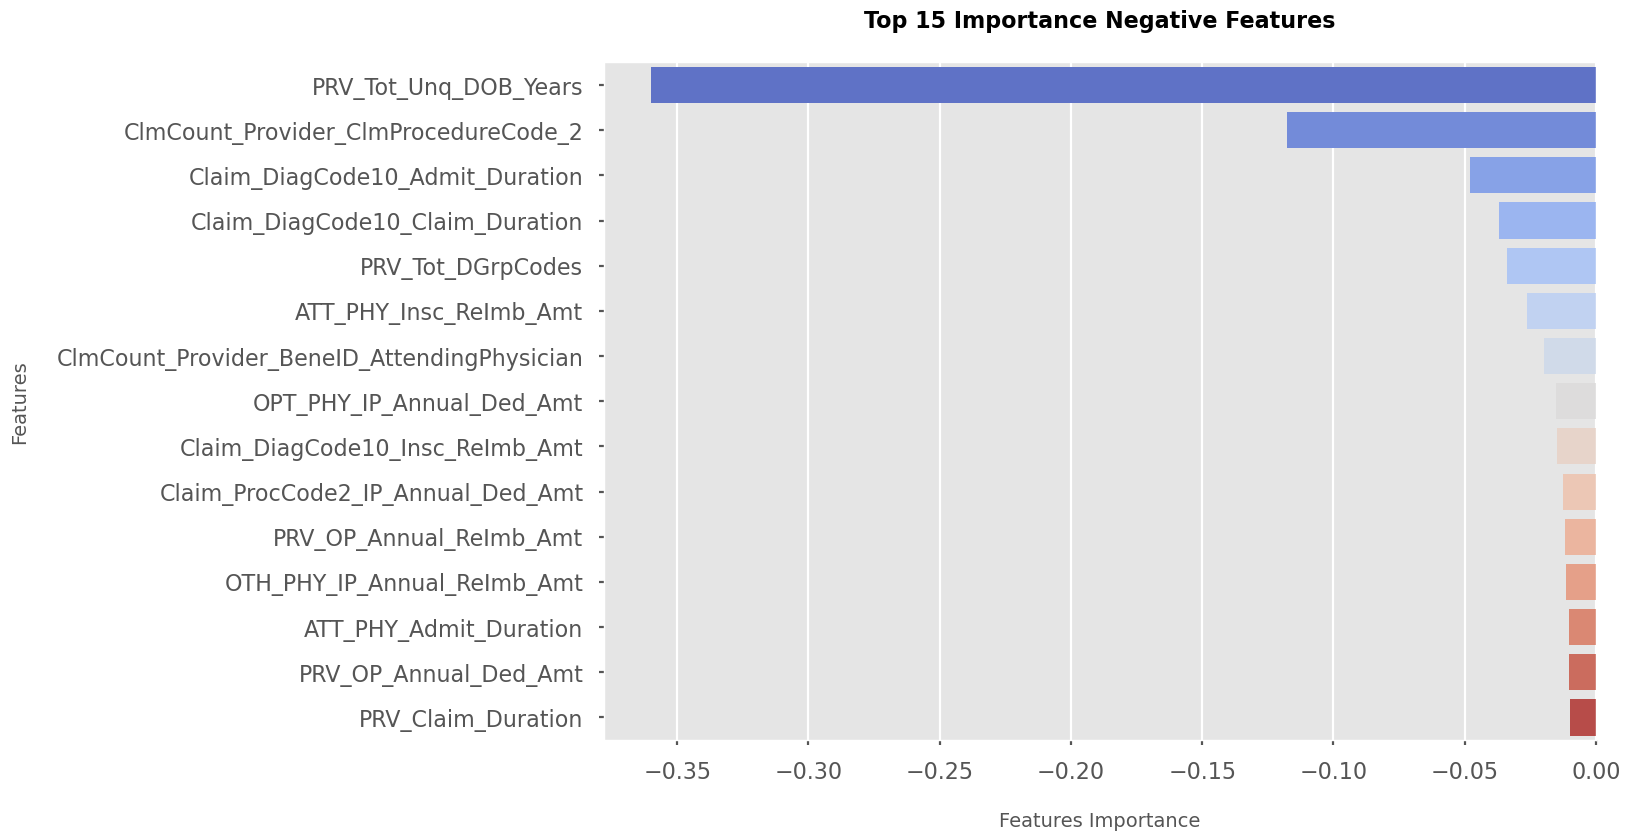

In [512]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_15_neg_feats, x=top_15_neg_feats_scores, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance", fontdict=label_font_dict)
    plt.ylabel("Features\n", fontdict=label_font_dict)
    plt.title("Top 15 Importance Negative Features\n", fontdict=title_font_dict)

##  decision tree 

In [651]:
from sklearn.tree import DecisionTreeClassifier

In [652]:
# Training the model with all features and hyper-parameterized values
dec_tree_2 = DecisionTreeClassifier(criterion='gini',
                                   max_depth= 6,
                                   max_features='log2',
                                   min_samples_leaf=150,
                                   min_samples_split=150,
                                   class_weight='balanced',
                                   random_state=49,
                                   splitter='best',
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   ccp_alpha=0.0,)

dec_tree_2.fit(X_train_std, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       max_features='log2', min_samples_leaf=150,
                       min_samples_split=150, random_state=49)

### Train AUC = 0.9264357398438459
### Test AUC = 0.926484391558422


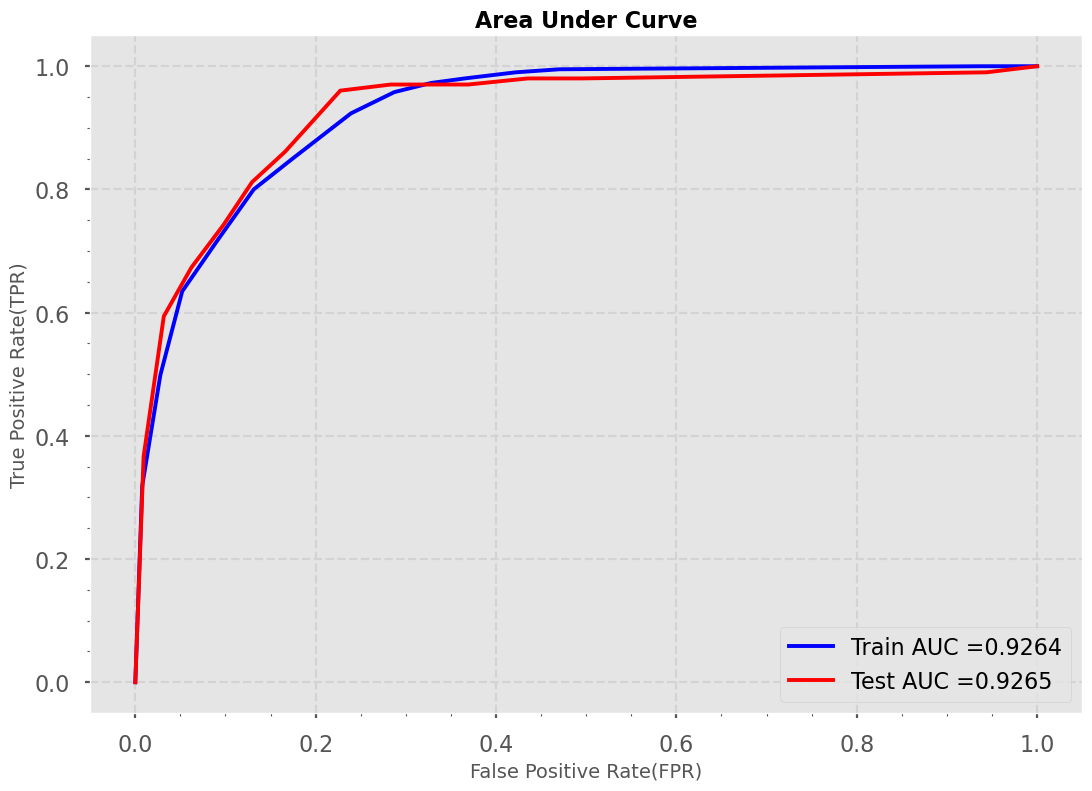

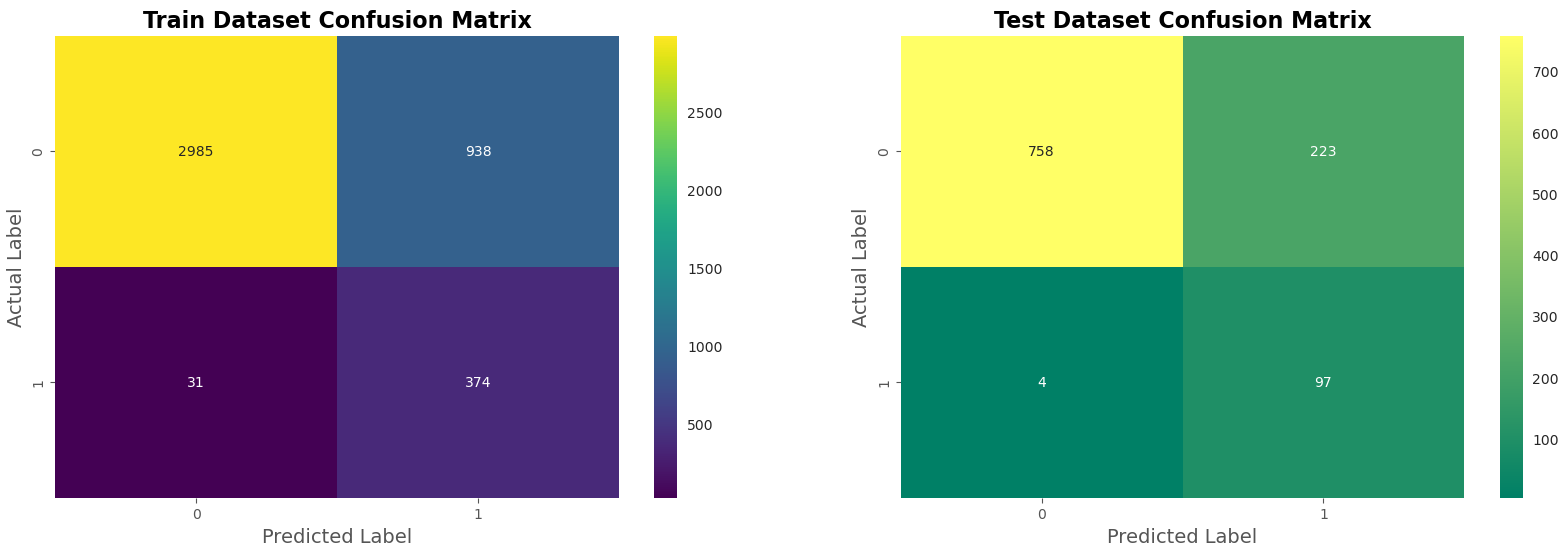



### Best Threshold = 0.5316
### Model AUC is : 0.9265
### Model Train F1 Score is : 0.4356
### Model Test F1 Score is : 0.4608


In [654]:
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(dec_tree_2, X_train_std, X_test_std, y_train, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))




### Train AUC = 0.9264357398438459
### Test AUC = 0.926484391558422


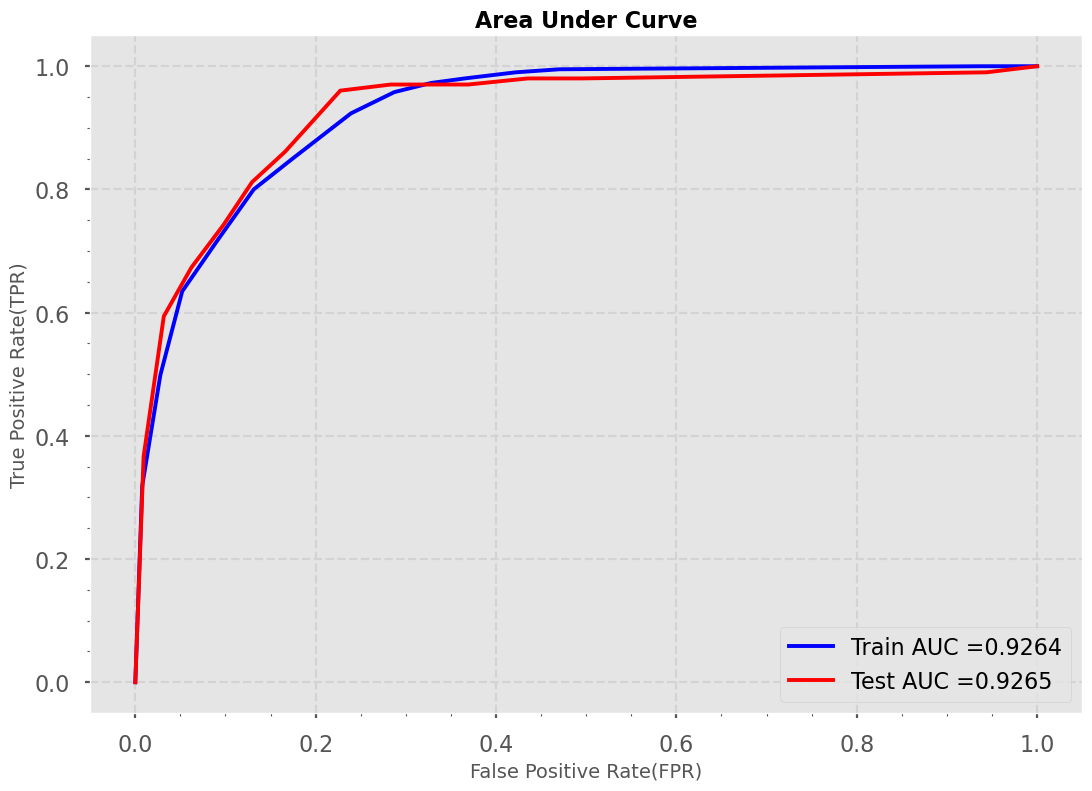

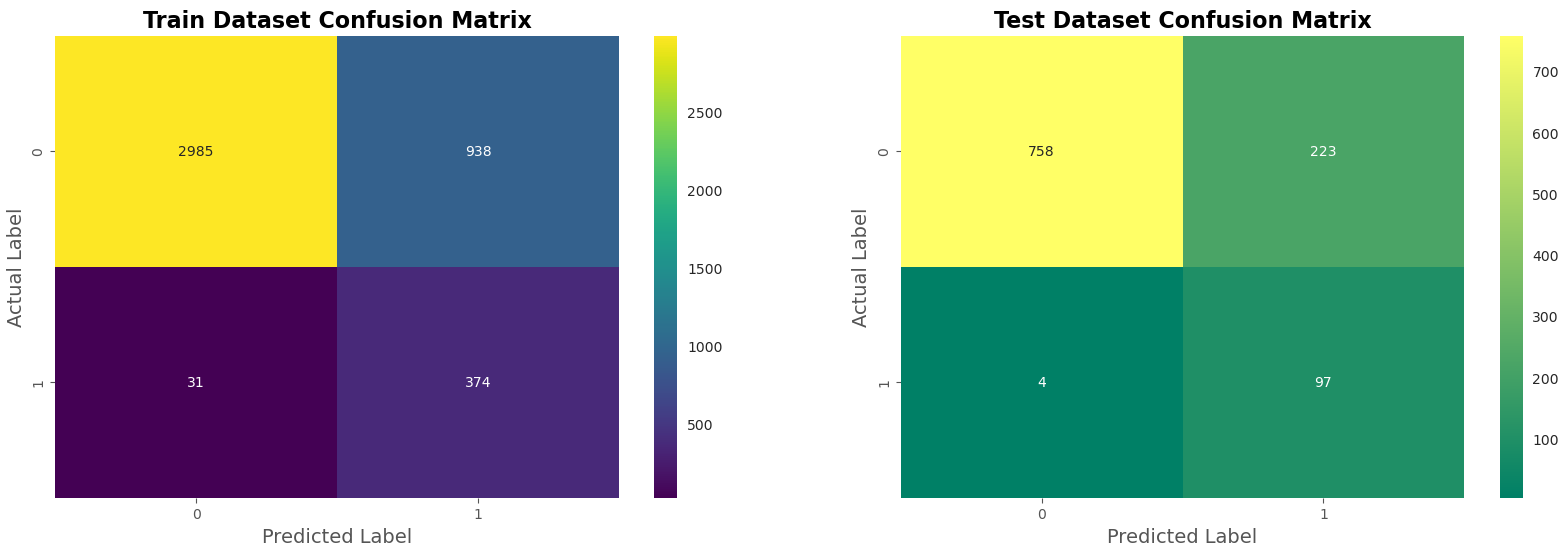



### Best Threshold = 0.5316
### Model AUC is : 0.9265
### Model Train F1 Score is : 0.4356
### Model Test F1 Score is : 0.4608
### Model Train Recall is : 0.9235
### Model Test Recall is : 0.9604
### Model Train Precision is : 0.2851
### Model Test Precision is : 0.3031
### Model Train Loss is : 0.3519
### Model Test Loss is : 0.3896


In [656]:
# Validate model
test_auc, train_f1_score, test_f1_score, train_recall, test_recall, train_precision, test_precision, train_loss, test_loss, best_t = validate_model_1(dec_tree_2, X_train_std, X_test_std, y_train, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))
print("### Model Train Recall is : {:.4f}".format(train_recall))
print("### Model Test Recall is : {:.4f}".format(test_recall))
print("### Model Train Precision is : {:.4f}".format(train_precision))
print("### Model Test Precision is : {:.4f}".format(test_precision))
print("### Model Train Loss is : {:.4f}".format(train_loss))
print("### Model Test Loss is : {:.4f}".format(test_loss))




In [516]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': dec_tree_2.feature_importances_})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

Features  Importance_Model_1
0                          DeductibleAmtPaid            0.040610
1                  OPT_PHY_OP_Annual_Ded_Amt            0.002646
2                     OTH_PHY_Claim_Duration            0.000785
3  Claim_Admit_Diag_Code_IP_Annual_ReImb_Amt            0.701279
4    Claim_Admit_Diag_Code_IP_Annual_Ded_Amt            0.002468

In [517]:
top_15_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:15]
top_15_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:15]

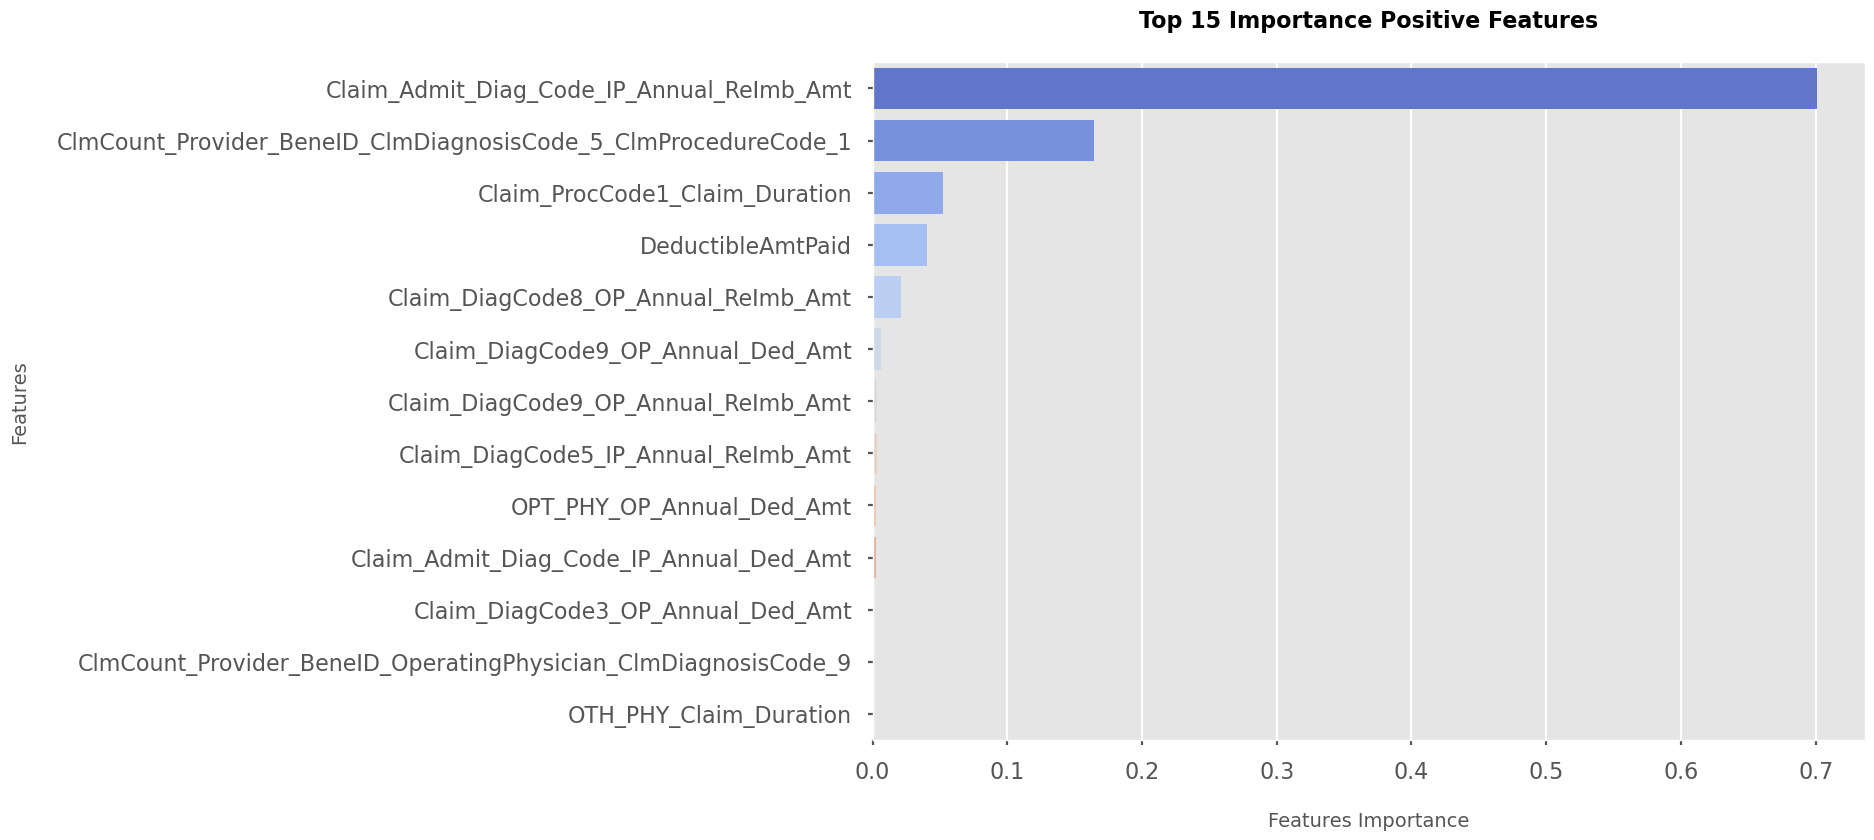

In [518]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_15_pos_feats, x=top_15_pos_feats_scores, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance", fontdict=label_font_dict)
    plt.ylabel("Features\n", fontdict=label_font_dict)
    plt.title("Top 15 Importance Positive Features\n", fontdict=title_font_dict)

## random forest

In [519]:
from sklearn.ensemble import RandomForestClassifier

In [520]:
# Training the model with all features and hyper-parameterized values
rfc_3 = RandomForestClassifier(n_estimators=30,criterion='gini',
                                   max_depth= 4,
                                   max_features='auto',
                                   min_samples_leaf=50,
                                   min_samples_split=50,
                                   class_weight='balanced',
                                   random_state=49,
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   ccp_alpha=0.0,)

rfc_3.fit(X_train_std, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=50, min_samples_split=50,
                       n_estimators=30, random_state=49)

### Train AUC = 0.9455103331728364
### Test AUC = 0.9517213189208829


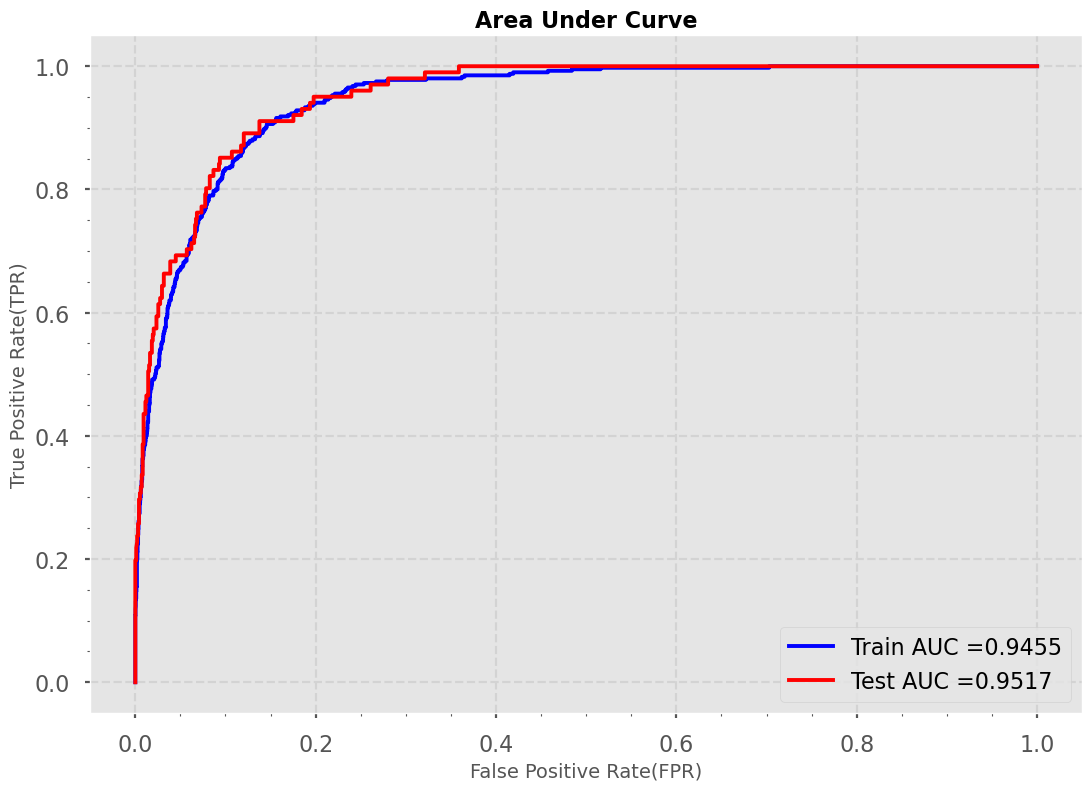

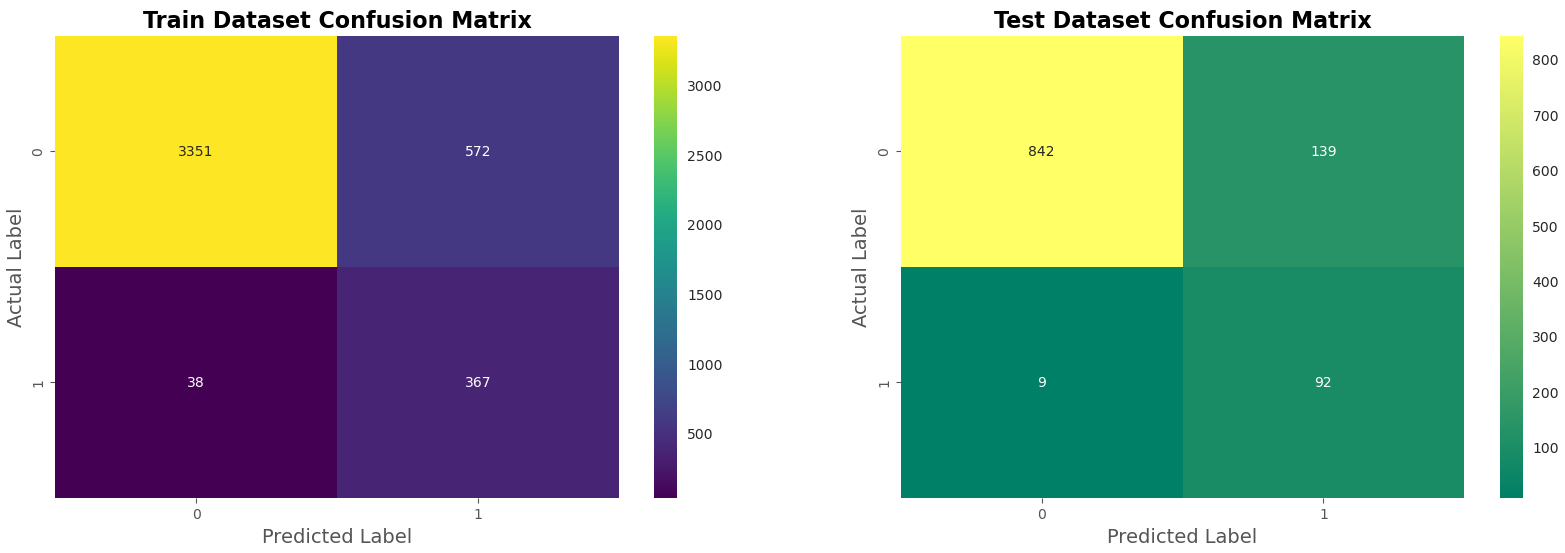



### Best Threshold = 0.5078
### Model AUC is : 0.9517
### Model Train F1 Score is : 0.5461
### Model Test F1 Score is : 0.5542


In [521]:
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(rfc_3, X_train_std, X_test_std, y_train, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

### Train AUC = 0.9455103331728364
### Test AUC = 0.9517213189208829


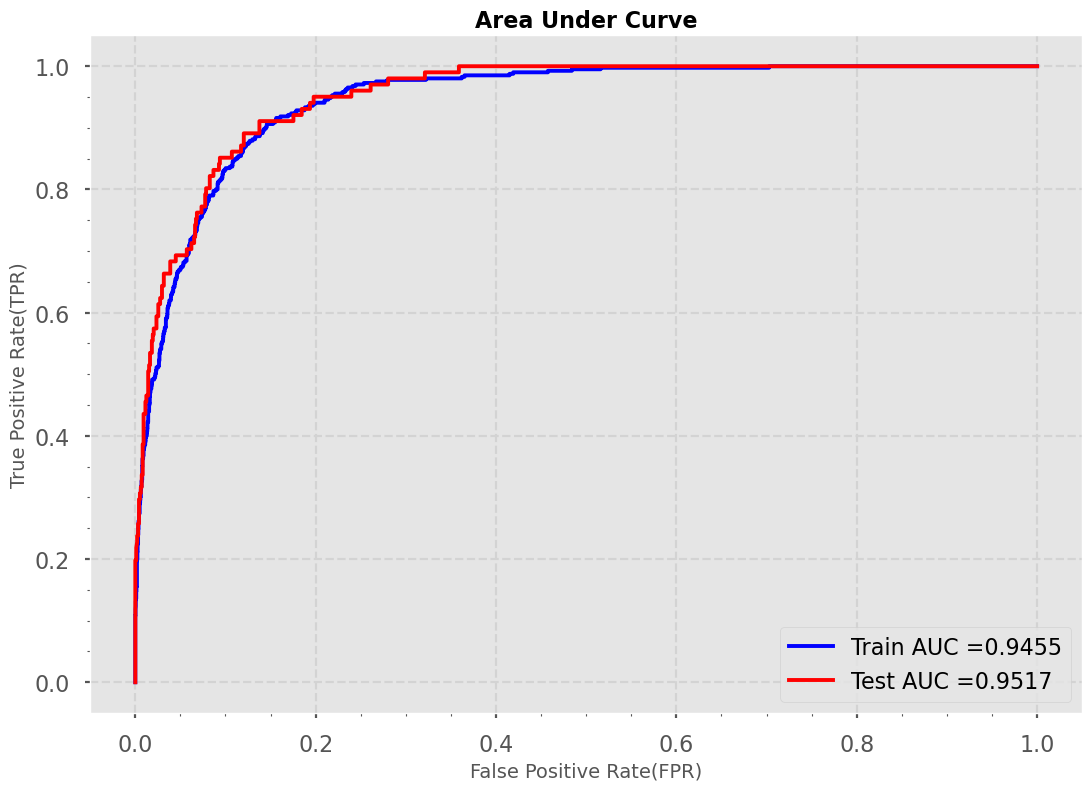

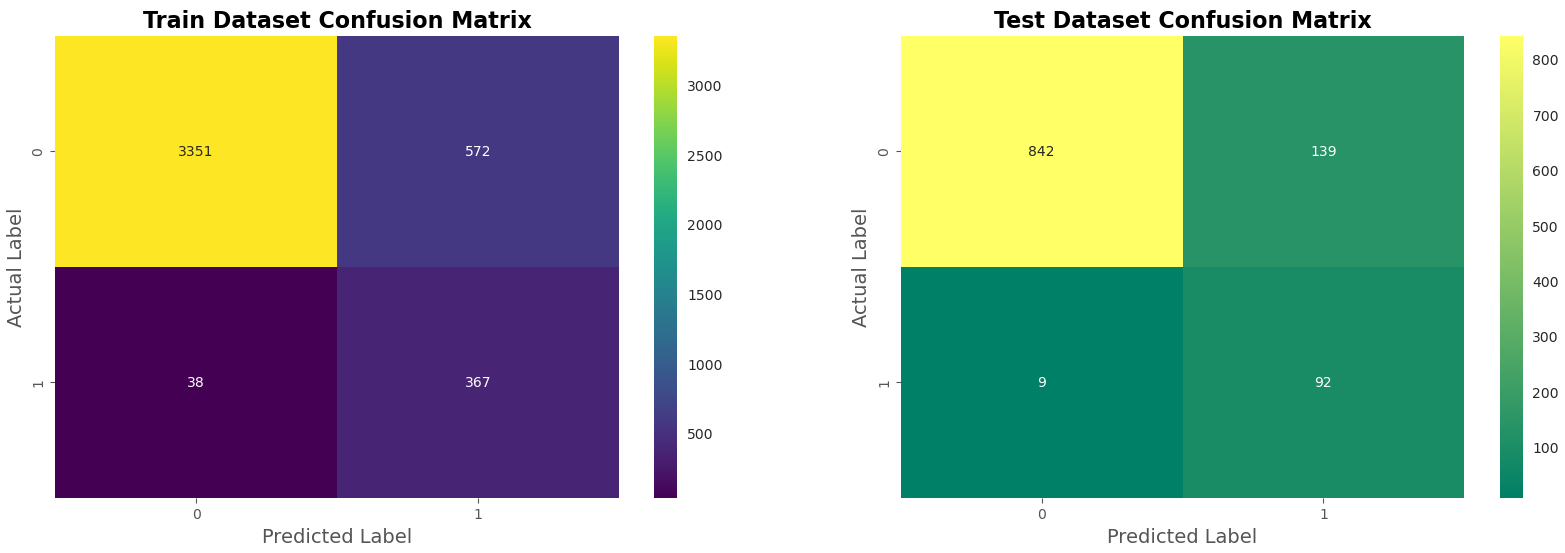



### Best Threshold = 0.5078
### Model AUC is : 0.9517
### Model Train F1 Score is : 0.5461
### Model Test F1 Score is : 0.5542
### Model Train Recall is : 0.9062
### Model Test Recall is : 0.9109
### Model Train Precision is : 0.3908
### Model Test Precision is : 0.3983
### Model Train Loss is : 0.2977
### Model Test Loss is : 0.3019


In [657]:
# Validate model
test_auc, train_f1_score, test_f1_score, train_recall, test_recall, train_precision, test_precision, train_loss, test_loss, best_t = validate_model_1(rfc_3, X_train_std, X_test_std, y_train, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))
print("### Model Train Recall is : {:.4f}".format(train_recall))
print("### Model Test Recall is : {:.4f}".format(test_recall))
print("### Model Train Precision is : {:.4f}".format(train_precision))
print("### Model Test Precision is : {:.4f}".format(test_precision))
print("### Model Train Loss is : {:.4f}".format(train_loss))
print("### Model Test Loss is : {:.4f}".format(test_loss))




In [522]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': rfc_3.feature_importances_})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

Features  Importance_Model_1
0      InscClaimAmtReimbursed            0.013606
1           DeductibleAmtPaid            0.029357
2       RenalDiseaseIndicator            0.000326
3  ChronicCond_ObstrPulmonary            0.000937
4        ChronicCond_Diabetes            0.000268

In [523]:
top_20_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:20]
top_20_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:20]

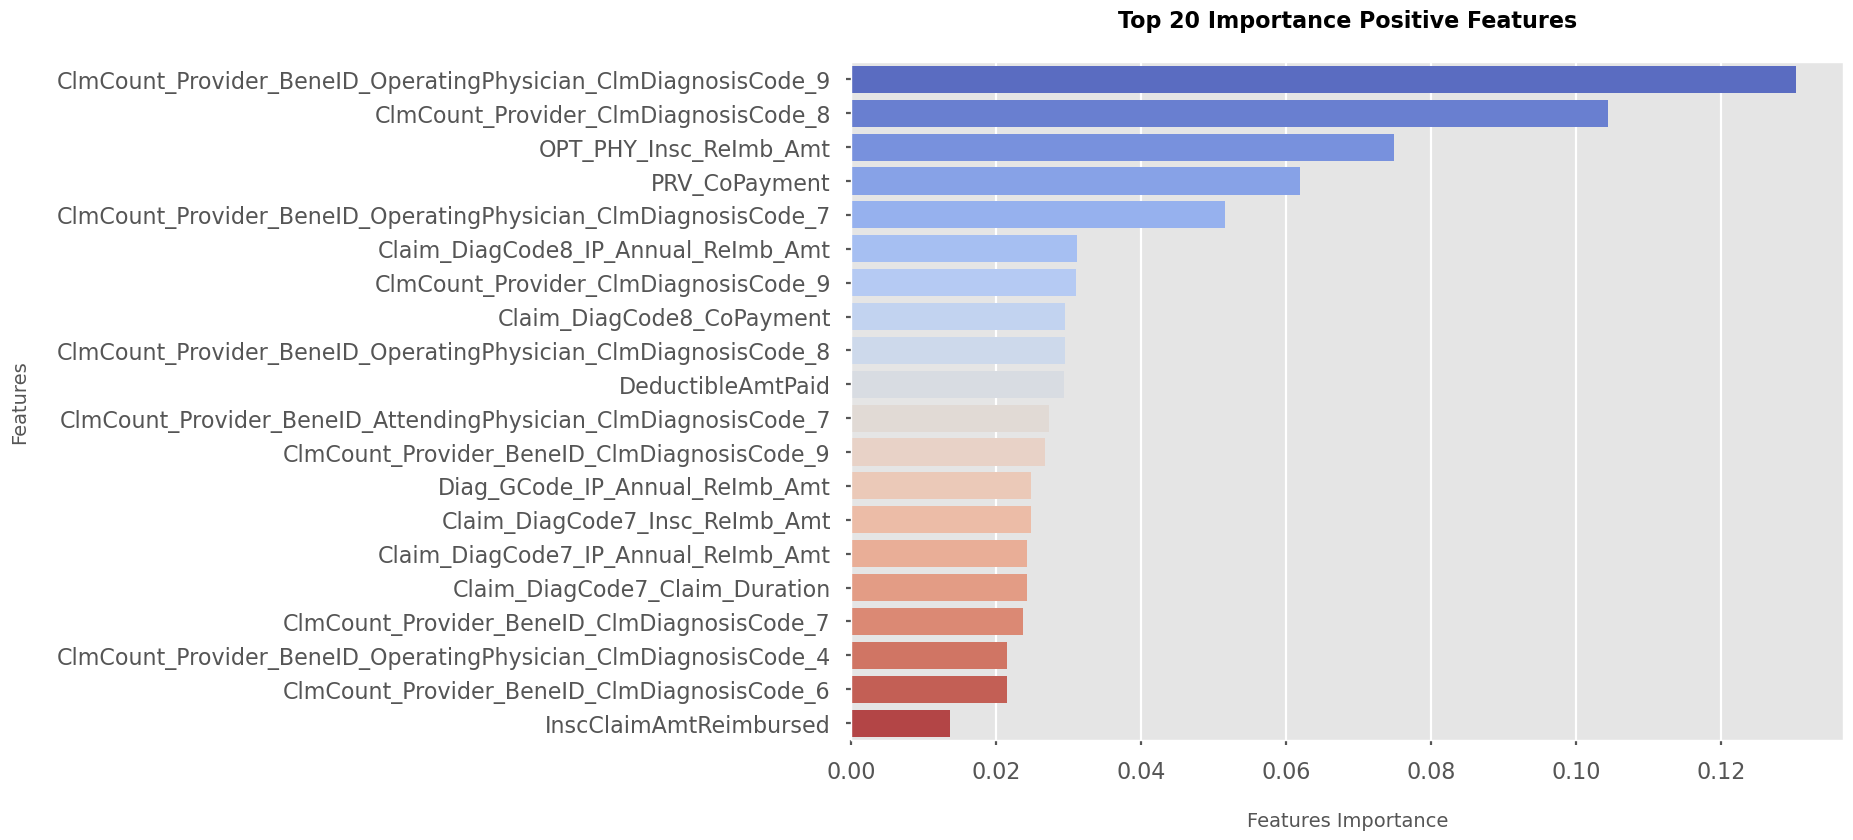

In [524]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_20_pos_feats, x=top_20_pos_feats_scores, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance", fontdict=label_font_dict)
    plt.ylabel("Features\n", fontdict=label_font_dict)
    plt.title("Top 20 Importance Positive Features\n", fontdict=title_font_dict)

# modeling-set2 

In [525]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, stratify=y, random_state=39)

In [526]:
# Standardize the data (train and test)
robust_scaler = RobustScaler()
robust_scaler.fit(X_train)
X_train_std = robust_scaler.transform(X_train)
X_test_std = robust_scaler.transform(X_test)

In [533]:
X_train.shape, y_train.shape

((4057, 299), (4057,))

In [527]:
from collections import Counter
counter = Counter(y_train)
counter

Counter({0: 3678, 1: 379})

In [528]:
fraud_percentage = (counter[1]*100 / (counter[0]+counter[1]))
non_fraud_percentage = (counter[0]*100 / (counter[0]+counter[1]))
print("Fraud Percentage = {:.2f}% and Non-Fraud Percentage = {:.2f}%".format(fraud_percentage, non_fraud_percentage))

Fraud Percentage = 9.34% and Non-Fraud Percentage = 90.66%


In [530]:
!pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 2.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 4.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [531]:
# Performing minority oversampling
from imblearn.over_sampling import ADASYN

In [532]:
oversample = ADASYN(sampling_strategy=0.35, n_neighbors=12)
X_train_ovsamp, y_train_ovsamp = oversample.fit_resample(X_train_std, y_train)

X_train_ovsamp.shape, y_train_ovsamp.shape

((4946, 299), (4946,))

In [534]:
counter = Counter(y_train_ovsamp)
counter

Counter({0: 3678, 1: 1268})

In [535]:
fraud_percentage = (counter[1]*100 / (counter[0]+counter[1]))
non_fraud_percentage = (counter[0]*100 / (counter[0]+counter[1]))
print("Fraud Percentage = {:.2f}% and Non-Fraud Percentage = {:.2f}%".format(fraud_percentage, non_fraud_percentage))

Fraud Percentage = 25.64% and Non-Fraud Percentage = 74.36%


## logistic regression 

In [536]:
# Training the model with all features and hyper-parameterized values
log_reg_4 = LogisticRegression(C=0.0316228, penalty='l1',
                               fit_intercept=True, 
                               solver='liblinear', 
                               tol=0.0001, 
                               max_iter=500, 
                               verbose=0, 
                               intercept_scaling=1.0,
                               multi_class='auto',
                               random_state=49)

log_reg_4.fit(X_train_ovsamp, y_train_ovsamp)

LogisticRegression(C=0.0316228, intercept_scaling=1.0, max_iter=500,
                   penalty='l1', random_state=49, solver='liblinear')

### Train AUC = 0.94160435567952
### Test AUC = 0.9406366006859257


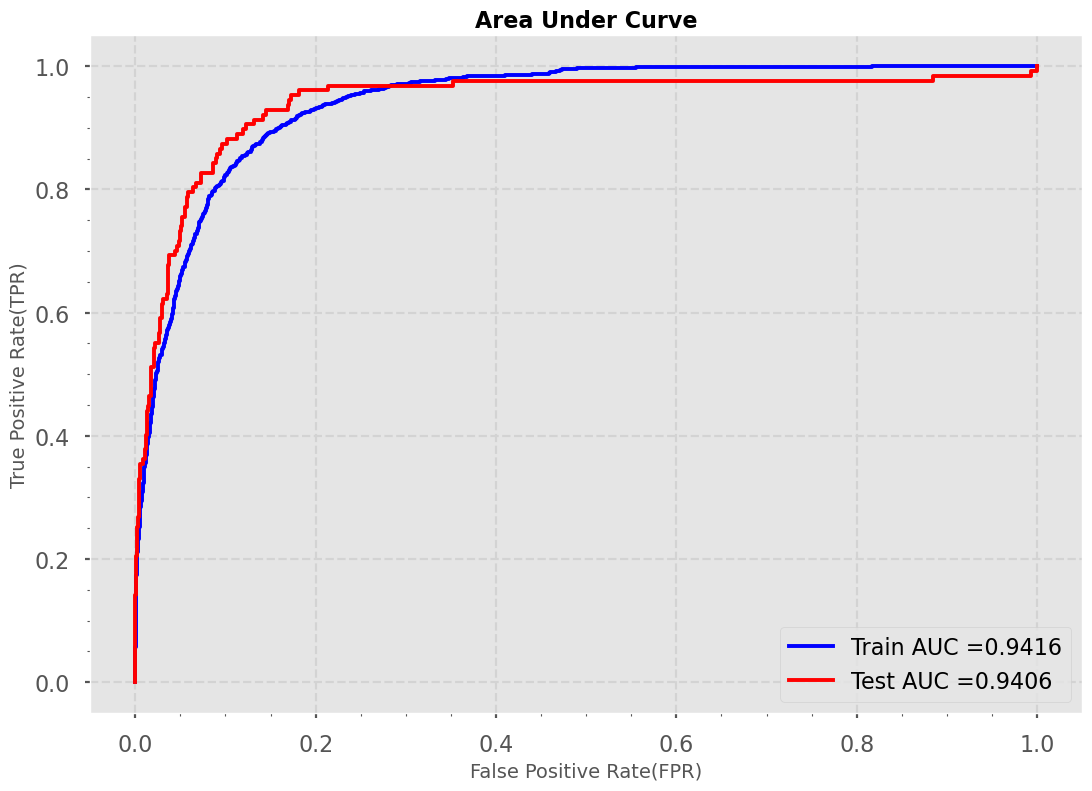

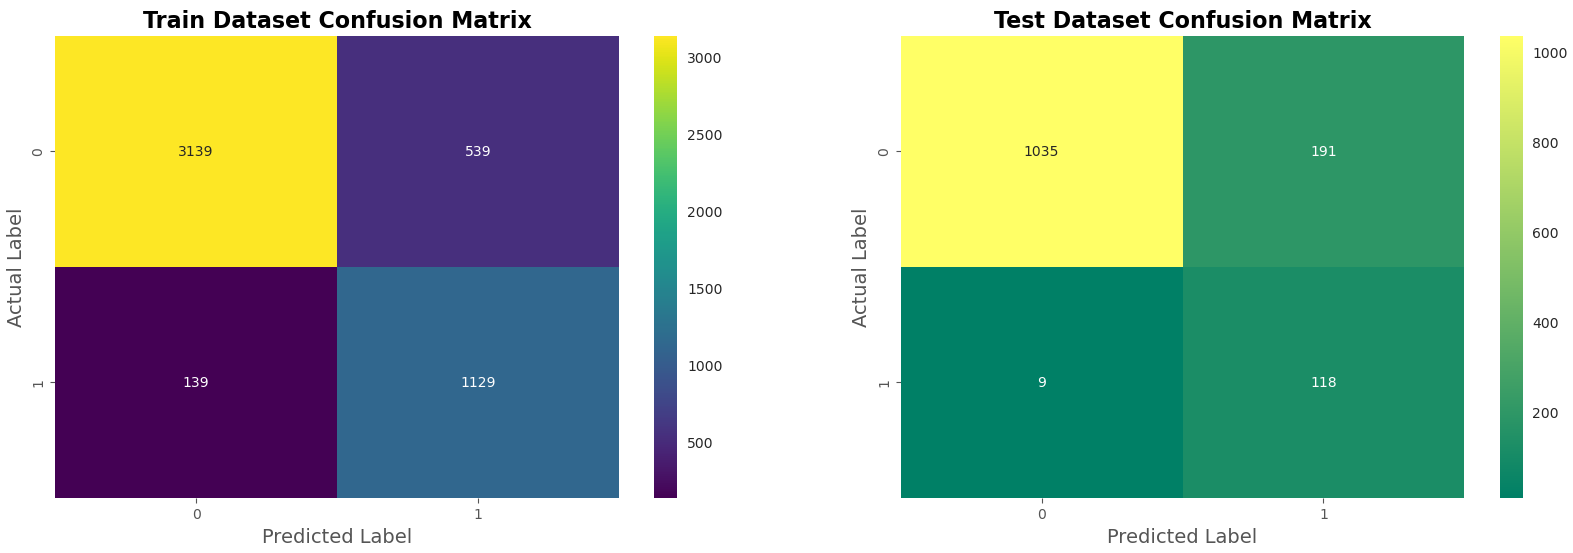



### Best Threshold = 0.1843
### Model AUC is : 0.9406
### Model Train F1 Score is : 0.7691
### Model Test F1 Score is : 0.5413


In [537]:
# Validate Logistic Regression model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(log_reg_4, X_train_ovsamp, X_test_std, y_train_ovsamp, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [538]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': log_reg_4.coef_[0]})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

Features  Importance_Model_1
0  InscClaimAmtReimbursed            1.193985
1      ChronicCond_stroke            0.042199
2       PRV_Tot_DGrpCodes           -0.003333
3   PRV_Tot_Unq_DOB_Years           -0.386031
4        PRV_Bene_Age_Sum            0.029441

In [539]:
top_15_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:15]
top_15_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:15]
top_15_neg_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=True)['Features'].iloc[0:15]
top_15_neg_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=True)['Importance_Model_1'].iloc[0:15]

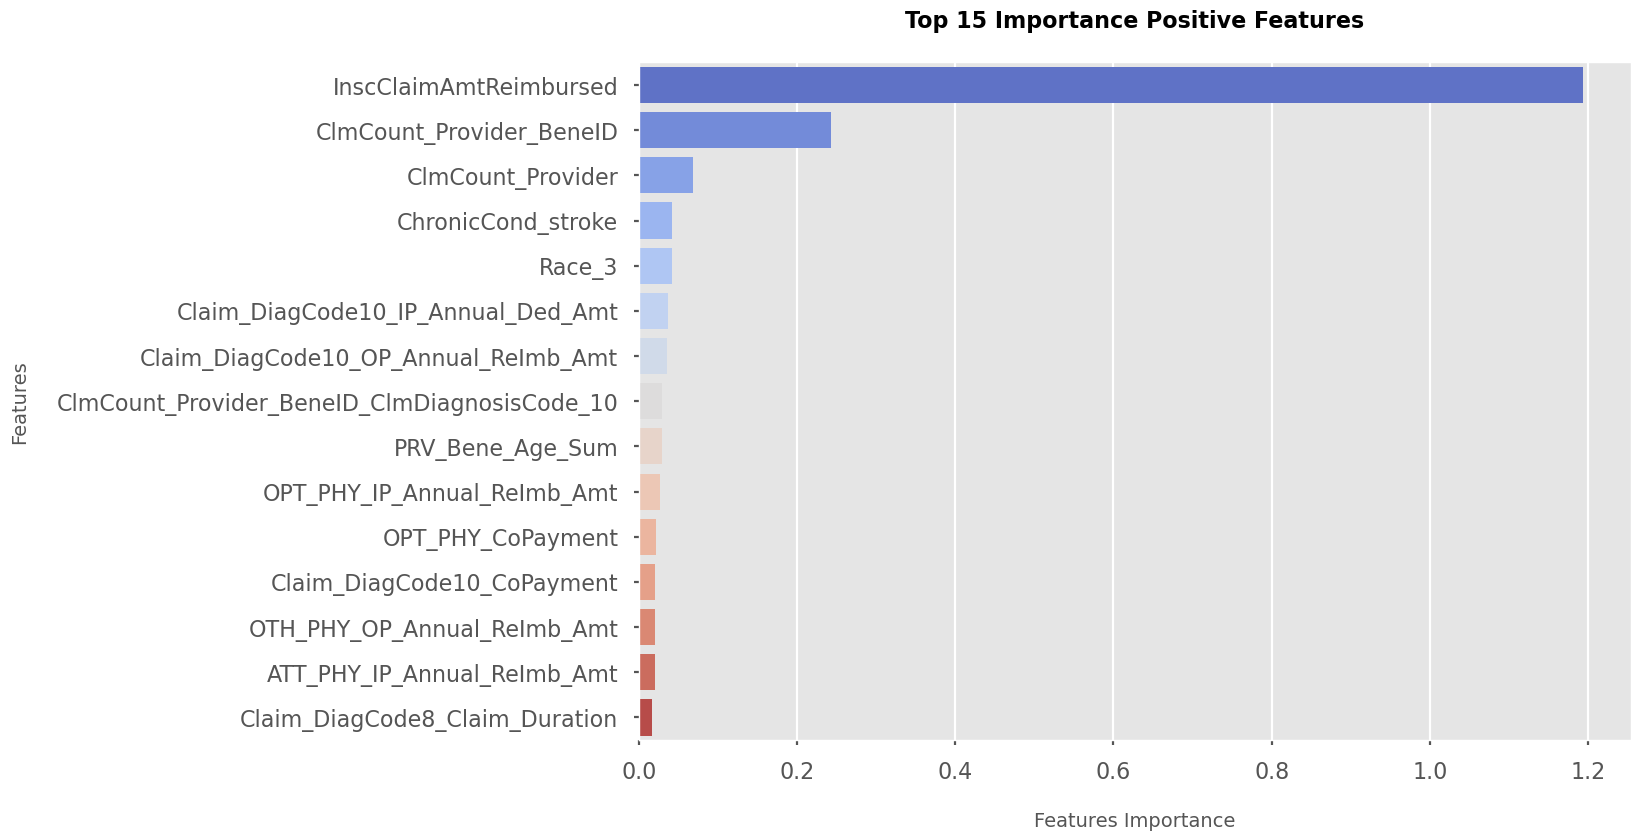

In [540]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_15_pos_feats, x=top_15_pos_feats_scores, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance", fontdict=label_font_dict)
    plt.ylabel("Features\n", fontdict=label_font_dict)
    plt.title("Top 15 Importance Positive Features\n", fontdict=title_font_dict)

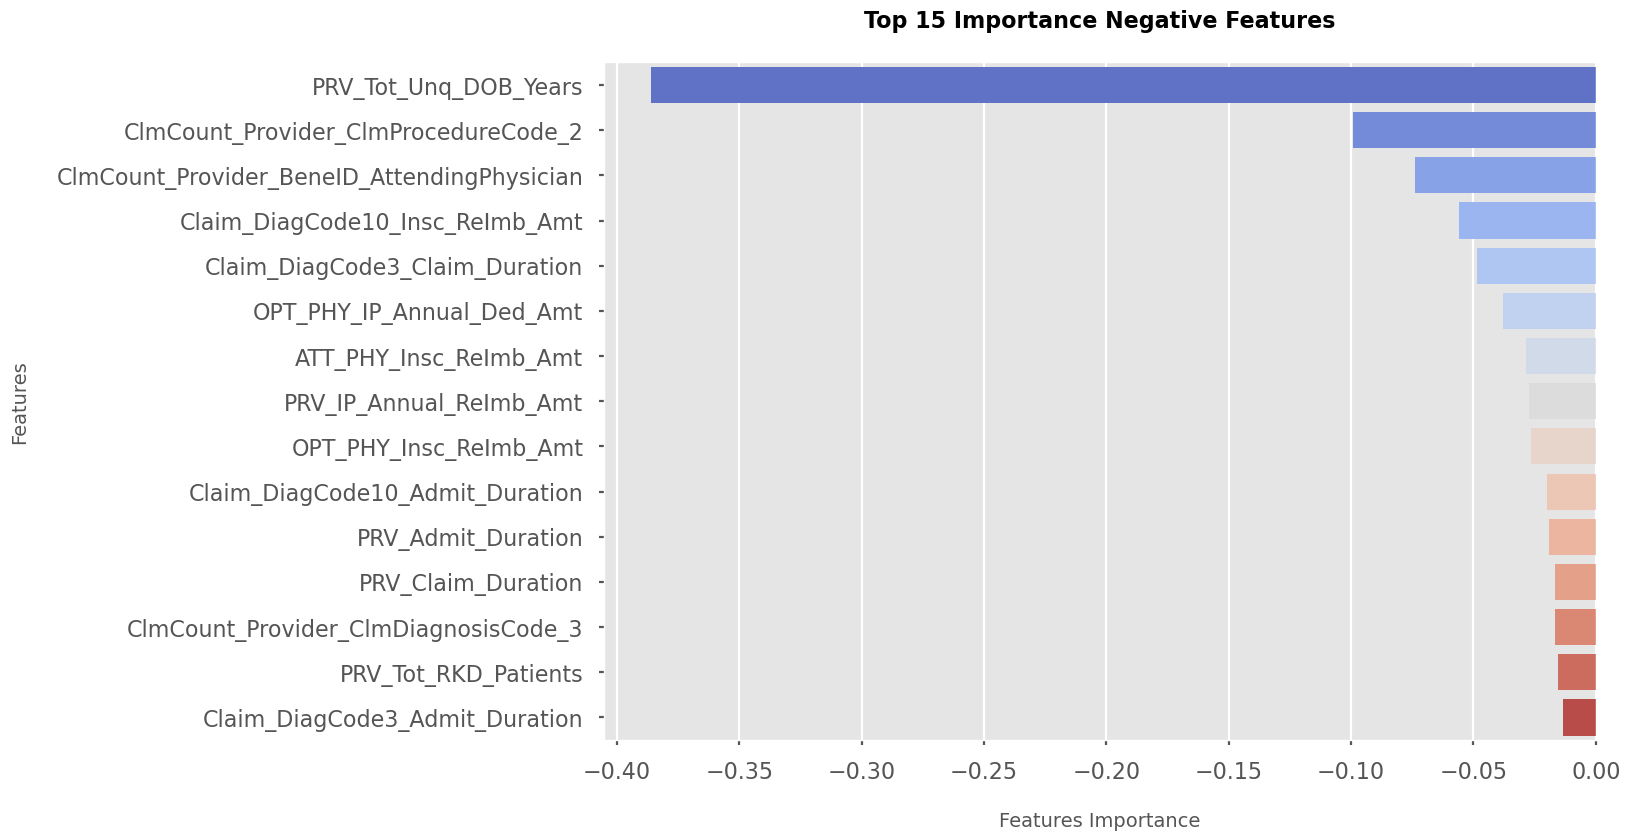

In [541]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_15_neg_feats, x=top_15_neg_feats_scores, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance", fontdict=label_font_dict)
    plt.ylabel("Features\n", fontdict=label_font_dict)
    plt.title("Top 15 Importance Negative Features\n", fontdict=title_font_dict)

## decision tree 

In [542]:
# Training the model with all features and hyper-parameterized values
dec_tree_5 = DecisionTreeClassifier(criterion='gini',
                                   max_depth= 6,
                                   max_features='log2',
                                   min_samples_leaf=150,
                                   min_samples_split=150,
                                   random_state=49,
                                   splitter='best',
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   ccp_alpha=0.0,)

dec_tree_5.fit(X_train_ovsamp, y_train_ovsamp)

DecisionTreeClassifier(max_depth=6, max_features='log2', min_samples_leaf=150,
                       min_samples_split=150, random_state=49)

### Train AUC = 0.925908140825404
### Test AUC = 0.9426661186111932


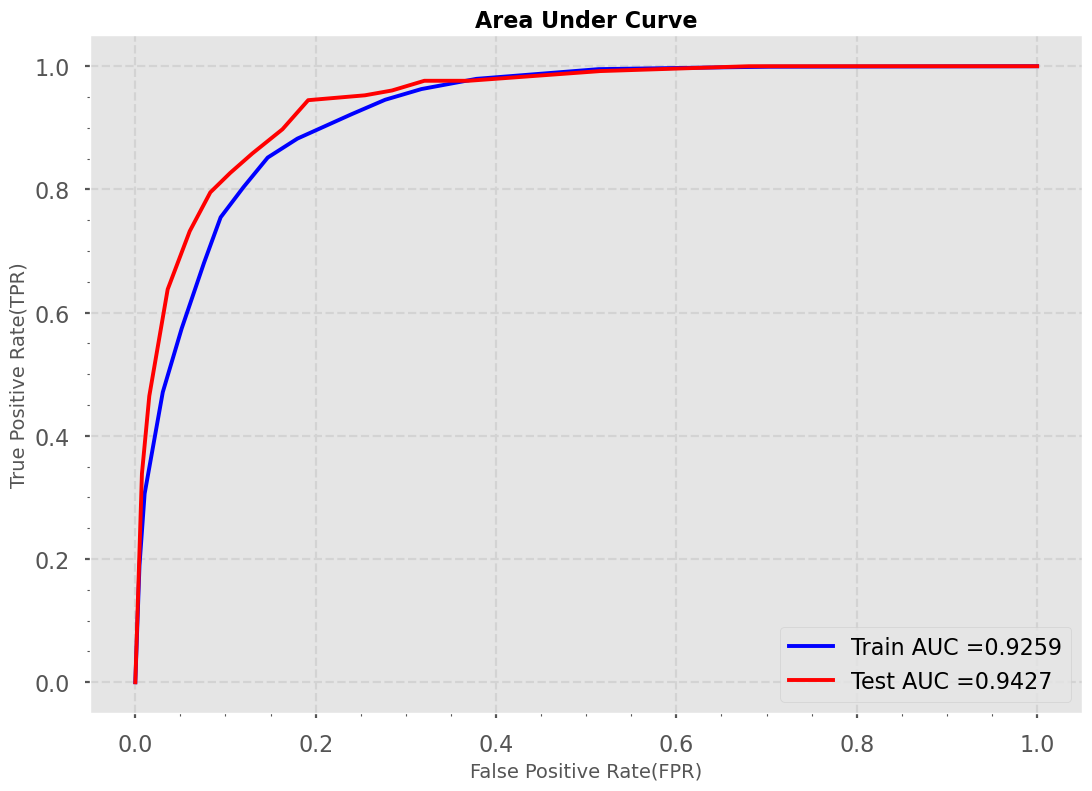

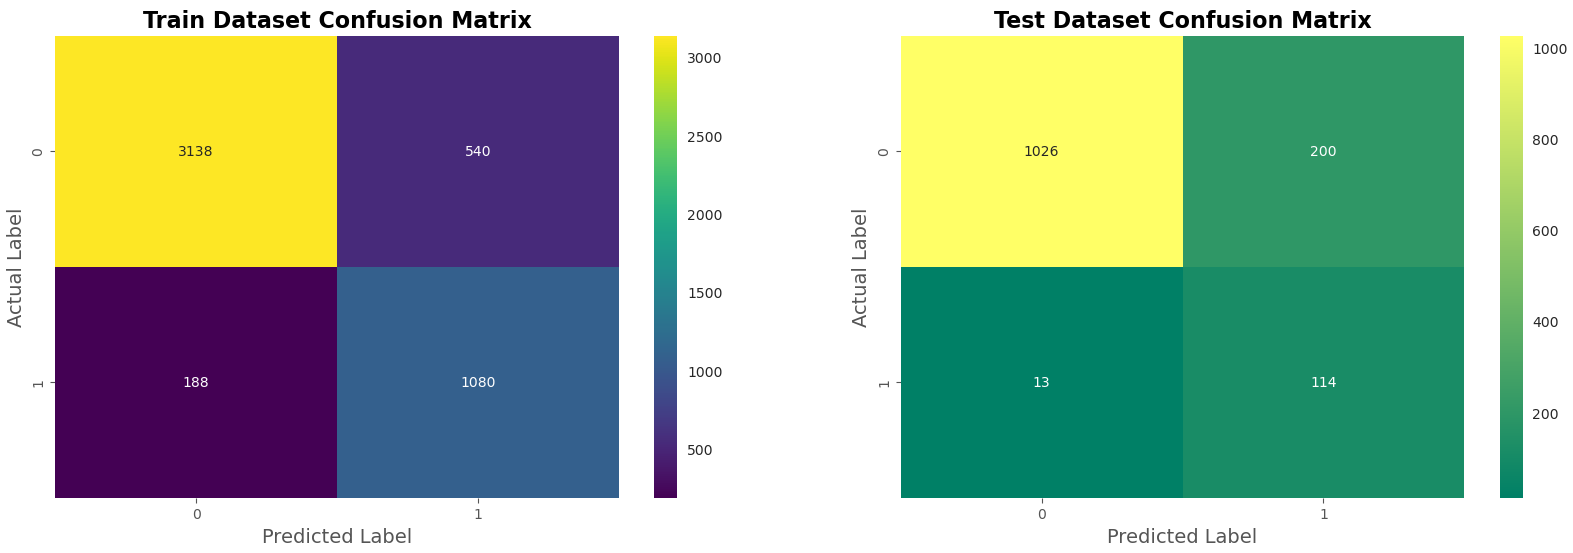



### Best Threshold = 0.3812
### Model AUC is : 0.9427
### Model Train F1 Score is : 0.7479
### Model Test F1 Score is : 0.5170


In [544]:
 #Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(dec_tree_5, X_train_ovsamp, X_test_std, y_train_ovsamp, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

### Train AUC = 0.925908140825404
### Test AUC = 0.9467910093761669


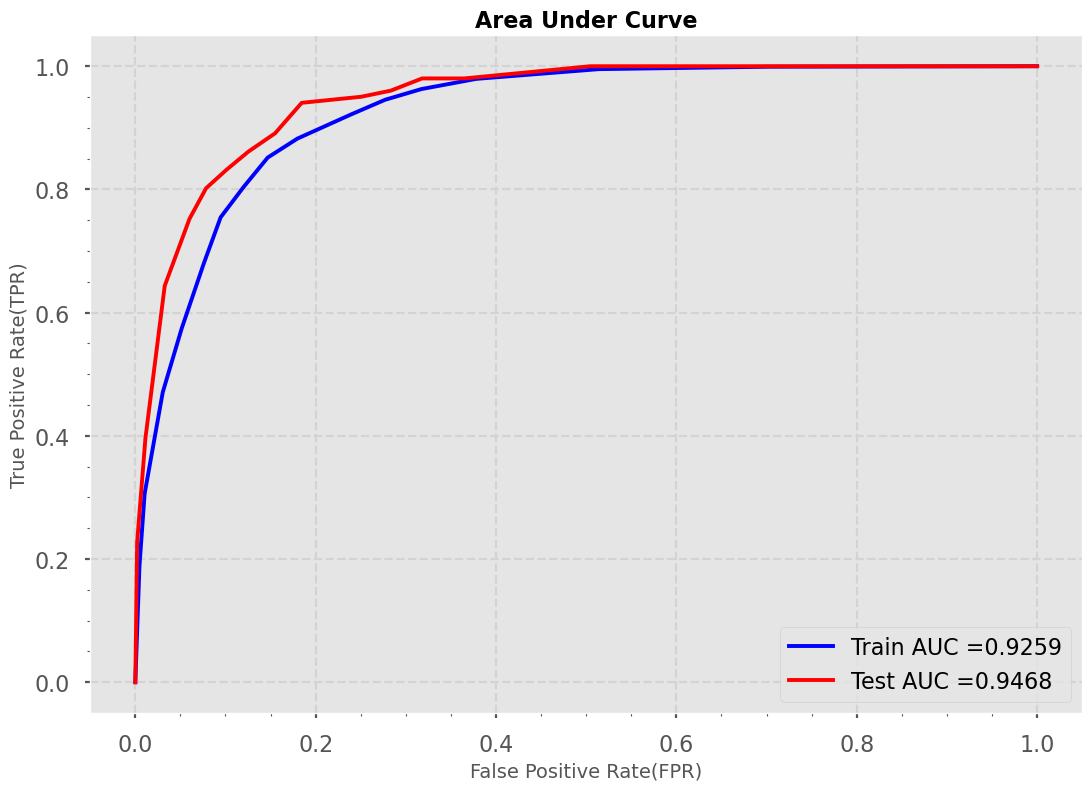

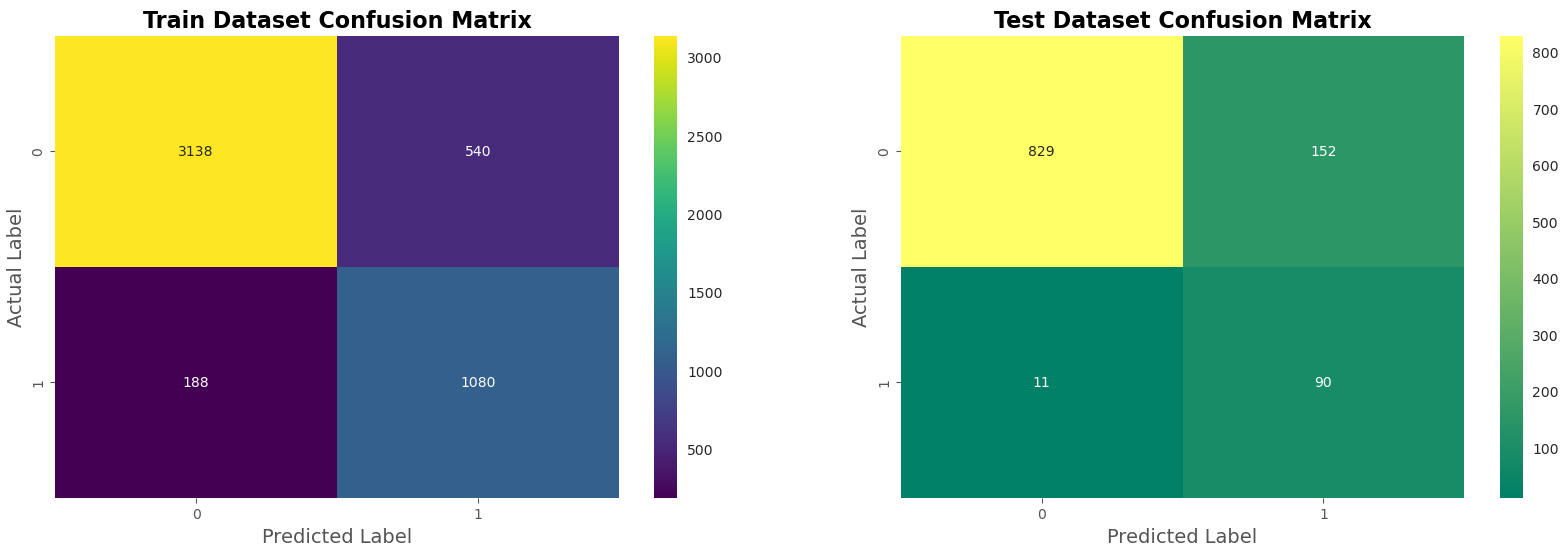



### Best Threshold = 0.3812
### Model AUC is : 0.9468
### Model Train F1 Score is : 0.7479
### Model Test F1 Score is : 0.5248
### Model Train Recall is : 0.8517
### Model Test Recall is : 0.8911
### Model Train Precision is : 0.6667
### Model Test Precision is : 0.3719
### Model Train Loss is : 0.2943
### Model Test Loss is : 0.2140


In [661]:
test_auc, train_f1_score, test_f1_score,train_recall,test_recall, train_precision,test_precision,train_loss, test_loss,best_t = validate_model_1(dec_tree_5, X_train_ovsamp, X_test_std, y_train_ovsamp, y_test)


print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))
print("### Model Train Recall is : {:.4f}".format(train_recall))
print("### Model Test Recall is : {:.4f}".format(test_recall))
print("### Model Train Precision is : {:.4f}".format(train_precision))
print("### Model Test Precision is : {:.4f}".format(test_precision))
print("### Model Train Loss is : {:.4f}".format(train_loss))
print("### Model Test Loss is : {:.4f}".format(test_loss))




In [545]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': dec_tree_5.feature_importances_})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

Features  Importance_Model_1
0                          DeductibleAmtPaid            0.044641
1                     OPT_PHY_Admit_Duration            0.017033
2                OTH_PHY_OP_Annual_ReImb_Amt            0.000548
3  Claim_Admit_Diag_Code_IP_Annual_ReImb_Amt            0.619995
4          Claim_DiagCode3_OP_Annual_Ded_Amt            0.000009

In [546]:
top_15_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:15]
top_15_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:15]

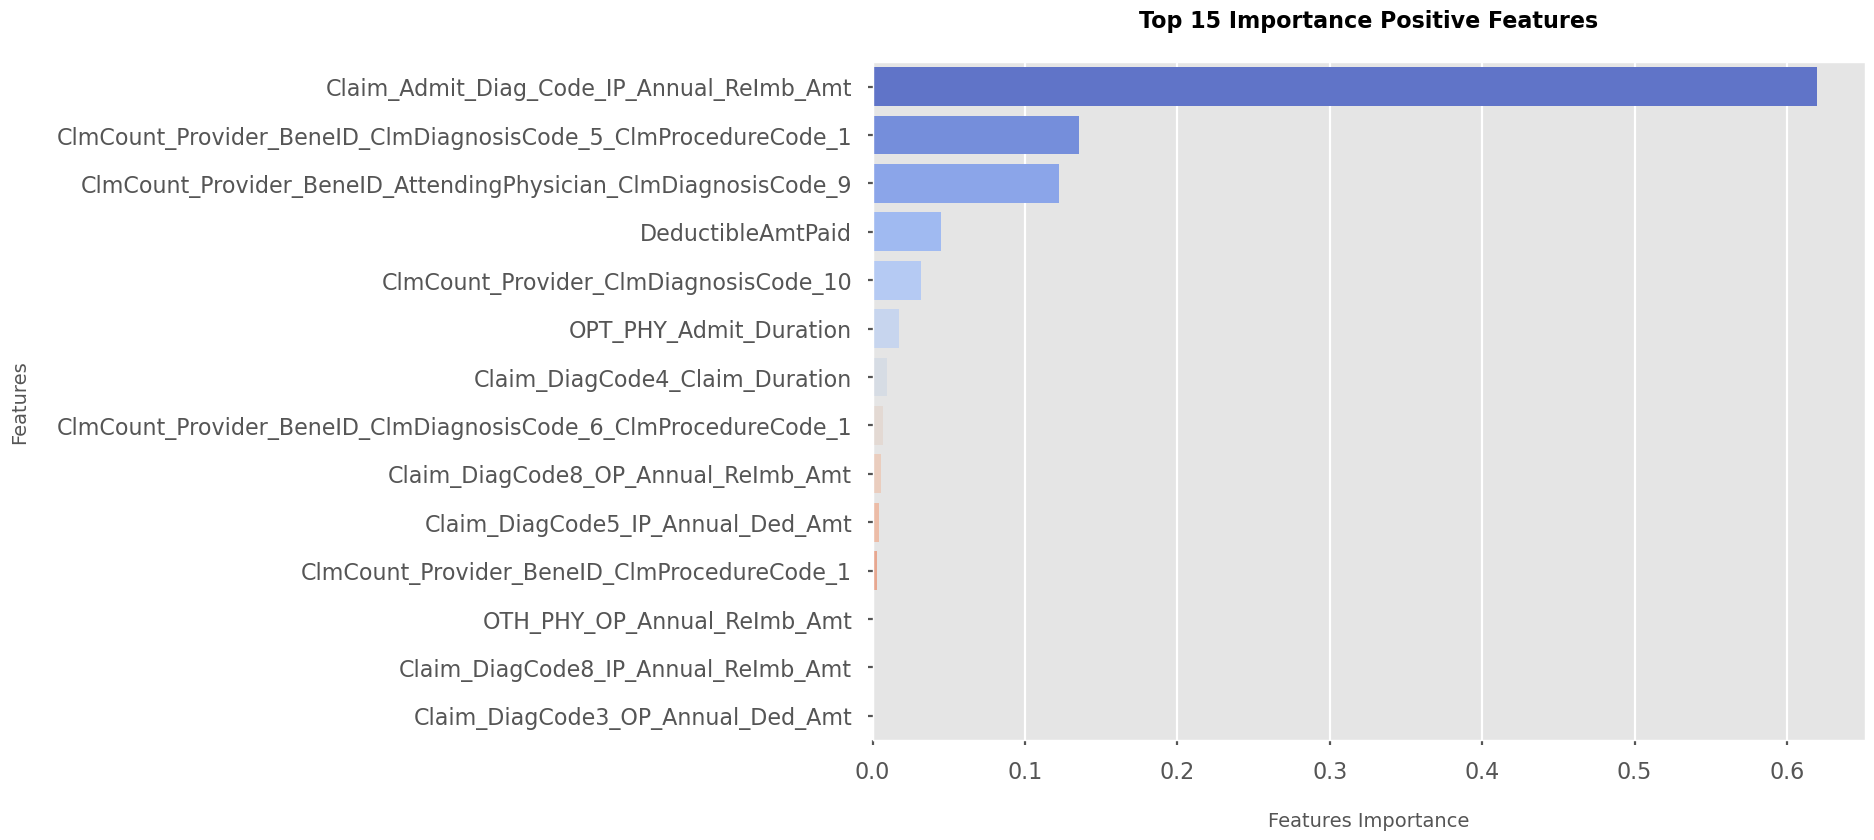

In [547]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_15_pos_feats, x=top_15_pos_feats_scores, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance", fontdict=label_font_dict)
    plt.ylabel("Features\n", fontdict=label_font_dict)
    plt.title("Top 15 Importance Positive Features\n", fontdict=title_font_dict)

## Random forest 

In [548]:
# Training the model with all features and hyper-parameterized values
rfc_6 = RandomForestClassifier(n_estimators=30,criterion='gini',
                                   max_depth= 4,
                                   max_features='auto',
                                   min_samples_leaf=50,
                                   min_samples_split=50,
                                   random_state=49,
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   ccp_alpha=0.0,)

rfc_6.fit(X_train_std, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=50, min_samples_split=50,
                       n_estimators=30, random_state=49)

### Train AUC = 0.9241820450011408
### Test AUC = 0.945771409487354


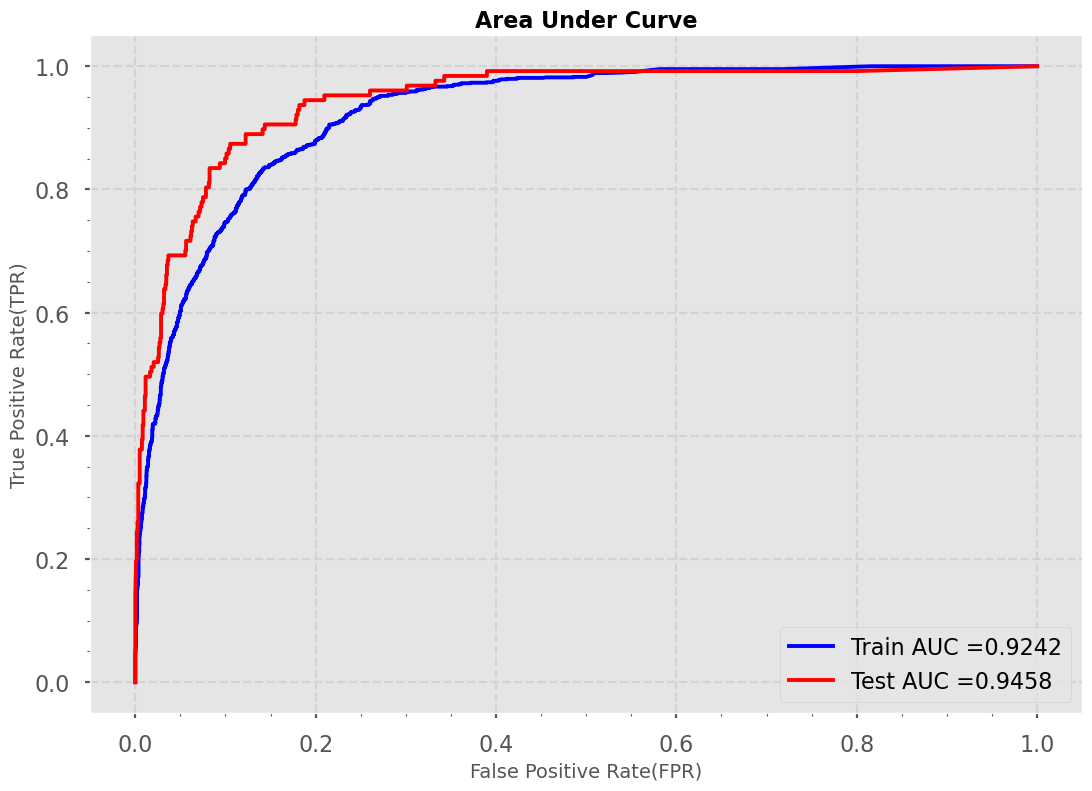

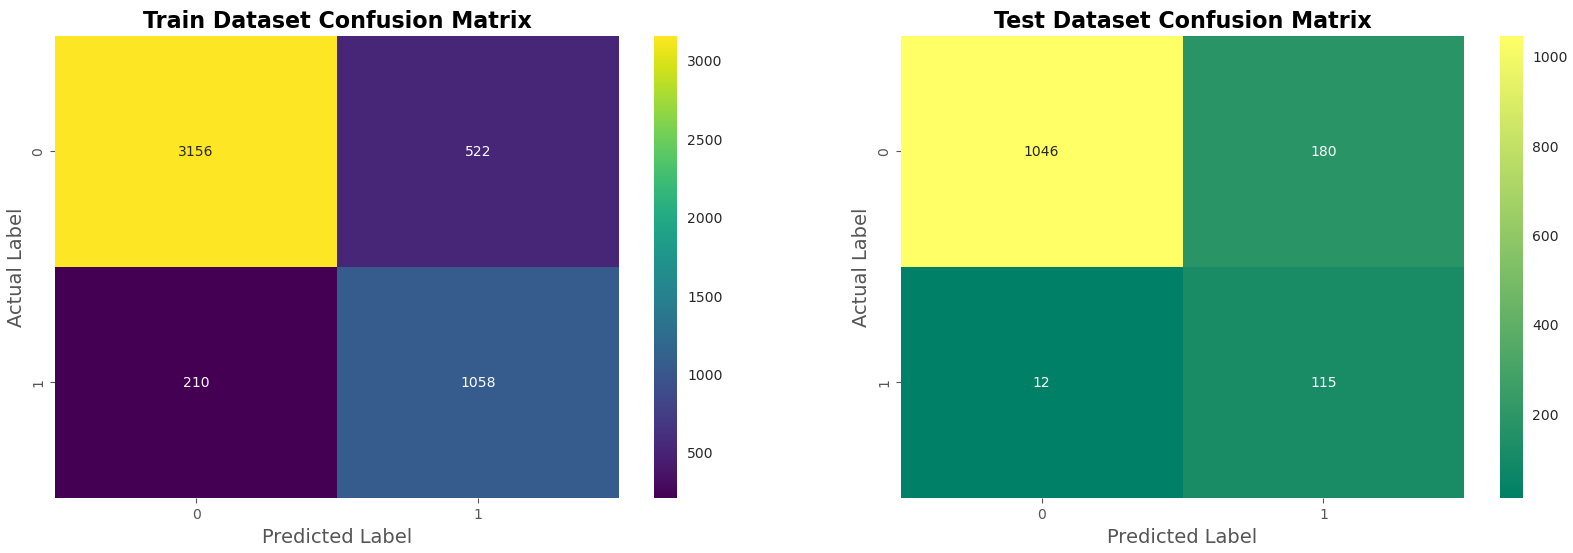



### Best Threshold = 0.1185
### Model AUC is : 0.9458
### Model Train F1 Score is : 0.7430
### Model Test F1 Score is : 0.5450


In [549]:
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(rfc_6, X_train_ovsamp, X_test_std, y_train_ovsamp, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

### Train AUC = 0.9241820450011408
### Test AUC = 0.951625437773135


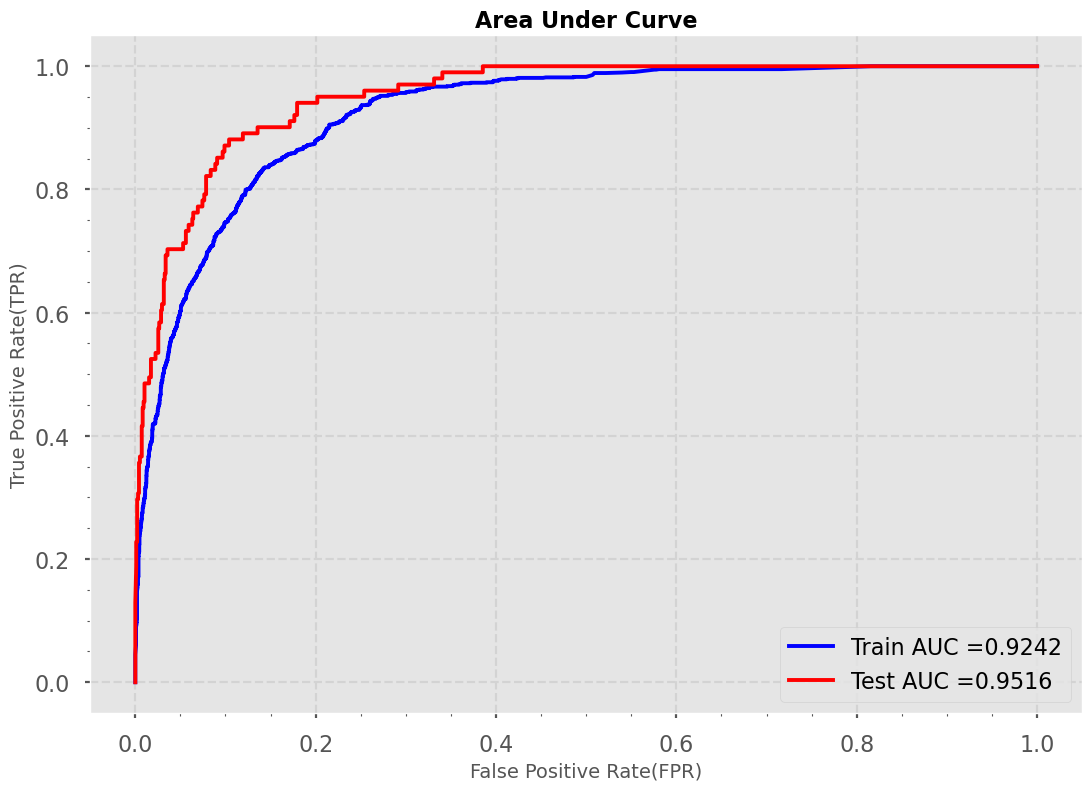

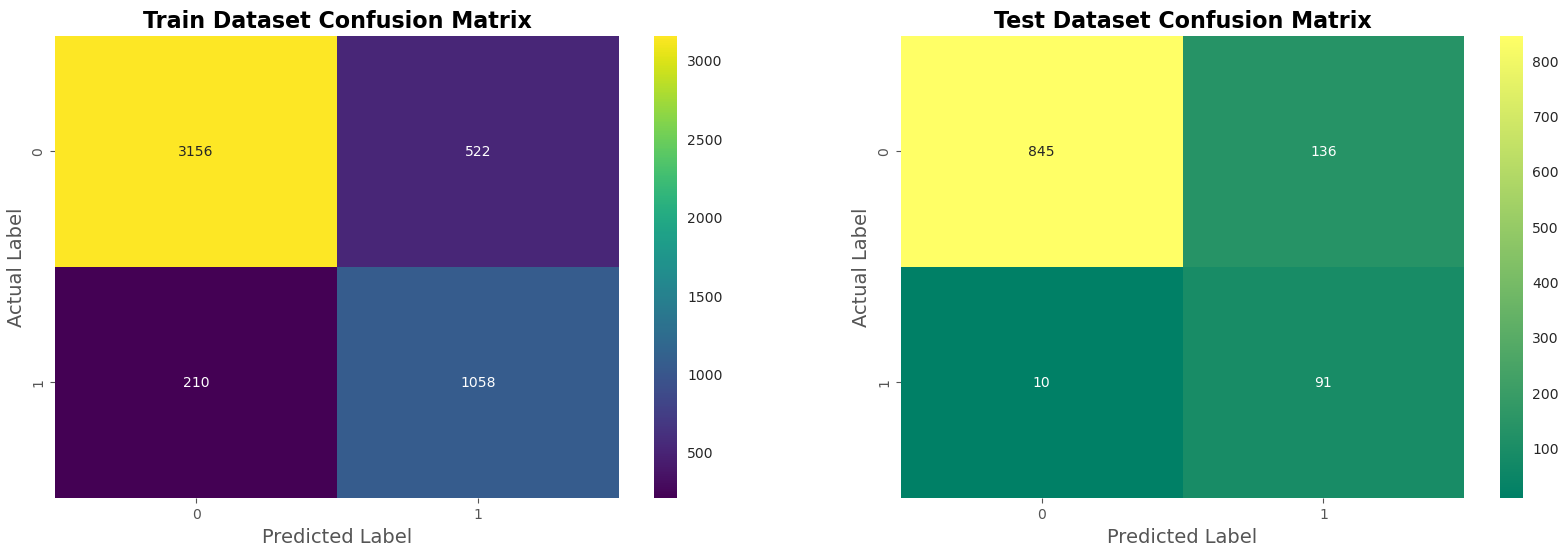



### Best Threshold = 0.1185
### Model AUC is : 0.9516
### Model Train F1 Score is : 0.7430
### Model Test F1 Score is : 0.5549
### Model Train Recall is : 0.8344
### Model Test Recall is : 0.9010
### Model Train Precision is : 0.6696
### Model Test Precision is : 0.4009
### Model Train Loss is : 0.3768
### Model Test Loss is : 0.1502


In [660]:
test_auc, train_f1_score, test_f1_score,train_recall,test_recall, train_precision,test_precision,train_loss, test_loss,best_t = validate_model_1(rfc_6, X_train_ovsamp, X_test_std, y_train_ovsamp, y_test)


print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))
print("### Model Train Recall is : {:.4f}".format(train_recall))
print("### Model Test Recall is : {:.4f}".format(test_recall))
print("### Model Train Precision is : {:.4f}".format(train_precision))
print("### Model Test Precision is : {:.4f}".format(test_precision))
print("### Model Train Loss is : {:.4f}".format(train_loss))
print("### Model Test Loss is : {:.4f}".format(test_loss))




In [551]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': rfc_6.feature_importances_})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()


Features  Importance_Model_1
0  InscClaimAmtReimbursed            0.042432
1       DeductibleAmtPaid            0.005976
2   ChronicCond_Alzheimer            0.000079
3  ChronicCond_Depression            0.000017
4    ChronicCond_Diabetes            0.000200

In [552]:
top_20_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:20]
top_20_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:20]

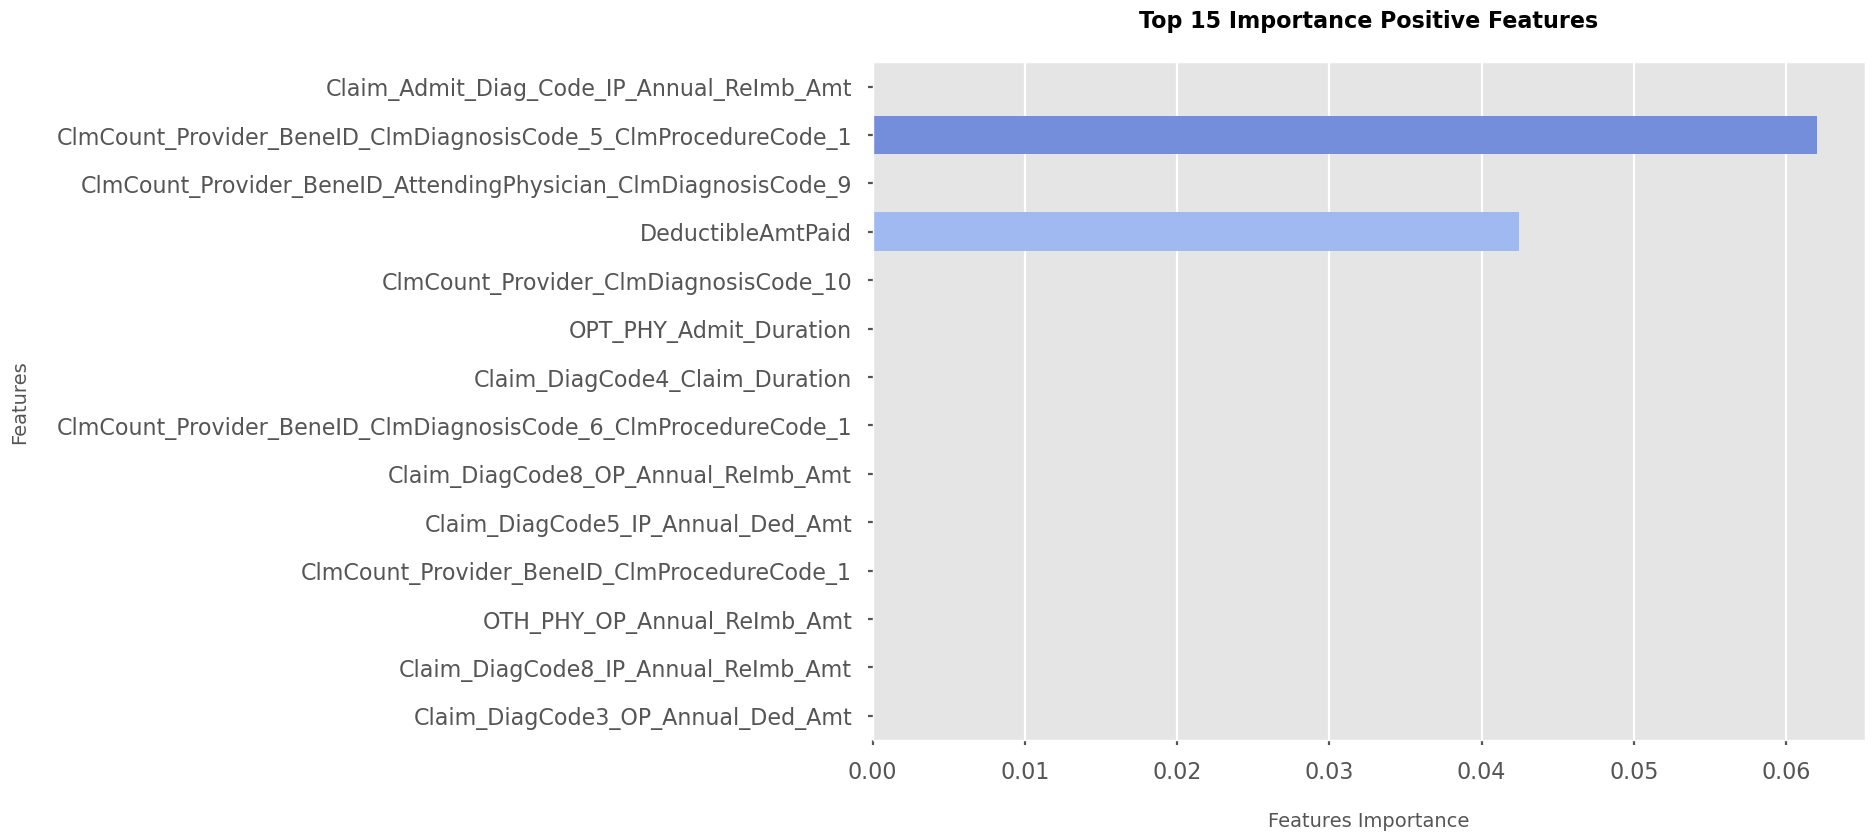

In [553]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_15_pos_feats, x=top_20_pos_feats_scores, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance", fontdict=label_font_dict)
    plt.ylabel("Features\n", fontdict=label_font_dict)
    plt.title("Top 15 Importance Positive Features\n", fontdict=title_font_dict)

Models - SET 1 - OBSERVATIONS

Adding Aggregated features at below mentioned levels certainly helped in achieving the good performance scores.



-Provider
-Beneficiary
-Attending Physician
-Operating Physician
-Other Physician and etc..




